<a href="https://colab.research.google.com/github/bongseokkim/Study/blob/master/Wafer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pwd

/content


In [4]:
% cd '/content/gdrive/MyDrive/Wafer/LSWMD'

/content/gdrive/MyDrive/Wafer/LSWMD


In [5]:
! pwd

/content/gdrive/MyDrive/Wafer/LSWMD


In [6]:
import os
print(os.listdir())
import warnings
warnings.filterwarnings("ignore")

['LSWMD.pkl']


## Data Summary

+ The dataset comprises 811,457 wafer maps, along with additional information such as wafer die size, lot name and wafer index.

+ The training / test set were already split by domain experts, but in this kernel we ignore this info and we re-divided the dataset into training set and test set by hold-out mehtod which will be introduced in later section.

wafer die size :집적 회로에서 다이(Die)는 반도체 물질의 자그마한 사각형 조각을 말하며, 여기에 회로가 제작되어 있다. 일반적으로 하나의 웨이퍼에 여러 개의 집적 회로가 생산된다. 

lot : 웨이퍼의 한 묶음


The  dataset were collected from 47,543 lots in real-world fab. However, 47,543 lots x 25 wafer/lot =1,157,325 wafer maps is larger than 811,457 wafer maps.



In [105]:
df = pd.read_pickle("LSWMD.pkl")

df.info()

KeyboardInterrupt: ignored

In [9]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [10]:
print(df.iloc[0,:]['waferMap'])
print(df.iloc[0,:]['waferMap'].shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(45, 48)


In [11]:
print(df.iloc[0,:]['waferMap'][4]) # 0~3 

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 0 0 0 0 0 0 0 0 0 0]


wafer X 25 = 한묶음 

거의 모든 게 고르게 분포 

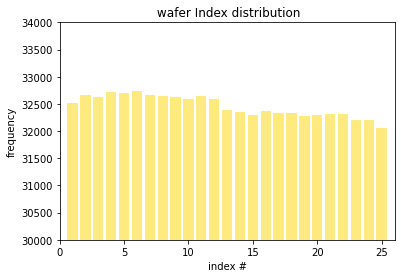

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline


uni_Index=np.unique(df.waferIndex, return_counts=True)
plt.bar(uni_Index[0],uni_Index[1], color='gold', align='center', alpha=0.5)
plt.title(" wafer Index distribution")
plt.xlabel("index #")
plt.ylabel("frequency")
plt.xlim(0,26)
plt.ylim(30000,34000)
plt.show()

In [13]:
# 그러나 필요 없음 
df = df.drop(['waferIndex'], axis = 1)

In [14]:
df.head()

,waferMap,dieSize,lotName,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]]


We can not get much information from the wafer map column but we can see the die size for each instance is different 

In [15]:
def find_dim(x):
    dim0 = np.size(x,axis=0)
    dim1 = np.size(x,axis=1)
    return dim0,dim1

df['waferMapDim']=df.waferMap.apply(find_dim)
df.sample(5)

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
547818,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1513.0,lot34300,[],[],"(49, 39)"
278917,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1334.0,lot17124,[],[],"(41, 42)"
31569,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",776.0,lot3102,[],[],"(30, 34)"
387461,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1334.0,lot23198,[],[],"(41, 42)"
326201,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1724.0,lot19698,[],[],"(50, 43)"


In [16]:
print(max(df.waferMapDim))

print(min(df.waferMapDim))


(300, 202)
(6, 21)


In [17]:
uni_waferDim = np.unique(df.waferMapDim, return_counts=True)
uni_waferDim[0].shape[0] # 632 unique size

632

Do missing value check is an important part during data preparing process. Since we only interested in wafer with patterns, we may remove those data without failure type labels.

In [18]:
df['failureType'].values

array([array([['none']], dtype='<U4'), array([['none']], dtype='<U4'),
       array([['none']], dtype='<U4'), ...,
       array([['Edge-Ring']], dtype='<U9'),
       array([], shape=(0, 0), dtype=float64),
       array([], shape=(0, 0), dtype=float64)], dtype=object)

In [19]:
df['trianTestLabel'].values

array([array([['Training']], dtype='<U8'),
       array([['Training']], dtype='<U8'),
       array([['Training']], dtype='<U8'), ...,
       array([['Test']], dtype='<U4'),
       array([], shape=(0, 0), dtype=float64),
       array([], shape=(0, 0), dtype=float64)], dtype=object)

In [20]:
df['failureNum']=df.failureType

df['trainTestNum']=df.trianTestLabel

mapping_type={'Center':0,'Donut':1,'Edge-Loc':2,'Edge-Ring':3,'Loc':4,'Random':5,'Scratch':6,'Near-full':7,'none':8}

mapping_traintest={'Training':0,'Test':1}

df=df.replace({'failureNum':mapping_type, 'trainTestNum':mapping_traintest})

df.head()

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,failureNum,trainTestNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)",8,0
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)",8,0
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)",8,0
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)",8,0
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)",8,0


In [21]:
tol_wafers = df.shape[0]

df_withlabel = df[(df['failureNum']>=0) & (df['failureNum']<=8)] #failure mapping 된것만 
df_withlabel =df_withlabel.reset_index()

df_withpattern = df[(df['failureNum']>=0) & (df['failureNum']<=7)] # none :8 뺴고, 패턴이 있는것만
df_withpattern = df_withpattern.reset_index()

df_nonpattern = df[(df['failureNum']==8)] # 패턴이 없는것 


print(f'len total df {tol_wafers} ')

print(f'len with label Exist  {df_withlabel.shape[0]}')

print(f'len pattern Exist {df_withpattern.shape[0]}')

print(f'len pattern doesn`t Exist {df_nonpattern.shape[0]}')

len total df 811457 
len with label Exist  172950
len pattern Exist 25519
len pattern doesn`t Exist 147431


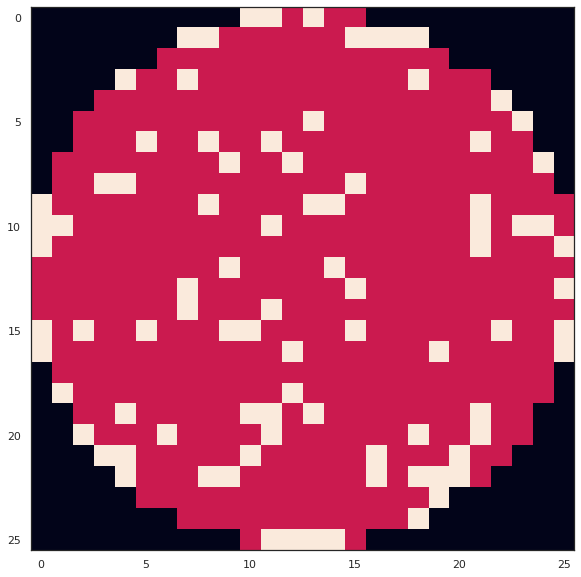

In [104]:
plt.imshow(df_nonpattern['waferMap'][1000])

+ in summary, 172,950 wafers have labels while 78.7% wafers with no label based on failureType variable filtering.

+ Among labeled wafer, only 3.1% wafers (25,519 wafers) have real failure patterns while 147,431 wafers were still labeled none. As a result, we only focus on thoes 25,519 instances which heavily reduce the calculated amount for our work.

+ From the second picture shown above, the dataset shows high imbalance distribution.

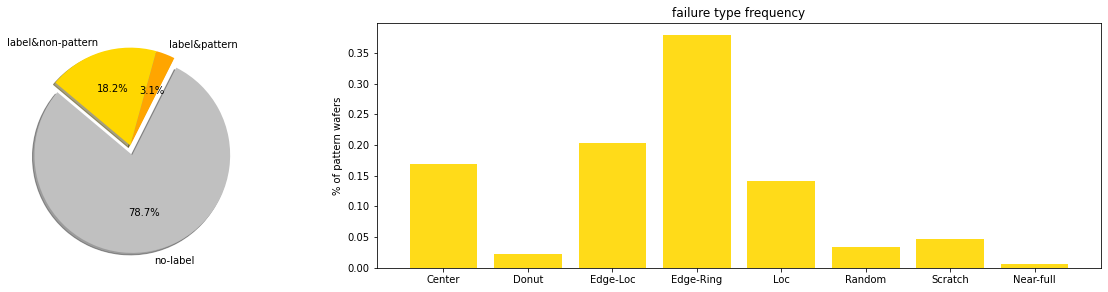

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec

fig = plt.figure(figsize=(20, 4.5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

no_wafers= [tol_wafers-df_withlabel.shape[0], df_withpattern.shape[0], df_nonpattern.shape[0]]

colors = ['silver', 'orange', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(no_wafers, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

uni_pattern=np.unique(df_withpattern.failureNum, return_counts=True)
labels2 = ['','Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']
ax2.bar(uni_pattern[0],uni_pattern[1]/df_withpattern.shape[0], color='gold', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(labels2)

plt.show()

The best way to observe the raw data is to do data visualization.

We show the first 100 samples with pattern labeled from our datasets.

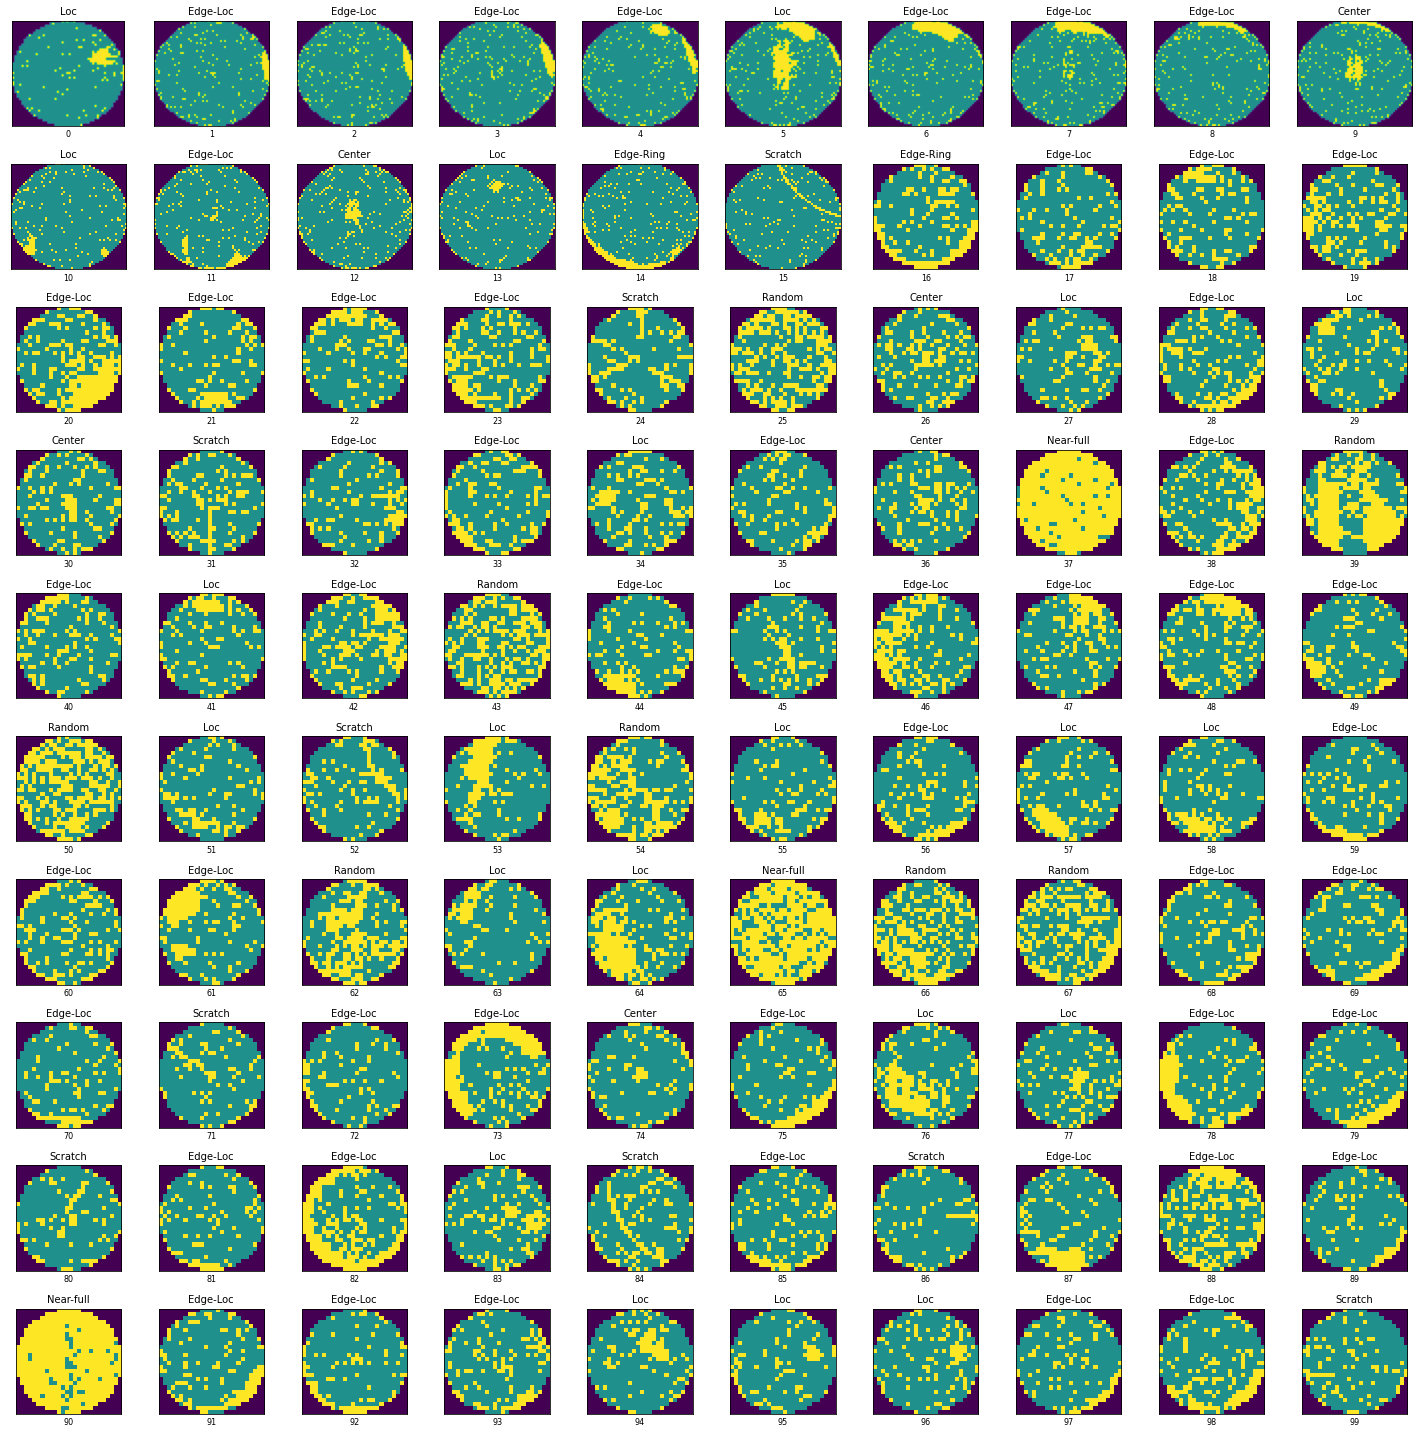

In [23]:
fig, ax = plt.subplots(nrows = 10, ncols = 10, figsize=(20, 20))
ax = ax.ravel(order='C')

for i in range(100):
    img = df_withpattern.waferMap[i]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[i][0][0], fontsize=10)
    ax[i].set_xlabel(df_withpattern.index[i], fontsize=8)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

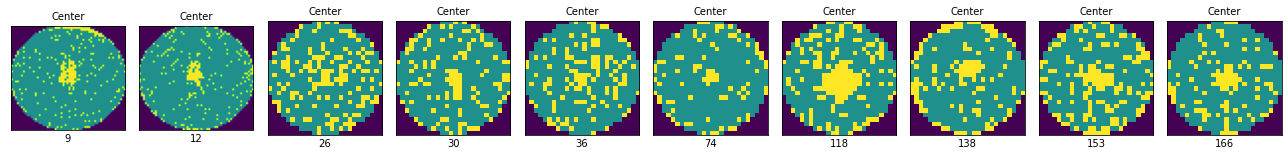

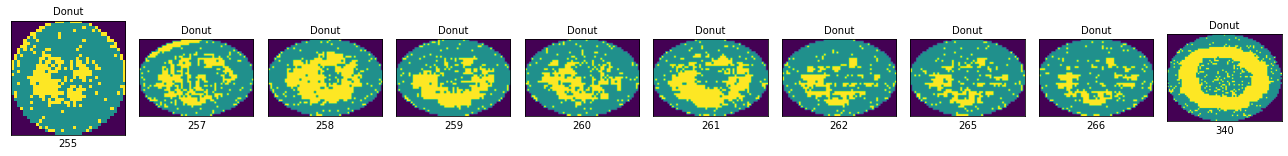

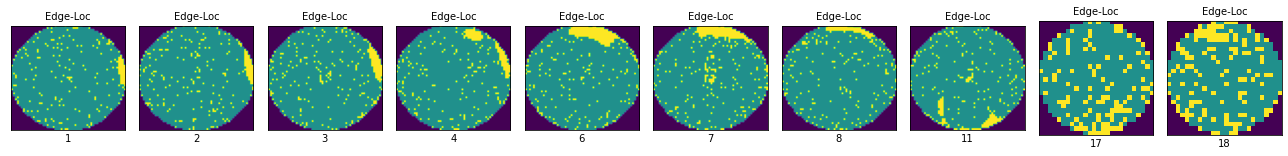

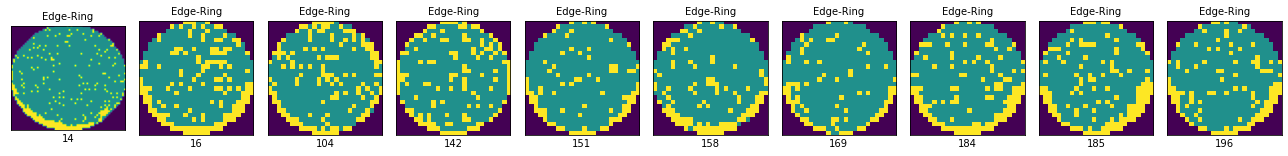

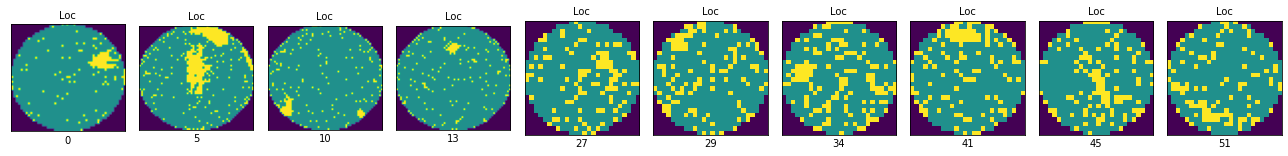

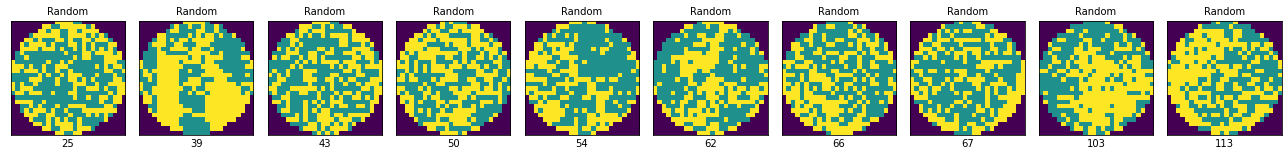

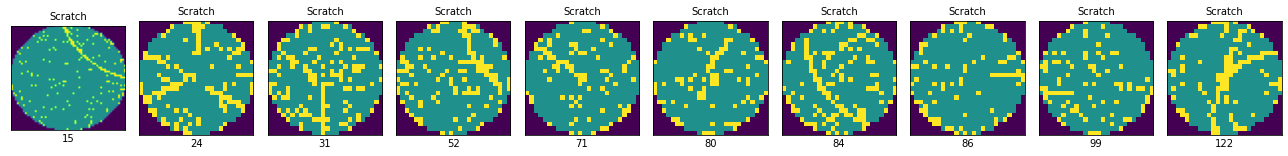

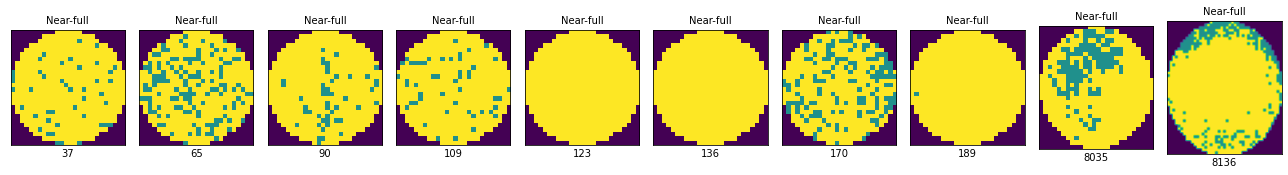

In [24]:
x = [0,1,2,3,4,5,6,7]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

for k in x:
    fig, ax = plt.subplots(nrows = 1, ncols = 10, figsize=(18, 12))
    ax = ax.ravel(order='C')
    for j in [k]:
        img = df_withpattern.waferMap[df_withpattern.failureType==labels2[j]]
        for i in range(10):
            ax[i].imshow(img[img.index[i]])
            ax[i].set_title(df_withpattern.failureType[img.index[i]][0][0], fontsize=10)
            ax[i].set_xlabel(df_withpattern.index[img.index[i]], fontsize=10)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
    plt.tight_layout()
    plt.show() 

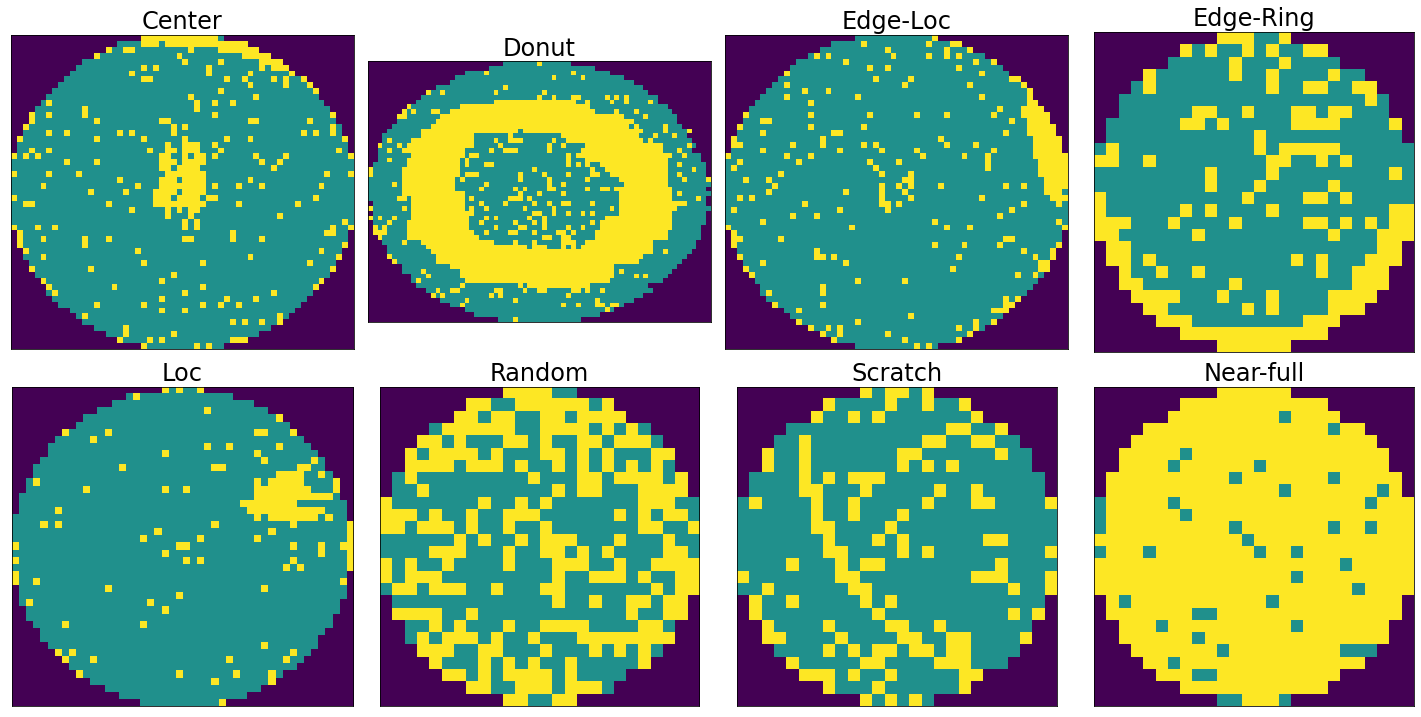

In [25]:
x = [9,340, 3, 16, 0, 25, 84, 37]
labels2 = ['Center','Donut','Edge-Loc','Edge-Ring','Loc','Random','Scratch','Near-full']

#ind_def = {'Center': 9, 'Donut': 340, 'Edge-Loc': 3, 'Edge-Ring': 16, 'Loc': 0, 'Random': 25,  'Scratch': 84, 'Near-full': 37}
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize=(20, 10))
ax = ax.ravel(order='C')
for i in range(8):
    img = df_withpattern.waferMap[x[i]]
    ax[i].imshow(img)
    ax[i].set_title(df_withpattern.failureType[x[i]][0][0],fontsize=24)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show() 

## GAN
https://machinelearningmastery.com/how-to-develop-a-generative-adversarial-network-for-an-mnist-handwritten-digits-from-scratch-in-keras/

How to Define and Train the Discriminator Model

Inputs: Image with one channel and 28×28 pixels in size.

Outputs: Binary classification, likelihood the sample is real (or fake).

In [26]:
import pandas as pd

In [27]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
% cd '/content/gdrive/MyDrive/Wafer/LSWMD'

/content/gdrive/MyDrive/Wafer/LSWMD


In [29]:
df = pd.read_pickle("LSWMD.pkl")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [30]:
df

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]
...,...,...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]


In [31]:
import gc 
import numpy as np

# change img data to list
img_data = df["waferMap"].values
df.drop("waferMap", axis=1, inplace=True)

# change data type
df["dieSize"] = df["dieSize"].astype("uint16")
df["waferIndex"] = df["waferIndex"].astype("uint8")

# dieSize
diesize = np.array(df["dieSize"].values)
df.drop("dieSize", axis=1, inplace=True)

# WaferIndex
waferindex = np.array(df["waferIndex"].values)
df.drop("waferIndex", axis=1, inplace=True)

# lotName
lotname = np.array(df["lotName"].values)
df.drop("lotName", axis=1, inplace=True)

# trainTestLabel
ttlabel = np.array(df["trianTestLabel"].values)
df.drop("trianTestLabel", axis=1, inplace=True)

# failureType
failuretype = np.array(df["failureType"].values)
df.drop("failureType", axis=1, inplace=True)

In [32]:
# trainTestLabel
ttlabel = ttlabel.astype("object")
ttlabel = [ str(obj).replace("[[", "").replace("]]", "") for obj in ttlabel ]
ttlabel = np.array(ttlabel)

# failureType
failuretype = failuretype.astype("object")
failuretype = [ str(obj).replace("[[", "").replace("]]", "") for obj in failuretype ]
failuretype = np.array(failuretype)

In [33]:
import gc

del df
gc.collect()

378

In [34]:
# train and test data

# image data
train_img = img_data[ttlabel=="'Training'"]
#test_img = img_data[ttlabel=="'Test'"]

# mode
train_mode = failuretype[ttlabel=="'Training'"]
#test_mode = failuretype[ttlabel=="'Test'"]

# diesize
train_die = diesize[ttlabel=="'Training'"]
#test_die = diesize[ttlabel=="'Test'"]

In [35]:
train_img[0].shape

(45, 48)

In [36]:
train_mode

array(["'none'", "'none'", "'none'", ..., "'none'", "'none'", "'none'"],
      dtype='<U11')

In [37]:
faulty_case = np.unique(train_mode)
print('Faulty case list : {}'.format(faulty_case))

Faulty case list : ["'Center'" "'Donut'" "'Edge-Loc'" "'Edge-Ring'" "'Loc'" "'Near-full'"
 "'Random'" "'Scratch'" "'none'"]


In [38]:
from tensorflow.keras.utils import to_categorical

In [39]:

for i, l in enumerate(faulty_case):
  train_mode[train_mode==l] = i

In [40]:
train_mode = to_categorical(train_mode)

In [42]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
train_img.shape

(54355,)

In [51]:
train_img = train_img.reshape(-1,28,28,1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_img, train_mode,
                                                    test_size=0.33,
                                                    random_state=2019)


In [43]:
from tensorflow.keras import layers, models, Input

input_shape = (28, 28, 1)
input_tensor = Input(input_shape)
encode = layers.Conv2D(64, (3,3), padding='same', activation='relu')(input_tensor)
pool1 = layers.MaxPool2D()(encode)
encode1 = layers.Conv2D(32, (3,3), padding='same', activation='relu')(pool1)

latent_vector = layers.MaxPool2D()(encode1)

decode_layer_1 = layers.Conv2DTranspose(32, (3,3), padding='same', activation='relu')
decode_layer_2 = layers.UpSampling2D()
decode_layer_3 = layers.Conv2DTranspose(64, (3,3), padding='same', activation='relu')
decode_layer_4 = layers.UpSampling2D()
output_tensor = layers.Conv2DTranspose(1, (3,3), padding='same', activation='sigmoid')

decode = decode_layer_1(latent_vector)
decode = decode_layer_2(decode)
decode = decode_layer_3(decode)
decode = decode_layer_4(decode)

ae = models.Model(input_tensor, output_tensor(decode))
ae.compile(optimizer = 'Adam',
           loss = 'mse',)

In [44]:
ae.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0     

In [52]:
ae.fit(x_train, x_train,
       epochs=10,
       batch_size=1000)

Epoch 1/10
37/37 [==============================] - 32s 61ms/step - loss: 0.0827
Epoch 2/10
37/37 [==============================] - 2s 51ms/step - loss: 0.0653
Epoch 3/10
37/37 [==============================] - 2s 51ms/step - loss: 0.0653
Epoch 4/10
37/37 [==============================] - 2s 52ms/step - loss: 0.0653
Epoch 5/10
37/37 [==============================] - 2s 52ms/step - loss: 0.0653
Epoch 6/10
37/37 [==============================] - 2s 51ms/step - loss: 0.0653
Epoch 7/10
37/37 [==============================] - 2s 51ms/step - loss: 0.0653
Epoch 8/10
37/37 [==============================] - 2s 51ms/step - loss: 0.0653
Epoch 9/10
37/37 [==============================] - 2s 52ms/step - loss: 0.0653
Epoch 10/10
37/37 [==============================] - 2s 52ms/step - loss: 0.0653


In [53]:
encoder = models.Model(input_tensor, latent_vector)

In [56]:
encorded_x.shape

(36417, 7, 7, 32)

In [55]:
encorded_x = encoder.predict(x_train)

In [57]:
y_train1 = np.argmax(y_train,axis=1)

In [58]:
y_train1.

(36417,)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.401s...
[t-SNE] Computed neighbors for 3000 samples in 24.441s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 1.499023
[t-SNE] Computed conditional probabilities in 0.034s
[t-SNE] Iteration 50: error = 98.7186737, gradient norm = 0.0444752 (50 iterations in 1.745s)
[t-SNE] Iteration 100: error = 89.1477051, gradient norm = 0.0560098 (50 iterations in 0.946s)
[t-SNE] Iteration 150: error = 87.5792007, gradient norm = 0.0407575 (50 iterations in 0.717s)
[t-SNE] Iteration 200: error = 86.9572830, gradient norm = 0.0249951 (50 iterations in 0.717s)
[t-SNE] Iteration 250: error = 86.7606964, gradient norm = 0.0367187 (50 iterations in 0.770s)
[t-SNE] KL divergence after 250 iteratio

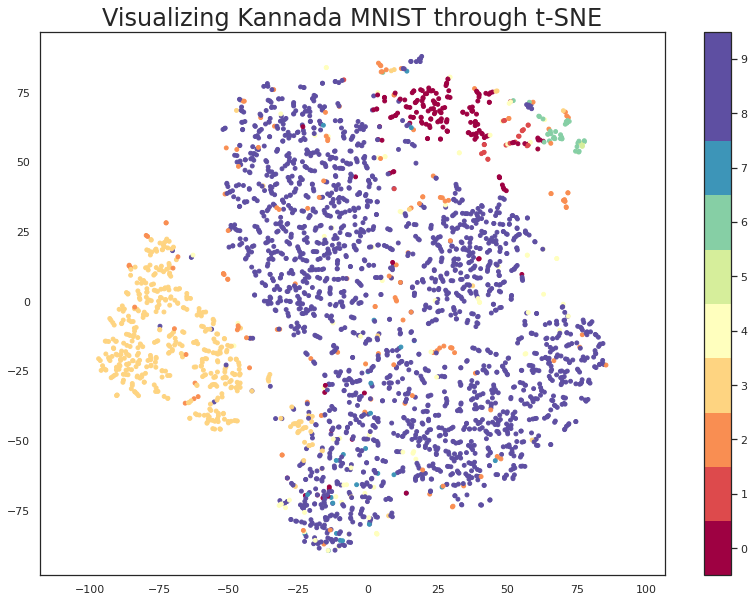

In [99]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')
%time
tsne = TSNE(random_state = 42, n_components=2,n_iter=1000,perplexity=7, verbose=2).fit_transform(encorded_x.reshape(-1,7*7*32)[:3000])
plt.scatter(tsne[:, 0], tsne[:, 1],c=y_train1[:3000], s= 15, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=24);

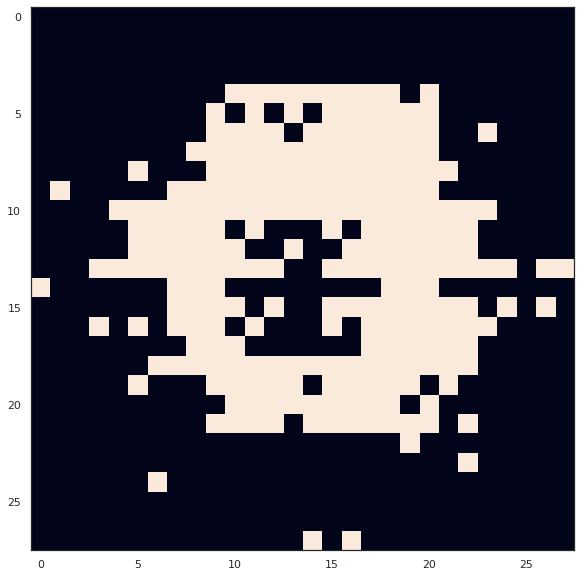

In [64]:
plt.imshow(x_train[y_train1==1][2].reshape(28,28))

In [90]:
a = np.where(tsne[:, 0]<-74)[0]

In [91]:
a

array([  27,   38,   62,   86,  155,  165,  290,  299,  317,  433,  446,
        511,  526,  604,  605,  659,  711,  739,  740,  745,  839,  887,
        964,  983, 1019, 1066, 1097, 1153, 1178, 1356, 1367, 1379, 1442,
       1449, 1450, 1483, 1484, 1487, 1522, 1524, 1530, 1635, 1639, 1669,
       1745, 1772, 1843, 1867, 1895, 1931, 1993])

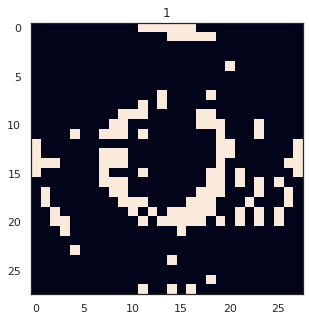

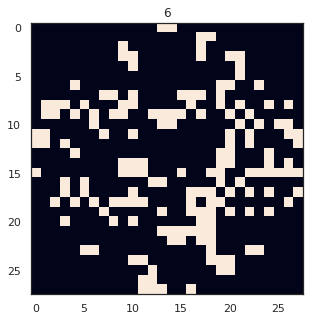

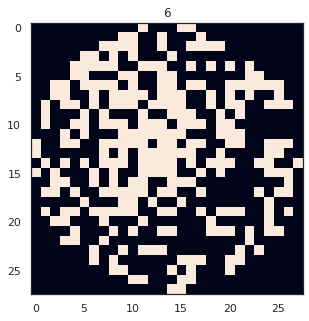

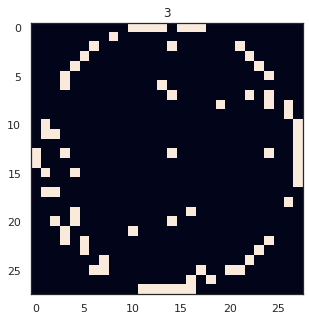

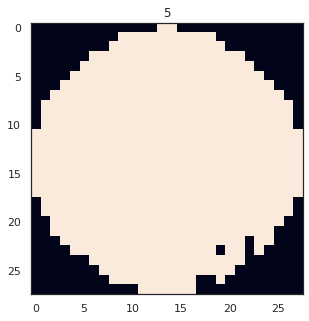

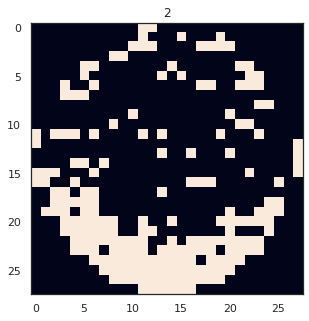

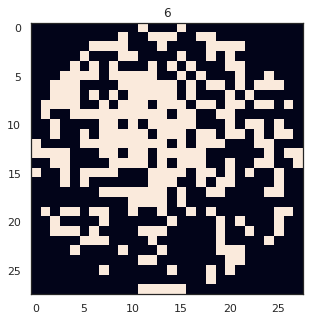

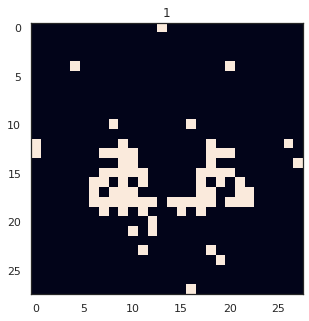

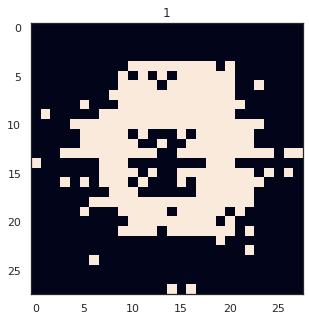

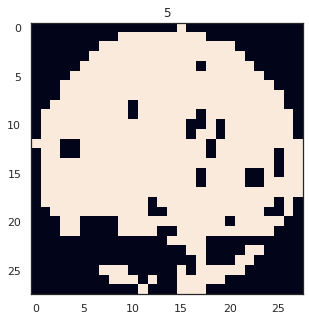

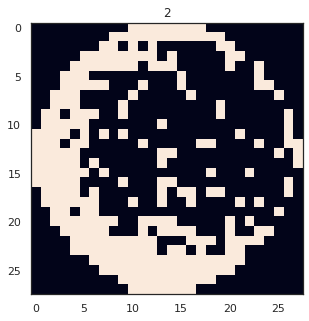

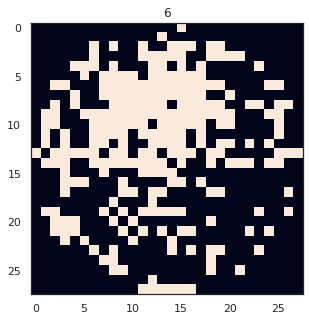

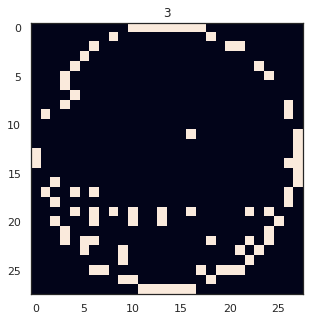

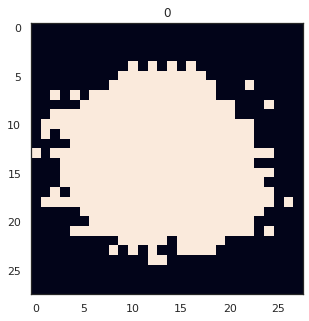

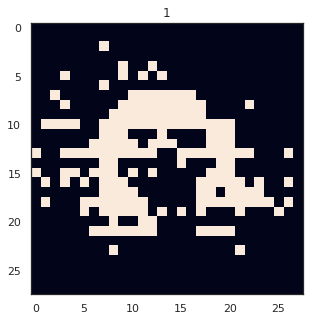

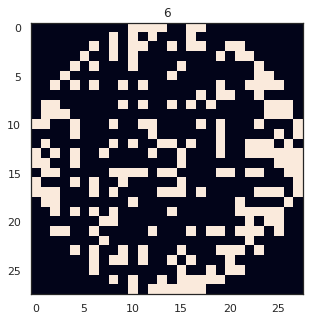

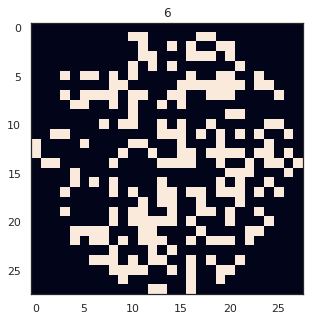

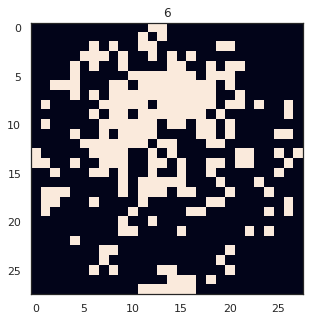

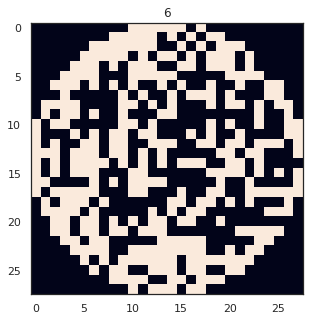

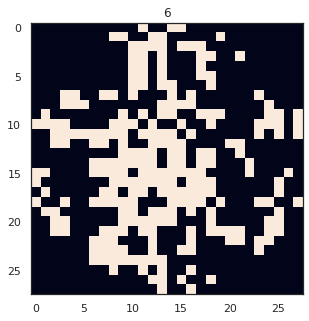

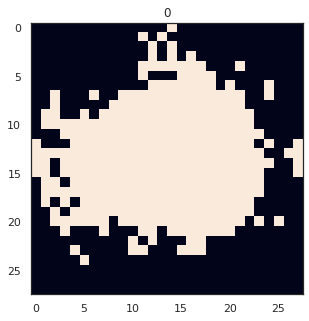

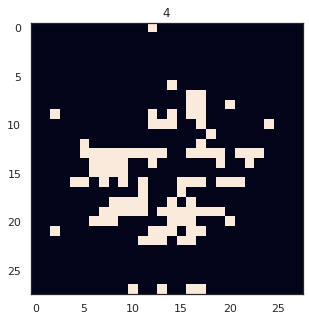

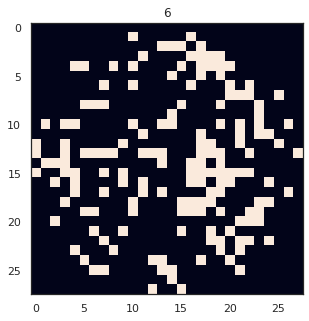

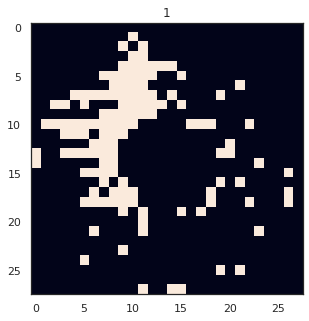

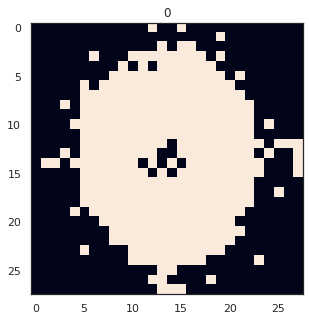

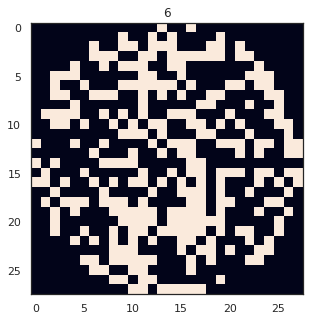

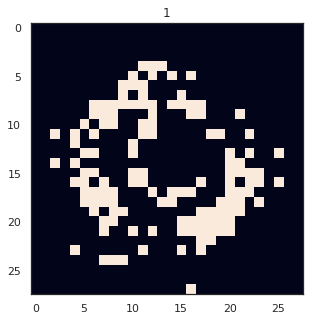

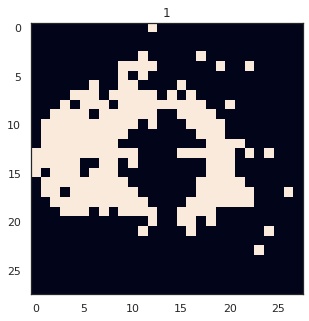

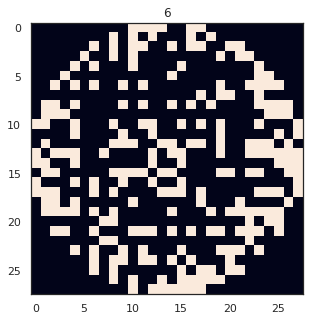

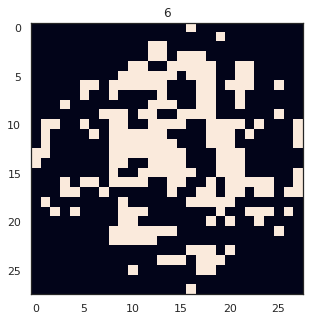

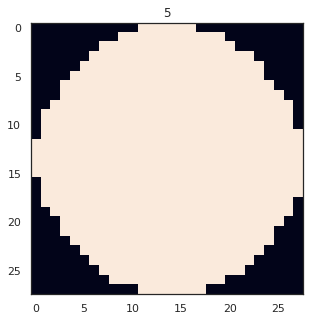

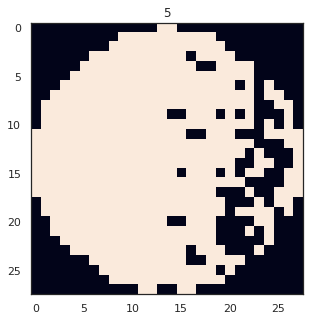

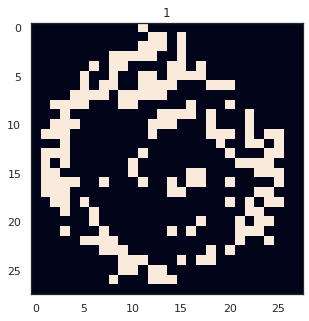

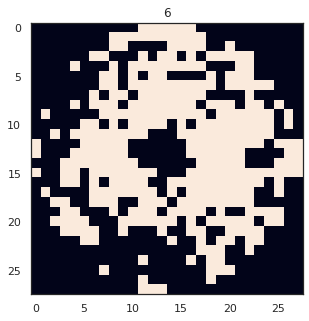

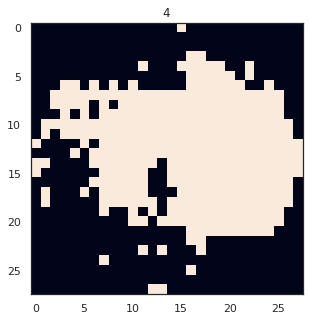

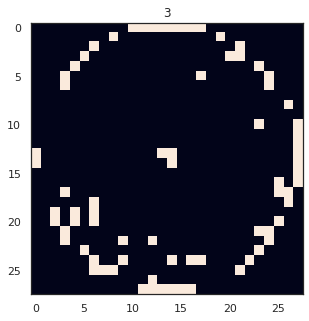

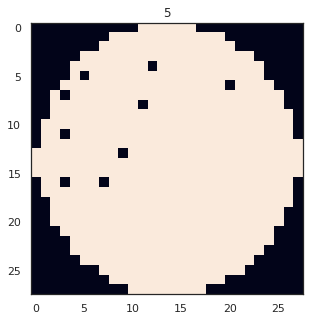

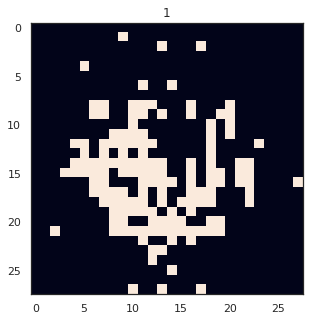

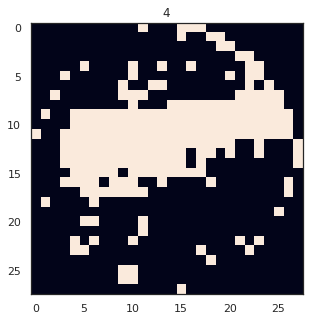

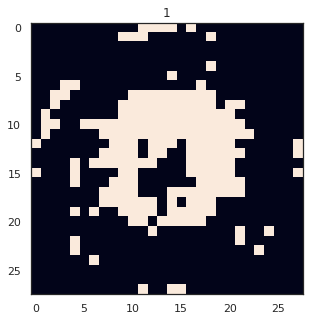

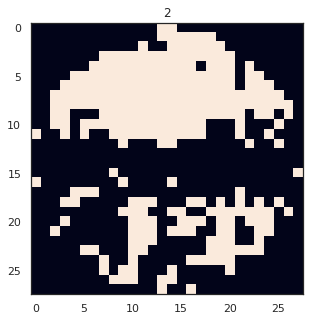

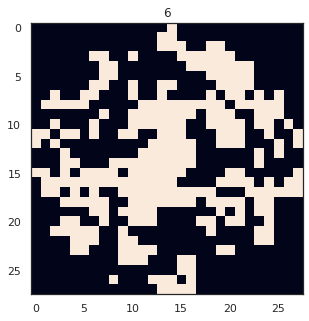

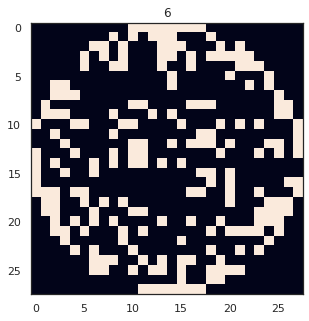

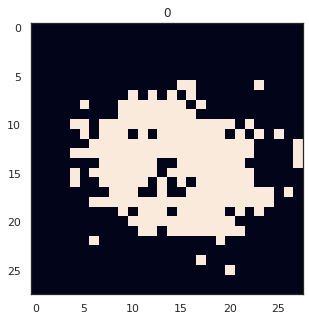

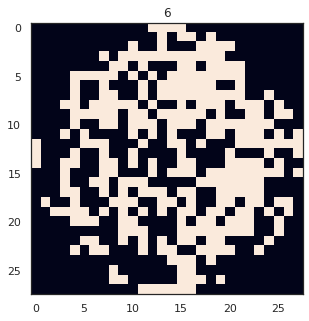

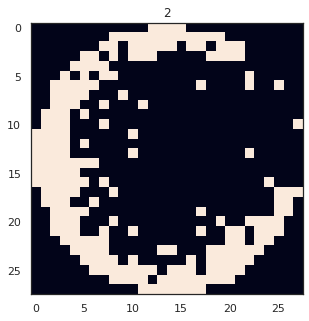

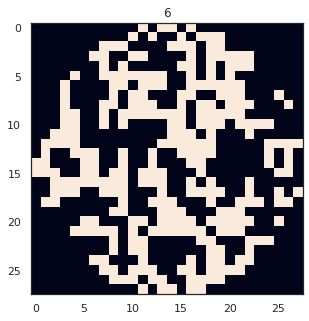

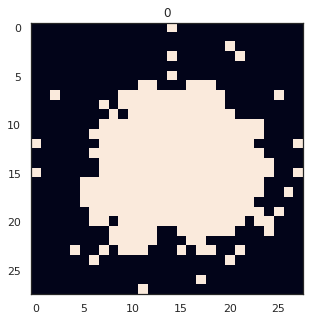

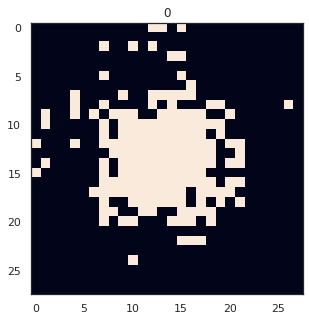

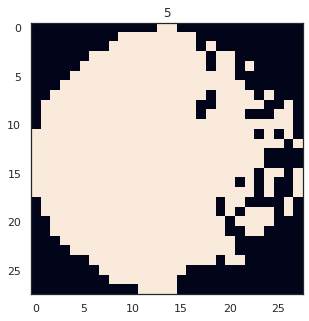

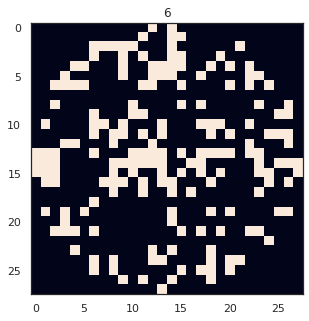

In [95]:
for i, l in enumerate(a):
  plt.figure(figsize=(10,5))
  plt.imshow(x_train[l].reshape(28,28))
  plt.title(np.argmax(y_train[l]))

In [98]:
plt.imshow(df[340].reshape(28,28))

NameError: ignored

In [ ]:
model2.fit(x_train, x_train,
           epoch = 50,
           )

사이즈 28.28 binary로 다 reszie scaling


In [48]:
# open cv
import cv2
# change to image size (28,28)
train_img = np.array([cv2.resize(img, dsize=(28,28)) for img in train_img])
#test_img = np.array([cv2.resize(img, dsize=(64,64)) for img in test_img])

In [49]:
# change to binary, only failure chip
def bin_img(img, lwr_thre=1, upr_thre=2):
    ret,img = cv2.threshold(img, lwr_thre, upr_thre, cv2.THRESH_BINARY)
    img = img/2
    img = img.astype(np.float32)
    return img

train_img = np.array([bin_img(img) for img in train_img])
#test_img = np.array([bin_img(img) for img in test_img])

In [50]:
train_img[0].shape

(28, 28)

In [ ]:
train_img_Edge = train_img[train_mode=="'Edge-Ring'"]
X_Edge = np.expand_dims(train_img_Edge , axis=-1)

In [ ]:
X_Edge = np.expand_dims(train_img, axis=-1)

In [ ]:
X_Edge.shape

In [ ]:
set(train_mode)

In [ ]:
train_img_Donut = train_img[train_mode=="'Donut'"]
X_Donut = np.expand_dims(train_img_Donut , axis=-1)

## How to Define and Train the Discriminator Model

In [ ]:
# example of defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
# define discriminator 

def define_discriminator(input_shape =(28,28,1)) :
  model = Sequential()
  model.add(Conv2D(64,(3,3), strides=(2,2), padding='same', input_shape = input_shape))
  model.add(Dropout(0.4))
  model.add(Conv2D(64,(3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha =0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  opt = Adam( learning_rate = 0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  

  return model

We can see that the aggressive 2×2 stride acts to down-sample the input image, first from 28×28 to 14×14, then to 7×7, before the model makes an output prediction.

We could start training this model now with real examples with a class label of one, and randomly generated samples with a class label of zero.

In [ ]:
# define model
model = define_discriminator()

The model will be updated in batches, specifically with a collection of real samples and a collection of generated samples. On training, epoch is defined as one pass through the entire training dataset.

The generate_real_samples() function below will take the training dataset as an argument and will select a random subsample of images;


In [ ]:
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = np.random.randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, 1))
	return X, y

The generate_fake_samples() function below implements this behavior and generates images of random pixel values and their associated class label of 0, for fake.

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = g_model.predict(x_input)
	# create 'fake' class labels (0)
	y = np.zeros((n_samples, 1))
	return X,y

Finally, we need to train the discriminator model. 

The train_discriminator() function implements this, using a batch size of 256 images where 128 are real and 128 are fake each iteration.

In [ ]:
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
  half_batch = int(n_batch/2)
  for i in range(n_iter):
    X_real, y_real, generate_real_samples(dataset, half_batch)
    _, real_acc = model.train_on_batch(X_real, y_real)
    X_fake, y_fake = generate_fake_samples(dataset, half_batch)
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    print(f'iteration : {i+1}, real acc : {real_acc}, fake acc : {fake_acc}')


## How to Define and Use the Generator Model

It does this by taking a point from the latent space as input and outputting a square grayscale image. The latent space is an arbitrarily defined vector space of Gaussian-distributed values, 

It has no meaning, but by drawing points from this space randomly and providing them to the generator model during training, the generator model will assign meaning to the latent points and, in turn, the latent space, until, at the end of training, the latent vector space represents a compressed representation of the output space,




The first is a Dense layer as the first hidden layer that has enough nodes to represent a low-resolution version of the output image. Specifically, an image half the size (one quarter the area) of the output image would be 14×14 or 196 nodes, and an image one quarter the size (one eighth the area) would be 7×7 or 49 nodes .

 We want the same thing at CNN in reverse

 It will do exactly the opposite of what we did at the cnn architecture.


+ Inputs: Point in latent space, e.g. a 100 element vector of Gaussian random numbers.
+ Outputs: Two-dimensional square grayscale image of 28×28 pixels with pixel values in [0,1].

In [ ]:
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU

# define the standalone generator model
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))
	return model

## How to Train the Generator Model

+ Inputs: Point in latent space, e.g. a 100 element vector of Gaussian random numbers.

+ Outputs: Binary classification, likelihood the sample is real (or fake).

In [27]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(g_model)
	# add the discriminator
	model.add(d_model)
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [28]:
def train_gan(gan_model, latent_dim, n_epochs=100, n_batch=256):
	# manually enumerate epochs
	for i in range(n_epochs):
		# prepare points in latent space as input for the generator
		x_gan = generate_latent_points(latent_dim, n_batch)
		# create inverted labels for the fake samples
		y_gan = np.ones((n_batch, 1))
		# update the generator via the discriminator's error
		gan_model.train_on_batch(x_gan, y_gan)

In [29]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = np.ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))

## How to Evaluate GAN Model Performance



In [30]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(image_file_path, examples, epoch, n=3):
	# plot images
	for i in range(n * n):
		# define subplot
		plt.subplot(n, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(examples[i, :, :, 0], cmap='gray_r')
	# save plot to file
	filename = image_file_path + '/generated_plot_e%03d.png' % (epoch+1)
	plt.savefig(filename)
	plt.close()

In [31]:
# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(image_file_path,model_file_path, epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
	# prepare real samples
	X_real, y_real = generate_real_samples(dataset, n_samples)
	# evaluate discriminator on real examples
	_, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
	# evaluate discriminator on fake examples
	_, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
	# save plot
	save_plot(image_file_path,x_fake, epoch)
	# save the generator model tile file
	filename = model_file_path+'/generator_model_%03d.h5' % (epoch + 1)
	g_model.save(filename)

In [32]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256, image_file_path=None, model_file_path=None):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
			X, y = np.vstack((X_real, X_fake)),np.vstack((y_real, y_fake))
			# update discriminator model weights
			d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = np.ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
		if (i+1) % 10 == 0:
			summarize_performance(i, g_model, d_model, dataset, latent_dim, image_file_path, model_file_path)

## Test On Dataset

In [ ]:
! pwd

/content/gdrive/My Drive/Wafer/LSWMD


In [ ]:
% cd /content/gdrive/MyDrive/Wafer 

/content/gdrive/MyDrive/Wafer


In [ ]:
np.unique(train_mode)

array(["'Center'", "'Donut'", "'Edge-Loc'", "'Edge-Ring'", "'Loc'",
       "'Near-full'", "'Random'", "'Scratch'", "'none'"], dtype='<U11')

In [ ]:
train_img_Edge = train_img[train_mode=="'Edge-Ring'"]
X_Edge = np.expand_dims(train_img_Edge , axis=-1)

```{python}
for label in np.unique(train_mode) :
  ["'Center'", "'Donut'", "'Edge-Loc'", "'Edge-Ring'", "'Loc'",
       "'Near-full'", "'Random'", "'Scratch'", "'none'"]

  ```

In [ ]:
os.getcwd() 

'/content/gdrive/My Drive/Wafer'

In [ ]:
import os 
from tqdm import tqdm

label =  "'Scratch'"# Due to Colab RAM constraint, can`t use iteration

train_X = train_img[train_mode==label]
X = np.expand_dims(train_X , axis=-1)
  


model_path = './'+'model/'+label 
image_path = './'+'image/'+label

print(f'Current Model Path : {model_path} \n')
print(f'Current Image Path : {image_path} \n')

try :
  if not os.path.exists(model_path):
    os.makedirs(model_path)
    
  if not os.path.exists(image_path):
    os.makedirs(image_path)
except OSError :
  print("Error : Can not create the directory {}".format(path))


# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
  # create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data

dataset = X 
n_batch = 10
n_epochs = 200 


bat_per_epo = int(dataset.shape[0] / n_batch)
half_batch = int(n_batch / 2)
	# manually enumerate epochs
for i in tqdm(range(n_epochs)):
		# enumerate batches over the training set
	for j in range(bat_per_epo):
			# get randomly selected 'real' samples
		X_real, y_real = generate_real_samples(dataset, half_batch)
			# generate 'fake' examples
		X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# create training set for the discriminator
		X, y = np.vstack((X_real, X_fake)),np.vstack((y_real, y_fake))
			# update discriminator model weights
		d_loss, _ = d_model.train_on_batch(X, y)
			# prepare points in latent space as input for the generator
		X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
		y_gan = np.ones((n_batch, 1))
			# update the generator via the discriminator's error
		g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
		print('>%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance, sometimes
	if (i+1) % 10 == 0:
		summarize_performance(image_file_path=image_path, model_file_path=model_path, epoch=i, g_model=g_model, d_model=d_model, dataset=X, latent_dim=latent_dim, n_samples=100)


# train model
#train(g_model, d_model, gan_model, X, latent_dim,n_epochs=500, n_batch=50, image_file_path=model_path, model_file_path=image_path)






  0%|          | 0/200 [00:00<?, ?it/s]

Current Model Path : ./model/'Scratch' 

Current Image Path : ./image/'Scratch' 

>1, 1/50, d=0.704, g=0.744
>1, 2/50, d=0.676, g=0.803
>1, 3/50, d=0.673, g=0.859
>1, 4/50, d=0.643, g=0.841
>1, 5/50, d=0.641, g=0.877
>1, 6/50, d=0.640, g=0.900
>1, 7/50, d=0.605, g=0.931
>1, 8/50, d=0.592, g=0.929
>1, 9/50, d=0.619, g=0.982
>1, 10/50, d=0.615, g=0.972
>1, 11/50, d=0.623, g=0.959
>1, 12/50, d=0.633, g=0.906
>1, 13/50, d=0.621, g=0.880
>1, 14/50, d=0.717, g=0.802
>1, 15/50, d=0.666, g=0.765
>1, 16/50, d=0.666, g=0.740
>1, 17/50, d=0.683, g=0.723
>1, 18/50, d=0.703, g=0.719
>1, 19/50, d=0.697, g=0.707
>1, 20/50, d=0.680, g=0.703
>1, 21/50, d=0.697, g=0.702
>1, 22/50, d=0.706, g=0.699
>1, 23/50, d=0.695, g=0.701
>1, 24/50, d=0.707, g=0.701
>1, 25/50, d=0.712, g=0.698
>1, 26/50, d=0.695, g=0.699
>1, 27/50, d=0.695, g=0.695
>1, 28/50, d=0.687, g=0.697
>1, 29/50, d=0.700, g=0.696
>1, 30/50, d=0.704, g=0.694
>1, 31/50, d=0.686, g=0.693
>1, 32/50, d=0.695, g=0.697
>1, 33/50, d=0.704, g=0.694
>1,





  0%|          | 1/200 [00:04<16:23,  4.94s/it]

>1, 49/50, d=0.690, g=0.696
>1, 50/50, d=0.676, g=0.697
>2, 1/50, d=0.684, g=0.696
>2, 2/50, d=0.673, g=0.695
>2, 3/50, d=0.678, g=0.696
>2, 4/50, d=0.678, g=0.695
>2, 5/50, d=0.680, g=0.695
>2, 6/50, d=0.677, g=0.694
>2, 7/50, d=0.674, g=0.695
>2, 8/50, d=0.692, g=0.696
>2, 9/50, d=0.677, g=0.695
>2, 10/50, d=0.672, g=0.694
>2, 11/50, d=0.672, g=0.694
>2, 12/50, d=0.670, g=0.694
>2, 13/50, d=0.657, g=0.695
>2, 14/50, d=0.673, g=0.694
>2, 15/50, d=0.675, g=0.695
>2, 16/50, d=0.667, g=0.695
>2, 17/50, d=0.674, g=0.695
>2, 18/50, d=0.679, g=0.693
>2, 19/50, d=0.671, g=0.694
>2, 20/50, d=0.673, g=0.694
>2, 21/50, d=0.672, g=0.693
>2, 22/50, d=0.650, g=0.694
>2, 23/50, d=0.657, g=0.694
>2, 24/50, d=0.668, g=0.693
>2, 25/50, d=0.673, g=0.694
>2, 26/50, d=0.665, g=0.693
>2, 27/50, d=0.642, g=0.694
>2, 28/50, d=0.656, g=0.694
>2, 29/50, d=0.668, g=0.695
>2, 30/50, d=0.670, g=0.694
>2, 31/50, d=0.648, g=0.694
>2, 32/50, d=0.640, g=0.695
>2, 33/50, d=0.639, g=0.696
>2, 34/50, d=0.630, g=0.696
>





  1%|          | 2/200 [00:07<14:17,  4.33s/it]

>2, 50/50, d=0.586, g=0.697
>3, 1/50, d=0.578, g=0.699
>3, 2/50, d=0.600, g=0.700
>3, 3/50, d=0.576, g=0.700
>3, 4/50, d=0.616, g=0.700
>3, 5/50, d=0.621, g=0.699
>3, 6/50, d=0.611, g=0.700
>3, 7/50, d=0.564, g=0.701
>3, 8/50, d=0.634, g=0.700
>3, 9/50, d=0.593, g=0.701
>3, 10/50, d=0.568, g=0.702
>3, 11/50, d=0.614, g=0.702
>3, 12/50, d=0.599, g=0.701
>3, 13/50, d=0.627, g=0.700
>3, 14/50, d=0.615, g=0.700
>3, 15/50, d=0.519, g=0.703
>3, 16/50, d=0.525, g=0.702
>3, 17/50, d=0.662, g=0.702
>3, 18/50, d=0.567, g=0.702
>3, 19/50, d=0.598, g=0.702
>3, 20/50, d=0.594, g=0.704
>3, 21/50, d=0.564, g=0.703
>3, 22/50, d=0.541, g=0.704
>3, 23/50, d=0.548, g=0.705
>3, 24/50, d=0.613, g=0.703
>3, 25/50, d=0.583, g=0.703
>3, 26/50, d=0.571, g=0.706
>3, 27/50, d=0.576, g=0.704
>3, 28/50, d=0.559, g=0.704
>3, 29/50, d=0.568, g=0.706
>3, 30/50, d=0.605, g=0.705
>3, 31/50, d=0.536, g=0.703
>3, 32/50, d=0.573, g=0.706
>3, 33/50, d=0.546, g=0.707
>3, 34/50, d=0.486, g=0.709
>3, 35/50, d=0.520, g=0.707
>





  2%|▏         | 3/200 [00:10<12:49,  3.91s/it]

>3, 48/50, d=0.443, g=0.713
>3, 49/50, d=0.395, g=0.718
>3, 50/50, d=0.445, g=0.719
>4, 1/50, d=0.513, g=0.717
>4, 2/50, d=0.485, g=0.718
>4, 3/50, d=0.473, g=0.716
>4, 4/50, d=0.538, g=0.714
>4, 5/50, d=0.527, g=0.712
>4, 6/50, d=0.465, g=0.717
>4, 7/50, d=0.526, g=0.718
>4, 8/50, d=0.546, g=0.715
>4, 9/50, d=0.491, g=0.717
>4, 10/50, d=0.563, g=0.716
>4, 11/50, d=0.523, g=0.715
>4, 12/50, d=0.470, g=0.718
>4, 13/50, d=0.478, g=0.717
>4, 14/50, d=0.427, g=0.717
>4, 15/50, d=0.529, g=0.718
>4, 16/50, d=0.495, g=0.716
>4, 17/50, d=0.416, g=0.722
>4, 18/50, d=0.498, g=0.725
>4, 19/50, d=0.392, g=0.727
>4, 20/50, d=0.490, g=0.727
>4, 21/50, d=0.528, g=0.727
>4, 22/50, d=0.442, g=0.726
>4, 23/50, d=0.403, g=0.727
>4, 24/50, d=0.461, g=0.731
>4, 25/50, d=0.497, g=0.731
>4, 26/50, d=0.508, g=0.728
>4, 27/50, d=0.388, g=0.731
>4, 28/50, d=0.421, g=0.737
>4, 29/50, d=0.510, g=0.737
>4, 30/50, d=0.474, g=0.735
>4, 31/50, d=0.365, g=0.736
>4, 32/50, d=0.483, g=0.740
>4, 33/50, d=0.492, g=0.738
>





  2%|▏         | 4/200 [00:13<11:44,  3.60s/it]

>4, 50/50, d=0.476, g=0.762
>5, 1/50, d=0.417, g=0.762
>5, 2/50, d=0.326, g=0.772
>5, 3/50, d=0.487, g=0.780
>5, 4/50, d=0.482, g=0.780
>5, 5/50, d=0.421, g=0.784
>5, 6/50, d=0.487, g=0.783
>5, 7/50, d=0.413, g=0.789
>5, 8/50, d=0.348, g=0.804
>5, 9/50, d=0.433, g=0.808
>5, 10/50, d=0.409, g=0.813
>5, 11/50, d=0.356, g=0.818
>5, 12/50, d=0.372, g=0.828
>5, 13/50, d=0.416, g=0.834
>5, 14/50, d=0.413, g=0.840
>5, 15/50, d=0.453, g=0.842
>5, 16/50, d=0.410, g=0.848
>5, 17/50, d=0.411, g=0.846
>5, 18/50, d=0.352, g=0.855
>5, 19/50, d=0.399, g=0.864
>5, 20/50, d=0.302, g=0.881
>5, 21/50, d=0.397, g=0.887
>5, 22/50, d=0.381, g=0.891
>5, 23/50, d=0.440, g=0.906
>5, 24/50, d=0.342, g=0.906
>5, 25/50, d=0.399, g=0.913
>5, 26/50, d=0.363, g=0.920
>5, 27/50, d=0.375, g=0.927
>5, 28/50, d=0.328, g=0.945
>5, 29/50, d=0.355, g=0.953
>5, 30/50, d=0.377, g=0.973
>5, 31/50, d=0.356, g=0.973
>5, 32/50, d=0.346, g=0.983
>5, 33/50, d=0.435, g=0.984
>5, 34/50, d=0.325, g=0.992
>5, 35/50, d=0.365, g=1.000
>





  2%|▎         | 5/200 [00:16<10:56,  3.37s/it]

>5, 48/50, d=0.277, g=1.106
>5, 49/50, d=0.248, g=1.137
>5, 50/50, d=0.307, g=1.154
>6, 1/50, d=0.314, g=1.161
>6, 2/50, d=0.301, g=1.199
>6, 3/50, d=0.298, g=1.199
>6, 4/50, d=0.324, g=1.190
>6, 5/50, d=0.192, g=1.233
>6, 6/50, d=0.188, g=1.300
>6, 7/50, d=0.194, g=1.354
>6, 8/50, d=0.306, g=1.337
>6, 9/50, d=0.178, g=1.381
>6, 10/50, d=0.276, g=1.398
>6, 11/50, d=0.239, g=1.402
>6, 12/50, d=0.318, g=1.371
>6, 13/50, d=0.172, g=1.385
>6, 14/50, d=0.436, g=1.383
>6, 15/50, d=0.181, g=1.379
>6, 16/50, d=0.317, g=1.336
>6, 17/50, d=0.231, g=1.376
>6, 18/50, d=0.225, g=1.353
>6, 19/50, d=0.191, g=1.416
>6, 20/50, d=0.191, g=1.438
>6, 21/50, d=0.276, g=1.457
>6, 22/50, d=0.226, g=1.455
>6, 23/50, d=0.375, g=1.415
>6, 24/50, d=0.146, g=1.426
>6, 25/50, d=0.319, g=1.410
>6, 26/50, d=0.200, g=1.444
>6, 27/50, d=0.264, g=1.484
>6, 28/50, d=0.207, g=1.471
>6, 29/50, d=0.175, g=1.538
>6, 30/50, d=0.201, g=1.542
>6, 31/50, d=0.171, g=1.634
>6, 32/50, d=0.127, g=1.574
>6, 33/50, d=1.294, g=0.288
>





  3%|▎         | 6/200 [00:19<10:22,  3.21s/it]

>6, 50/50, d=0.572, g=2.742
>7, 1/50, d=0.637, g=2.860
>7, 2/50, d=0.616, g=1.909
>7, 3/50, d=0.684, g=1.611
>7, 4/50, d=0.722, g=1.123
>7, 5/50, d=0.671, g=1.026
>7, 6/50, d=0.700, g=0.930
>7, 7/50, d=0.711, g=0.897
>7, 8/50, d=0.708, g=0.834
>7, 9/50, d=0.716, g=0.813
>7, 10/50, d=0.703, g=0.795
>7, 11/50, d=0.685, g=0.811
>7, 12/50, d=0.718, g=0.793
>7, 13/50, d=0.724, g=0.796
>7, 14/50, d=0.756, g=0.766
>7, 15/50, d=0.706, g=0.781
>7, 16/50, d=0.735, g=0.770
>7, 17/50, d=0.693, g=0.763
>7, 18/50, d=0.723, g=0.760
>7, 19/50, d=0.683, g=0.757
>7, 20/50, d=0.694, g=0.756
>7, 21/50, d=0.684, g=0.754
>7, 22/50, d=0.669, g=0.749
>7, 23/50, d=0.655, g=0.758
>7, 24/50, d=0.641, g=0.757
>7, 25/50, d=0.652, g=0.752
>7, 26/50, d=0.655, g=0.753
>7, 27/50, d=0.668, g=0.760
>7, 28/50, d=0.666, g=0.761
>7, 29/50, d=0.641, g=0.744
>7, 30/50, d=0.663, g=0.754
>7, 31/50, d=0.668, g=0.760
>7, 32/50, d=0.660, g=0.737
>7, 33/50, d=0.641, g=0.745
>7, 34/50, d=0.641, g=0.753
>7, 35/50, d=0.641, g=0.744
>





  4%|▎         | 7/200 [00:22<09:58,  3.10s/it]

>7, 48/50, d=0.606, g=0.746
>7, 49/50, d=0.640, g=0.750
>7, 50/50, d=0.619, g=0.761
>8, 1/50, d=0.657, g=0.759
>8, 2/50, d=0.614, g=0.756
>8, 3/50, d=0.621, g=0.767
>8, 4/50, d=0.618, g=0.775
>8, 5/50, d=0.626, g=0.764
>8, 6/50, d=0.624, g=0.772
>8, 7/50, d=0.570, g=0.769
>8, 8/50, d=0.533, g=0.757
>8, 9/50, d=0.612, g=0.759
>8, 10/50, d=0.584, g=0.766
>8, 11/50, d=0.578, g=0.769
>8, 12/50, d=0.586, g=0.785
>8, 13/50, d=0.554, g=0.784
>8, 14/50, d=0.627, g=0.777
>8, 15/50, d=0.530, g=0.788
>8, 16/50, d=0.614, g=0.768
>8, 17/50, d=0.587, g=0.790
>8, 18/50, d=0.609, g=0.785
>8, 19/50, d=0.491, g=0.781
>8, 20/50, d=0.595, g=0.795
>8, 21/50, d=0.556, g=0.812
>8, 22/50, d=0.590, g=0.797
>8, 23/50, d=0.633, g=0.798
>8, 24/50, d=0.547, g=0.800
>8, 25/50, d=0.584, g=0.800
>8, 26/50, d=0.543, g=0.805
>8, 27/50, d=0.571, g=0.808
>8, 28/50, d=0.559, g=0.814
>8, 29/50, d=0.629, g=0.799
>8, 30/50, d=0.574, g=0.815
>8, 31/50, d=0.573, g=0.800
>8, 32/50, d=0.571, g=0.801
>8, 33/50, d=0.564, g=0.814
>





  4%|▍         | 8/200 [00:25<09:43,  3.04s/it]

>8, 50/50, d=0.497, g=0.839
>9, 1/50, d=0.613, g=0.836
>9, 2/50, d=0.574, g=0.843
>9, 3/50, d=0.549, g=0.833
>9, 4/50, d=0.487, g=0.848
>9, 5/50, d=0.566, g=0.817
>9, 6/50, d=0.484, g=0.847
>9, 7/50, d=0.622, g=0.837
>9, 8/50, d=0.565, g=0.838
>9, 9/50, d=0.587, g=0.847
>9, 10/50, d=0.545, g=0.835
>9, 11/50, d=0.566, g=0.835
>9, 12/50, d=0.495, g=0.836
>9, 13/50, d=0.572, g=0.837
>9, 14/50, d=0.486, g=0.827
>9, 15/50, d=0.597, g=0.829
>9, 16/50, d=0.555, g=0.844
>9, 17/50, d=0.528, g=0.848
>9, 18/50, d=0.591, g=0.835
>9, 19/50, d=0.476, g=0.852
>9, 20/50, d=0.427, g=0.816
>9, 21/50, d=0.557, g=0.850
>9, 22/50, d=0.562, g=0.815
>9, 23/50, d=0.529, g=0.836
>9, 24/50, d=0.524, g=0.858
>9, 25/50, d=0.530, g=0.825
>9, 26/50, d=0.484, g=0.844
>9, 27/50, d=0.528, g=0.859
>9, 28/50, d=0.465, g=0.805
>9, 29/50, d=0.524, g=0.816
>9, 30/50, d=0.486, g=0.876
>9, 31/50, d=0.587, g=0.868
>9, 32/50, d=0.631, g=0.864
>9, 33/50, d=0.502, g=0.864
>9, 34/50, d=0.420, g=0.874
>9, 35/50, d=0.528, g=0.895
>





  4%|▍         | 9/200 [00:27<09:29,  2.98s/it]

>9, 48/50, d=0.653, g=0.804
>9, 49/50, d=0.617, g=0.859
>9, 50/50, d=0.548, g=0.824
>10, 1/50, d=0.582, g=0.853
>10, 2/50, d=0.558, g=0.809
>10, 3/50, d=0.680, g=0.745
>10, 4/50, d=0.514, g=0.748
>10, 5/50, d=0.497, g=0.707
>10, 6/50, d=0.585, g=0.718
>10, 7/50, d=1.139, g=0.677
>10, 8/50, d=0.651, g=0.730
>10, 9/50, d=0.589, g=0.483
>10, 10/50, d=0.691, g=0.640
>10, 11/50, d=1.056, g=0.370
>10, 12/50, d=2.020, g=0.051
>10, 13/50, d=2.550, g=0.108
>10, 14/50, d=1.627, g=0.480
>10, 15/50, d=0.940, g=1.989
>10, 16/50, d=0.445, g=2.660
>10, 17/50, d=0.416, g=2.353
>10, 18/50, d=0.470, g=1.633
>10, 19/50, d=0.570, g=1.195
>10, 20/50, d=0.570, g=1.052
>10, 21/50, d=0.647, g=0.923
>10, 22/50, d=0.650, g=0.922
>10, 23/50, d=0.622, g=0.860
>10, 24/50, d=0.571, g=0.910
>10, 25/50, d=0.617, g=0.855
>10, 26/50, d=0.560, g=0.844
>10, 27/50, d=0.611, g=0.822
>10, 28/50, d=0.634, g=0.827
>10, 29/50, d=0.580, g=0.794
>10, 30/50, d=0.623, g=0.816
>10, 31/50, d=0.567, g=0.814
>10, 32/50, d=0.608, g=0.8





  5%|▌         | 10/200 [00:31<09:55,  3.13s/it]

>11, 1/50, d=0.580, g=0.788
>11, 2/50, d=0.532, g=0.719
>11, 3/50, d=0.681, g=0.730
>11, 4/50, d=0.668, g=0.792
>11, 5/50, d=0.618, g=0.758
>11, 6/50, d=0.532, g=0.780
>11, 7/50, d=0.580, g=0.755
>11, 8/50, d=0.626, g=0.787
>11, 9/50, d=0.548, g=0.826
>11, 10/50, d=0.562, g=0.748
>11, 11/50, d=0.634, g=0.841
>11, 12/50, d=0.534, g=0.768
>11, 13/50, d=0.654, g=0.749
>11, 14/50, d=0.554, g=0.799
>11, 15/50, d=0.609, g=0.781
>11, 16/50, d=0.637, g=0.811
>11, 17/50, d=0.585, g=0.739
>11, 18/50, d=0.592, g=0.782
>11, 19/50, d=0.711, g=0.720
>11, 20/50, d=0.662, g=0.795
>11, 21/50, d=0.611, g=0.771
>11, 22/50, d=0.587, g=0.819
>11, 23/50, d=0.639, g=0.761
>11, 24/50, d=0.600, g=0.778
>11, 25/50, d=0.600, g=0.782
>11, 26/50, d=0.721, g=0.767
>11, 27/50, d=0.565, g=0.710
>11, 28/50, d=0.531, g=0.824
>11, 29/50, d=0.642, g=0.789
>11, 30/50, d=0.620, g=0.768
>11, 31/50, d=0.592, g=0.739
>11, 32/50, d=0.580, g=0.829
>11, 33/50, d=0.581, g=0.790
>11, 34/50, d=0.576, g=0.739
>11, 35/50, d=0.637, g=





  6%|▌         | 11/200 [00:34<09:43,  3.09s/it]

>11, 48/50, d=0.692, g=0.842
>11, 49/50, d=0.574, g=0.806
>11, 50/50, d=0.640, g=0.791
>12, 1/50, d=0.606, g=0.833
>12, 2/50, d=0.606, g=0.797
>12, 3/50, d=0.695, g=0.781
>12, 4/50, d=0.650, g=0.863
>12, 5/50, d=0.633, g=0.875
>12, 6/50, d=0.584, g=0.802
>12, 7/50, d=0.585, g=0.714
>12, 8/50, d=0.625, g=0.811
>12, 9/50, d=0.579, g=0.761
>12, 10/50, d=0.621, g=0.778
>12, 11/50, d=0.627, g=0.768
>12, 12/50, d=0.663, g=0.777
>12, 13/50, d=0.552, g=0.822
>12, 14/50, d=0.578, g=0.845
>12, 15/50, d=0.607, g=0.810
>12, 16/50, d=0.714, g=0.835
>12, 17/50, d=0.626, g=0.832
>12, 18/50, d=0.657, g=0.770
>12, 19/50, d=0.610, g=0.784
>12, 20/50, d=0.631, g=0.828
>12, 21/50, d=0.582, g=0.914
>12, 22/50, d=0.659, g=0.796
>12, 23/50, d=0.568, g=0.802
>12, 24/50, d=0.665, g=0.854
>12, 25/50, d=0.607, g=0.772
>12, 26/50, d=0.601, g=0.790
>12, 27/50, d=0.654, g=0.771
>12, 28/50, d=0.652, g=0.829
>12, 29/50, d=0.595, g=0.834
>12, 30/50, d=0.591, g=0.818
>12, 31/50, d=0.635, g=0.869
>12, 32/50, d=0.557, g=





  6%|▌         | 12/200 [00:37<09:52,  3.15s/it]

>12, 49/50, d=0.519, g=0.761
>12, 50/50, d=0.620, g=0.730
>13, 1/50, d=0.588, g=0.756
>13, 2/50, d=0.545, g=0.770
>13, 3/50, d=0.713, g=0.698
>13, 4/50, d=0.612, g=0.703
>13, 5/50, d=0.559, g=0.769
>13, 6/50, d=0.640, g=0.814
>13, 7/50, d=0.611, g=0.763
>13, 8/50, d=0.664, g=0.799
>13, 9/50, d=0.604, g=0.775
>13, 10/50, d=0.571, g=0.784
>13, 11/50, d=0.676, g=0.823
>13, 12/50, d=0.640, g=0.800
>13, 13/50, d=0.637, g=0.807
>13, 14/50, d=0.660, g=0.860
>13, 15/50, d=0.697, g=0.772
>13, 16/50, d=0.584, g=0.796
>13, 17/50, d=0.619, g=0.785
>13, 18/50, d=0.605, g=0.736
>13, 19/50, d=0.636, g=0.764
>13, 20/50, d=0.613, g=0.796
>13, 21/50, d=0.734, g=0.817
>13, 22/50, d=0.611, g=0.717
>13, 23/50, d=0.640, g=0.809
>13, 24/50, d=0.656, g=0.797
>13, 25/50, d=0.668, g=0.839
>13, 26/50, d=0.573, g=0.719
>13, 27/50, d=0.662, g=0.784
>13, 28/50, d=0.621, g=0.831
>13, 29/50, d=0.661, g=0.768
>13, 30/50, d=0.620, g=0.767
>13, 31/50, d=0.579, g=0.776
>13, 32/50, d=0.649, g=0.748
>13, 33/50, d=0.648, g=





  6%|▋         | 13/200 [00:40<09:29,  3.04s/it]

>13, 47/50, d=0.570, g=0.834
>13, 48/50, d=0.569, g=0.771
>13, 49/50, d=0.656, g=0.808
>13, 50/50, d=0.530, g=0.745
>14, 1/50, d=0.603, g=0.800
>14, 2/50, d=0.589, g=0.800
>14, 3/50, d=0.570, g=0.772
>14, 4/50, d=0.680, g=0.801
>14, 5/50, d=0.642, g=0.784
>14, 6/50, d=0.564, g=0.801
>14, 7/50, d=0.598, g=0.823
>14, 8/50, d=0.627, g=0.844
>14, 9/50, d=0.605, g=0.765
>14, 10/50, d=0.616, g=0.713
>14, 11/50, d=0.556, g=0.744
>14, 12/50, d=0.568, g=0.741
>14, 13/50, d=0.658, g=0.749
>14, 14/50, d=0.694, g=0.812
>14, 15/50, d=0.545, g=0.784
>14, 16/50, d=0.627, g=0.723
>14, 17/50, d=0.628, g=0.782
>14, 18/50, d=0.580, g=0.784
>14, 19/50, d=0.665, g=0.791
>14, 20/50, d=0.630, g=0.755
>14, 21/50, d=0.564, g=0.802
>14, 22/50, d=0.661, g=0.832
>14, 23/50, d=0.586, g=0.750
>14, 24/50, d=0.610, g=0.858
>14, 25/50, d=0.652, g=0.679
>14, 26/50, d=0.633, g=0.725
>14, 27/50, d=0.626, g=0.767
>14, 28/50, d=0.608, g=0.736
>14, 29/50, d=0.643, g=0.787
>14, 30/50, d=0.622, g=0.760
>14, 31/50, d=0.678, g=





  7%|▋         | 14/200 [00:43<09:18,  3.00s/it]

>14, 49/50, d=0.596, g=0.813
>14, 50/50, d=0.636, g=0.777
>15, 1/50, d=0.622, g=0.768
>15, 2/50, d=0.639, g=0.744
>15, 3/50, d=0.614, g=0.751
>15, 4/50, d=0.648, g=0.786
>15, 5/50, d=0.601, g=0.757
>15, 6/50, d=0.658, g=0.776
>15, 7/50, d=0.611, g=0.773
>15, 8/50, d=0.704, g=0.785
>15, 9/50, d=0.618, g=0.742
>15, 10/50, d=0.644, g=0.752
>15, 11/50, d=0.688, g=0.792
>15, 12/50, d=0.700, g=0.703
>15, 13/50, d=0.689, g=0.682
>15, 14/50, d=0.595, g=0.749
>15, 15/50, d=0.607, g=0.766
>15, 16/50, d=0.671, g=0.734
>15, 17/50, d=0.631, g=0.713
>15, 18/50, d=0.726, g=0.645
>15, 19/50, d=0.775, g=0.586
>15, 20/50, d=0.735, g=0.596
>15, 21/50, d=0.703, g=0.661
>15, 22/50, d=0.686, g=0.773
>15, 23/50, d=0.637, g=0.731
>15, 24/50, d=0.610, g=0.821
>15, 25/50, d=0.639, g=0.811
>15, 26/50, d=0.647, g=0.769
>15, 27/50, d=0.752, g=0.753
>15, 28/50, d=0.578, g=0.787
>15, 29/50, d=0.647, g=0.836
>15, 30/50, d=0.682, g=0.832
>15, 31/50, d=0.611, g=0.790
>15, 32/50, d=0.655, g=0.800
>15, 33/50, d=0.618, g=





  8%|▊         | 15/200 [00:46<09:07,  2.96s/it]

>15, 47/50, d=0.547, g=0.799
>15, 48/50, d=0.503, g=0.802
>15, 49/50, d=0.603, g=0.822
>15, 50/50, d=0.594, g=0.824
>16, 1/50, d=0.539, g=0.801
>16, 2/50, d=0.536, g=0.857
>16, 3/50, d=0.598, g=0.847
>16, 4/50, d=0.588, g=0.779
>16, 5/50, d=0.534, g=0.839
>16, 6/50, d=0.632, g=0.824
>16, 7/50, d=0.582, g=0.848
>16, 8/50, d=0.593, g=0.857
>16, 9/50, d=0.571, g=0.785
>16, 10/50, d=0.484, g=0.813
>16, 11/50, d=0.615, g=0.782
>16, 12/50, d=0.645, g=0.822
>16, 13/50, d=0.541, g=0.798
>16, 14/50, d=0.639, g=0.777
>16, 15/50, d=0.562, g=0.749
>16, 16/50, d=0.655, g=0.782
>16, 17/50, d=0.619, g=0.732
>16, 18/50, d=0.654, g=0.688
>16, 19/50, d=0.631, g=0.703
>16, 20/50, d=0.649, g=0.525
>16, 21/50, d=0.653, g=0.559
>16, 22/50, d=0.713, g=0.593
>16, 23/50, d=0.698, g=0.605
>16, 24/50, d=0.717, g=0.834
>16, 25/50, d=0.645, g=0.711
>16, 26/50, d=0.743, g=0.708
>16, 27/50, d=0.720, g=0.807
>16, 28/50, d=0.693, g=0.754
>16, 29/50, d=0.716, g=0.841
>16, 30/50, d=0.658, g=0.876
>16, 31/50, d=0.695, g=





  8%|▊         | 16/200 [00:49<09:03,  2.95s/it]

>16, 49/50, d=0.716, g=0.713
>16, 50/50, d=0.692, g=0.739
>17, 1/50, d=0.644, g=0.761
>17, 2/50, d=0.620, g=0.735
>17, 3/50, d=0.691, g=0.659
>17, 4/50, d=0.626, g=0.757
>17, 5/50, d=0.680, g=0.718
>17, 6/50, d=0.742, g=0.730
>17, 7/50, d=0.667, g=0.673
>17, 8/50, d=0.715, g=0.687
>17, 9/50, d=0.655, g=0.669
>17, 10/50, d=0.653, g=0.699
>17, 11/50, d=0.713, g=0.678
>17, 12/50, d=0.639, g=0.713
>17, 13/50, d=0.749, g=0.705
>17, 14/50, d=0.740, g=0.716
>17, 15/50, d=0.812, g=0.545
>17, 16/50, d=0.670, g=0.664
>17, 17/50, d=0.787, g=0.757
>17, 18/50, d=0.815, g=0.592
>17, 19/50, d=0.828, g=0.745
>17, 20/50, d=0.753, g=0.792
>17, 21/50, d=0.707, g=0.699
>17, 22/50, d=0.791, g=0.790
>17, 23/50, d=0.742, g=0.670
>17, 24/50, d=0.717, g=0.726
>17, 25/50, d=0.670, g=0.588
>17, 26/50, d=0.727, g=0.733
>17, 27/50, d=0.703, g=0.618
>17, 28/50, d=0.707, g=0.735
>17, 29/50, d=0.632, g=0.691
>17, 30/50, d=0.741, g=0.780
>17, 31/50, d=0.709, g=0.784
>17, 32/50, d=0.650, g=0.734
>17, 33/50, d=0.654, g=





  8%|▊         | 17/200 [00:52<09:00,  2.96s/it]

>17, 50/50, d=0.606, g=0.727
>18, 1/50, d=0.672, g=0.745
>18, 2/50, d=0.599, g=0.706
>18, 3/50, d=0.716, g=0.793
>18, 4/50, d=0.679, g=0.753
>18, 5/50, d=0.715, g=0.683
>18, 6/50, d=0.732, g=0.746
>18, 7/50, d=0.639, g=0.763
>18, 8/50, d=0.669, g=0.806
>18, 9/50, d=0.684, g=0.790
>18, 10/50, d=0.655, g=0.773
>18, 11/50, d=0.682, g=0.793
>18, 12/50, d=0.696, g=0.762
>18, 13/50, d=0.668, g=0.750
>18, 14/50, d=0.642, g=0.737
>18, 15/50, d=0.682, g=0.702
>18, 16/50, d=0.698, g=0.696
>18, 17/50, d=0.691, g=0.706
>18, 18/50, d=0.658, g=0.724
>18, 19/50, d=0.654, g=0.776
>18, 20/50, d=0.635, g=0.673
>18, 21/50, d=0.684, g=0.743
>18, 22/50, d=0.648, g=0.717
>18, 23/50, d=0.686, g=0.710
>18, 24/50, d=0.610, g=0.688
>18, 25/50, d=0.652, g=0.731
>18, 26/50, d=0.707, g=0.750
>18, 27/50, d=0.703, g=0.719
>18, 28/50, d=0.715, g=0.738
>18, 29/50, d=0.721, g=0.738
>18, 30/50, d=0.623, g=0.714
>18, 31/50, d=0.695, g=0.712
>18, 32/50, d=0.716, g=0.693
>18, 33/50, d=0.623, g=0.803
>18, 34/50, d=0.682, g=





  9%|▉         | 18/200 [00:55<09:01,  2.97s/it]

>18, 47/50, d=0.659, g=0.771
>18, 48/50, d=0.597, g=0.757
>18, 49/50, d=0.610, g=0.769
>18, 50/50, d=0.587, g=0.776


>19, 1/50, d=0.588, g=0.783
>19, 2/50, d=0.651, g=0.756
>19, 3/50, d=0.582, g=0.787
>19, 4/50, d=0.654, g=0.760
>19, 5/50, d=0.622, g=0.781
>19, 6/50, d=0.665, g=0.765
>19, 7/50, d=0.615, g=0.792
>19, 8/50, d=0.583, g=0.780
>19, 9/50, d=0.598, g=0.776
>19, 10/50, d=0.644, g=0.765
>19, 11/50, d=0.557, g=0.748
>19, 12/50, d=0.596, g=0.805
>19, 13/50, d=0.539, g=0.804
>19, 14/50, d=0.572, g=0.815
>19, 15/50, d=0.627, g=0.781
>19, 16/50, d=0.640, g=0.824
>19, 17/50, d=0.589, g=0.752
>19, 18/50, d=0.654, g=0.772
>19, 19/50, d=0.524, g=0.773
>19, 20/50, d=0.607, g=0.800
>19, 21/50, d=0.616, g=0.797
>19, 22/50, d=0.522, g=0.810
>19, 23/50, d=0.617, g=0.805
>19, 24/50, d=0.625, g=0.812
>19, 25/50, d=0.555, g=0.764
>19, 26/50, d=0.589, g=0.793
>19, 27/50, d=0.627, g=0.781
>19, 28/50, d=0.674, g=0.743
>19, 29/50, d=0.675, g=0.741
>19, 30/50, d=0.653, g=0.686
>19, 31/50, d=0.602, g=0.718
>19, 32/50, d=0.818, g=0.697
>19, 33/50, d=0.740, g=0.720
>19, 34/50, d=0.704, g=0.770
>19, 35/50, d=0.749, g=





 10%|▉         | 19/200 [00:57<08:50,  2.93s/it]

>19, 49/50, d=0.596, g=0.788
>19, 50/50, d=0.641, g=0.799
>20, 1/50, d=0.618, g=0.788
>20, 2/50, d=0.565, g=0.813
>20, 3/50, d=0.636, g=0.793
>20, 4/50, d=0.585, g=0.806
>20, 5/50, d=0.588, g=0.783
>20, 6/50, d=0.652, g=0.815
>20, 7/50, d=0.612, g=0.821
>20, 8/50, d=0.549, g=0.831
>20, 9/50, d=0.604, g=0.844
>20, 10/50, d=0.621, g=0.816
>20, 11/50, d=0.611, g=0.809
>20, 12/50, d=0.573, g=0.804
>20, 13/50, d=0.584, g=0.821
>20, 14/50, d=0.561, g=0.845
>20, 15/50, d=0.599, g=0.849
>20, 16/50, d=0.614, g=0.830
>20, 17/50, d=0.488, g=0.804
>20, 18/50, d=0.632, g=0.844
>20, 19/50, d=0.603, g=0.815
>20, 20/50, d=0.637, g=0.843
>20, 21/50, d=0.509, g=0.841
>20, 22/50, d=0.512, g=0.849
>20, 23/50, d=0.607, g=0.837
>20, 24/50, d=0.553, g=0.838
>20, 25/50, d=0.646, g=0.874
>20, 26/50, d=0.584, g=0.854
>20, 27/50, d=0.517, g=0.865
>20, 28/50, d=0.458, g=0.879
>20, 29/50, d=0.617, g=0.879
>20, 30/50, d=0.514, g=0.853
>20, 31/50, d=0.488, g=0.864
>20, 32/50, d=0.587, g=0.848
>20, 33/50, d=0.636, g=





 10%|█         | 20/200 [01:01<09:09,  3.05s/it]

>21, 1/50, d=0.507, g=0.838
>21, 2/50, d=0.575, g=0.890
>21, 3/50, d=0.512, g=0.873
>21, 4/50, d=0.506, g=0.872
>21, 5/50, d=0.528, g=0.856
>21, 6/50, d=0.454, g=0.920
>21, 7/50, d=0.624, g=0.850
>21, 8/50, d=0.537, g=0.752
>21, 9/50, d=0.503, g=0.807
>21, 10/50, d=0.535, g=0.705
>21, 11/50, d=0.683, g=0.725
>21, 12/50, d=0.666, g=0.657
>21, 13/50, d=0.704, g=0.607
>21, 14/50, d=0.711, g=0.588
>21, 15/50, d=0.781, g=0.495
>21, 16/50, d=0.840, g=0.546
>21, 17/50, d=0.828, g=0.499
>21, 18/50, d=0.877, g=0.723
>21, 19/50, d=0.857, g=0.725
>21, 20/50, d=0.833, g=0.704
>21, 21/50, d=0.762, g=0.904
>21, 22/50, d=0.579, g=0.670
>21, 23/50, d=0.786, g=0.762
>21, 24/50, d=0.686, g=0.814
>21, 25/50, d=0.760, g=0.667
>21, 26/50, d=0.791, g=0.757
>21, 27/50, d=0.764, g=0.807
>21, 28/50, d=0.881, g=0.639
>21, 29/50, d=0.676, g=0.811
>21, 30/50, d=0.767, g=0.902
>21, 31/50, d=0.686, g=0.729
>21, 32/50, d=0.678, g=0.646
>21, 33/50, d=0.778, g=0.765
>21, 34/50, d=0.765, g=0.692
>21, 35/50, d=0.715, g=





 10%|█         | 21/200 [01:04<09:03,  3.03s/it]

>21, 50/50, d=0.702, g=0.726
>22, 1/50, d=0.698, g=0.686
>22, 2/50, d=0.666, g=0.646
>22, 3/50, d=0.723, g=0.693
>22, 4/50, d=0.704, g=0.724
>22, 5/50, d=0.722, g=0.691
>22, 6/50, d=0.674, g=0.680
>22, 7/50, d=0.697, g=0.739
>22, 8/50, d=0.684, g=0.716
>22, 9/50, d=0.665, g=0.765
>22, 10/50, d=0.616, g=0.801
>22, 11/50, d=0.664, g=0.755
>22, 12/50, d=0.651, g=0.739
>22, 13/50, d=0.645, g=0.749
>22, 14/50, d=0.663, g=0.741
>22, 15/50, d=0.660, g=0.763
>22, 16/50, d=0.687, g=0.734
>22, 17/50, d=0.637, g=0.715
>22, 18/50, d=0.651, g=0.775
>22, 19/50, d=0.641, g=0.748
>22, 20/50, d=0.674, g=0.737
>22, 21/50, d=0.723, g=0.713
>22, 22/50, d=0.674, g=0.764
>22, 23/50, d=0.661, g=0.737
>22, 24/50, d=0.619, g=0.750
>22, 25/50, d=0.632, g=0.752
>22, 26/50, d=0.633, g=0.809
>22, 27/50, d=0.618, g=0.753
>22, 28/50, d=0.632, g=0.783
>22, 29/50, d=0.620, g=0.728
>22, 30/50, d=0.673, g=0.754
>22, 31/50, d=0.659, g=0.781
>22, 32/50, d=0.672, g=0.775
>22, 33/50, d=0.760, g=0.774
>22, 34/50, d=0.619, g=





 11%|█         | 22/200 [01:07<08:59,  3.03s/it]

>22, 48/50, d=0.709, g=0.669
>22, 49/50, d=0.589, g=0.662
>22, 50/50, d=0.639, g=0.683
>23, 1/50, d=0.768, g=0.688
>23, 2/50, d=0.731, g=0.684
>23, 3/50, d=0.634, g=0.655
>23, 4/50, d=0.658, g=0.730
>23, 5/50, d=0.609, g=0.706
>23, 6/50, d=0.765, g=0.687
>23, 7/50, d=0.738, g=0.716
>23, 8/50, d=0.743, g=0.732
>23, 9/50, d=0.679, g=0.766
>23, 10/50, d=0.602, g=0.752
>23, 11/50, d=0.652, g=0.753
>23, 12/50, d=0.771, g=0.751
>23, 13/50, d=0.659, g=0.843
>23, 14/50, d=0.648, g=0.819
>23, 15/50, d=0.650, g=0.807
>23, 16/50, d=0.646, g=0.786
>23, 17/50, d=0.664, g=0.833
>23, 18/50, d=0.591, g=0.793
>23, 19/50, d=0.657, g=0.728
>23, 20/50, d=0.685, g=0.746
>23, 21/50, d=0.619, g=0.771
>23, 22/50, d=0.685, g=0.654
>23, 23/50, d=0.679, g=0.676
>23, 24/50, d=0.696, g=0.696
>23, 25/50, d=0.684, g=0.693
>23, 26/50, d=0.797, g=0.740
>23, 27/50, d=0.611, g=0.648
>23, 28/50, d=0.756, g=0.740
>23, 29/50, d=0.695, g=0.680
>23, 30/50, d=0.777, g=0.677
>23, 31/50, d=0.727, g=0.624
>23, 32/50, d=0.672, g=





 12%|█▏        | 23/200 [01:10<09:04,  3.08s/it]

>23, 50/50, d=0.610, g=0.797
>24, 1/50, d=0.626, g=0.824
>24, 2/50, d=0.651, g=0.704
>24, 3/50, d=0.626, g=0.786
>24, 4/50, d=0.672, g=0.797
>24, 5/50, d=0.685, g=0.795
>24, 6/50, d=0.748, g=0.798
>24, 7/50, d=0.687, g=0.739
>24, 8/50, d=0.659, g=0.791
>24, 9/50, d=0.664, g=0.779
>24, 10/50, d=0.635, g=0.739
>24, 11/50, d=0.606, g=0.764
>24, 12/50, d=0.600, g=0.741
>24, 13/50, d=0.591, g=0.796
>24, 14/50, d=0.660, g=0.780
>24, 15/50, d=0.630, g=0.770
>24, 16/50, d=0.583, g=0.758
>24, 17/50, d=0.594, g=0.746
>24, 18/50, d=0.648, g=0.815
>24, 19/50, d=0.659, g=0.802
>24, 20/50, d=0.567, g=0.816
>24, 21/50, d=0.597, g=0.721
>24, 22/50, d=0.627, g=0.731
>24, 23/50, d=0.599, g=0.777
>24, 24/50, d=0.586, g=0.695
>24, 25/50, d=0.669, g=0.719
>24, 26/50, d=0.701, g=0.831
>24, 27/50, d=0.596, g=0.812
>24, 28/50, d=0.611, g=0.794
>24, 29/50, d=0.603, g=0.850
>24, 30/50, d=0.709, g=0.853
>24, 31/50, d=0.628, g=0.839
>24, 32/50, d=0.614, g=0.787
>24, 33/50, d=0.646, g=0.808
>24, 34/50, d=0.601, g=





 12%|█▏        | 24/200 [01:13<08:54,  3.04s/it]

>24, 47/50, d=0.658, g=0.805
>24, 48/50, d=0.582, g=0.834
>24, 49/50, d=0.600, g=0.800
>24, 50/50, d=0.570, g=0.769
>25, 1/50, d=0.652, g=0.831
>25, 2/50, d=0.511, g=0.825
>25, 3/50, d=0.589, g=0.851
>25, 4/50, d=0.597, g=0.887
>25, 5/50, d=0.574, g=0.852
>25, 6/50, d=0.615, g=0.845
>25, 7/50, d=0.601, g=0.839
>25, 8/50, d=0.648, g=0.800
>25, 9/50, d=0.620, g=0.823
>25, 10/50, d=0.572, g=0.924
>25, 11/50, d=0.610, g=0.771
>25, 12/50, d=0.612, g=0.752
>25, 13/50, d=0.522, g=0.794
>25, 14/50, d=0.608, g=0.841
>25, 15/50, d=0.568, g=0.772
>25, 16/50, d=0.602, g=0.743
>25, 17/50, d=0.632, g=0.841
>25, 18/50, d=0.565, g=0.750
>25, 19/50, d=0.655, g=0.829
>25, 20/50, d=0.624, g=0.804
>25, 21/50, d=0.651, g=0.775
>25, 22/50, d=0.529, g=0.795
>25, 23/50, d=0.592, g=0.805
>25, 24/50, d=0.599, g=0.846
>25, 25/50, d=0.646, g=0.756
>25, 26/50, d=0.505, g=0.769
>25, 27/50, d=0.541, g=0.802
>25, 28/50, d=0.654, g=0.865
>25, 29/50, d=0.612, g=0.754
>25, 30/50, d=0.631, g=0.827
>25, 31/50, d=0.748, g=





 12%|█▎        | 25/200 [01:16<08:44,  3.00s/it]

>25, 49/50, d=0.626, g=0.847
>25, 50/50, d=0.719, g=0.701
>26, 1/50, d=0.749, g=0.649
>26, 2/50, d=0.749, g=0.664
>26, 3/50, d=0.869, g=0.589
>26, 4/50, d=0.860, g=0.574
>26, 5/50, d=0.962, g=0.564
>26, 6/50, d=0.836, g=0.593
>26, 7/50, d=0.834, g=0.685
>26, 8/50, d=0.745, g=0.541
>26, 9/50, d=0.828, g=0.728
>26, 10/50, d=0.746, g=0.682
>26, 11/50, d=0.723, g=0.775
>26, 12/50, d=0.686, g=0.899
>26, 13/50, d=0.645, g=1.057
>26, 14/50, d=0.688, g=0.900
>26, 15/50, d=0.622, g=0.908
>26, 16/50, d=0.607, g=0.882
>26, 17/50, d=0.639, g=0.906
>26, 18/50, d=0.676, g=0.868
>26, 19/50, d=0.630, g=0.810
>26, 20/50, d=0.654, g=0.827
>26, 21/50, d=0.656, g=0.789
>26, 22/50, d=0.616, g=0.800
>26, 23/50, d=0.622, g=0.724
>26, 24/50, d=0.629, g=0.771
>26, 25/50, d=0.656, g=0.714
>26, 26/50, d=0.649, g=0.730
>26, 27/50, d=0.663, g=0.794
>26, 28/50, d=0.644, g=0.750
>26, 29/50, d=0.638, g=0.711
>26, 30/50, d=0.635, g=0.701
>26, 31/50, d=0.619, g=0.714
>26, 32/50, d=0.654, g=0.695
>26, 33/50, d=0.737, g=





 13%|█▎        | 26/200 [01:19<08:44,  3.01s/it]

>26, 49/50, d=0.672, g=0.789
>26, 50/50, d=0.603, g=0.794
>27, 1/50, d=0.589, g=0.818
>27, 2/50, d=0.623, g=0.814
>27, 3/50, d=0.543, g=0.770
>27, 4/50, d=0.629, g=0.760
>27, 5/50, d=0.587, g=0.797
>27, 6/50, d=0.613, g=0.805
>27, 7/50, d=0.590, g=0.817
>27, 8/50, d=0.663, g=0.848
>27, 9/50, d=0.648, g=0.814
>27, 10/50, d=0.552, g=0.839
>27, 11/50, d=0.635, g=0.837
>27, 12/50, d=0.623, g=0.804
>27, 13/50, d=0.627, g=0.785
>27, 14/50, d=0.626, g=0.800
>27, 15/50, d=0.564, g=0.802
>27, 16/50, d=0.530, g=0.802
>27, 17/50, d=0.583, g=0.852
>27, 18/50, d=0.644, g=0.766
>27, 19/50, d=0.618, g=0.772
>27, 20/50, d=0.524, g=0.814
>27, 21/50, d=0.485, g=0.800
>27, 22/50, d=0.621, g=0.875
>27, 23/50, d=0.512, g=0.865
>27, 24/50, d=0.481, g=0.879
>27, 25/50, d=0.639, g=0.866
>27, 26/50, d=0.597, g=0.885
>27, 27/50, d=0.599, g=0.859
>27, 28/50, d=0.585, g=0.863
>27, 29/50, d=0.552, g=0.893
>27, 30/50, d=0.488, g=0.923
>27, 31/50, d=0.515, g=0.858
>27, 32/50, d=0.462, g=0.961
>27, 33/50, d=0.484, g=





 14%|█▎        | 27/200 [01:22<08:34,  2.97s/it]

>27, 47/50, d=0.525, g=0.914
>27, 48/50, d=0.376, g=0.938
>27, 49/50, d=0.533, g=0.934
>27, 50/50, d=0.515, g=0.890
>28, 1/50, d=0.542, g=0.885
>28, 2/50, d=0.496, g=0.870
>28, 3/50, d=0.472, g=0.914
>28, 4/50, d=0.498, g=0.916
>28, 5/50, d=0.527, g=0.922
>28, 6/50, d=0.485, g=0.876
>28, 7/50, d=0.534, g=0.877
>28, 8/50, d=0.422, g=0.928
>28, 9/50, d=0.505, g=0.912
>28, 10/50, d=0.451, g=0.912
>28, 11/50, d=0.549, g=0.938
>28, 12/50, d=0.472, g=0.941
>28, 13/50, d=0.567, g=0.915
>28, 14/50, d=0.420, g=0.903
>28, 15/50, d=0.433, g=0.865
>28, 16/50, d=0.647, g=0.818
>28, 17/50, d=0.492, g=0.745
>28, 18/50, d=0.673, g=0.773
>28, 19/50, d=0.470, g=0.702
>28, 20/50, d=0.652, g=0.628
>28, 21/50, d=0.891, g=0.502
>28, 22/50, d=0.953, g=0.473
>28, 23/50, d=0.938, g=0.554
>28, 24/50, d=0.949, g=0.419
>28, 25/50, d=1.052, g=0.447
>28, 26/50, d=0.918, g=0.822
>28, 27/50, d=0.837, g=0.876
>28, 28/50, d=0.765, g=1.022
>28, 29/50, d=0.669, g=1.437
>28, 30/50, d=0.650, g=1.357
>28, 31/50, d=0.648, g=





 14%|█▍        | 28/200 [01:25<08:25,  2.94s/it]

>28, 49/50, d=0.661, g=0.614
>28, 50/50, d=0.679, g=0.664
>29, 1/50, d=0.941, g=0.695
>29, 2/50, d=0.737, g=0.676
>29, 3/50, d=0.748, g=0.679
>29, 4/50, d=0.796, g=0.707
>29, 5/50, d=0.763, g=0.736
>29, 6/50, d=0.665, g=0.701
>29, 7/50, d=0.674, g=0.707
>29, 8/50, d=0.695, g=0.707
>29, 9/50, d=0.677, g=0.758
>29, 10/50, d=0.738, g=0.747
>29, 11/50, d=0.702, g=0.736
>29, 12/50, d=0.682, g=0.751
>29, 13/50, d=0.709, g=0.788
>29, 14/50, d=0.668, g=0.760
>29, 15/50, d=0.682, g=0.748
>29, 16/50, d=0.613, g=0.778
>29, 17/50, d=0.732, g=0.761
>29, 18/50, d=0.589, g=0.761
>29, 19/50, d=0.574, g=0.757
>29, 20/50, d=0.688, g=0.720
>29, 21/50, d=0.660, g=0.765
>29, 22/50, d=0.567, g=0.784
>29, 23/50, d=0.576, g=0.743
>29, 24/50, d=0.684, g=0.747
>29, 25/50, d=0.688, g=0.848
>29, 26/50, d=0.577, g=0.784
>29, 27/50, d=0.576, g=0.791
>29, 28/50, d=0.575, g=0.860
>29, 29/50, d=0.617, g=0.780
>29, 30/50, d=0.641, g=0.866
>29, 31/50, d=0.600, g=0.778
>29, 32/50, d=0.614, g=0.784
>29, 33/50, d=0.644, g=





 14%|█▍        | 29/200 [01:28<08:27,  2.97s/it]

>29, 49/50, d=0.704, g=0.752
>29, 50/50, d=0.718, g=0.800
>30, 1/50, d=0.693, g=0.711
>30, 2/50, d=0.667, g=0.717
>30, 3/50, d=0.706, g=0.679
>30, 4/50, d=0.727, g=0.772
>30, 5/50, d=0.657, g=0.702
>30, 6/50, d=0.744, g=0.736
>30, 7/50, d=0.707, g=0.756
>30, 8/50, d=0.732, g=0.687
>30, 9/50, d=0.777, g=0.713
>30, 10/50, d=0.871, g=0.698
>30, 11/50, d=0.665, g=0.719
>30, 12/50, d=0.667, g=0.688
>30, 13/50, d=0.838, g=0.741
>30, 14/50, d=0.679, g=0.698
>30, 15/50, d=0.696, g=0.674
>30, 16/50, d=0.747, g=0.681
>30, 17/50, d=0.655, g=0.662
>30, 18/50, d=0.705, g=0.666
>30, 19/50, d=0.668, g=0.701
>30, 20/50, d=0.647, g=0.759
>30, 21/50, d=0.657, g=0.689
>30, 22/50, d=0.686, g=0.735
>30, 23/50, d=0.650, g=0.768
>30, 24/50, d=0.670, g=0.748
>30, 25/50, d=0.677, g=0.732
>30, 26/50, d=0.649, g=0.683
>30, 27/50, d=0.659, g=0.770
>30, 28/50, d=0.613, g=0.722
>30, 29/50, d=0.656, g=0.801
>30, 30/50, d=0.681, g=0.800
>30, 31/50, d=0.637, g=0.757
>30, 32/50, d=0.661, g=0.710
>30, 33/50, d=0.632, g=





 15%|█▌        | 30/200 [01:31<08:42,  3.08s/it]

>31, 1/50, d=0.578, g=0.768
>31, 2/50, d=0.632, g=0.741
>31, 3/50, d=0.547, g=0.797
>31, 4/50, d=0.560, g=0.760
>31, 5/50, d=0.601, g=0.784
>31, 6/50, d=0.611, g=0.767
>31, 7/50, d=0.688, g=0.661
>31, 8/50, d=0.675, g=0.693
>31, 9/50, d=0.751, g=0.649
>31, 10/50, d=0.585, g=0.516
>31, 11/50, d=0.615, g=0.586
>31, 12/50, d=0.711, g=0.497
>31, 13/50, d=0.785, g=0.517
>31, 14/50, d=0.868, g=0.618
>31, 15/50, d=0.735, g=0.652
>31, 16/50, d=0.704, g=0.697
>31, 17/50, d=0.712, g=0.725
>31, 18/50, d=0.834, g=0.820
>31, 19/50, d=0.662, g=0.809
>31, 20/50, d=0.676, g=0.886
>31, 21/50, d=0.649, g=0.878
>31, 22/50, d=0.664, g=0.905
>31, 23/50, d=0.649, g=0.971
>31, 24/50, d=0.653, g=0.955
>31, 25/50, d=0.680, g=0.914
>31, 26/50, d=0.532, g=0.933
>31, 27/50, d=0.610, g=1.009
>31, 28/50, d=0.612, g=0.973
>31, 29/50, d=0.600, g=0.955
>31, 30/50, d=0.573, g=0.902
>31, 31/50, d=0.613, g=0.853
>31, 32/50, d=0.585, g=0.900
>31, 33/50, d=0.535, g=0.872
>31, 34/50, d=0.570, g=0.890
>31, 35/50, d=0.606, g=





 16%|█▌        | 31/200 [01:34<08:33,  3.04s/it]

>31, 50/50, d=0.551, g=0.901
>32, 1/50, d=0.534, g=0.922
>32, 2/50, d=0.571, g=0.861
>32, 3/50, d=0.446, g=0.882
>32, 4/50, d=0.557, g=0.884
>32, 5/50, d=0.617, g=0.865
>32, 6/50, d=0.611, g=0.877
>32, 7/50, d=0.555, g=0.869
>32, 8/50, d=0.583, g=0.909
>32, 9/50, d=0.554, g=0.823
>32, 10/50, d=0.523, g=0.843
>32, 11/50, d=0.726, g=0.834
>32, 12/50, d=0.540, g=0.827
>32, 13/50, d=0.547, g=0.805
>32, 14/50, d=0.535, g=0.822
>32, 15/50, d=0.522, g=0.838
>32, 16/50, d=0.550, g=0.814
>32, 17/50, d=0.575, g=0.847
>32, 18/50, d=0.542, g=0.818
>32, 19/50, d=0.636, g=0.737
>32, 20/50, d=0.663, g=0.848
>32, 21/50, d=0.661, g=0.787
>32, 22/50, d=0.715, g=0.805
>32, 23/50, d=0.591, g=0.619
>32, 24/50, d=0.707, g=0.636
>32, 25/50, d=0.678, g=0.614
>32, 26/50, d=0.822, g=0.835
>32, 27/50, d=0.598, g=0.747
>32, 28/50, d=0.732, g=0.836
>32, 29/50, d=0.762, g=0.900
>32, 30/50, d=0.786, g=1.013
>32, 31/50, d=0.686, g=0.944
>32, 32/50, d=0.511, g=0.959
>32, 33/50, d=0.674, g=0.953
>32, 34/50, d=0.652, g=





 16%|█▌        | 32/200 [01:37<08:30,  3.04s/it]

>32, 50/50, d=0.762, g=0.700
>33, 1/50, d=0.720, g=0.699
>33, 2/50, d=0.744, g=0.747
>33, 3/50, d=0.700, g=0.621
>33, 4/50, d=0.673, g=0.620
>33, 5/50, d=0.695, g=0.705
>33, 6/50, d=0.699, g=0.671
>33, 7/50, d=0.741, g=0.683
>33, 8/50, d=0.670, g=0.742
>33, 9/50, d=0.701, g=0.708
>33, 10/50, d=0.696, g=0.693
>33, 11/50, d=0.661, g=0.684
>33, 12/50, d=0.706, g=0.723
>33, 13/50, d=0.693, g=0.808
>33, 14/50, d=0.657, g=0.719
>33, 15/50, d=0.666, g=0.689
>33, 16/50, d=0.638, g=0.716
>33, 17/50, d=0.625, g=0.730
>33, 18/50, d=0.690, g=0.746
>33, 19/50, d=0.715, g=0.690
>33, 20/50, d=0.704, g=0.714
>33, 21/50, d=0.701, g=0.731
>33, 22/50, d=0.643, g=0.691
>33, 23/50, d=0.678, g=0.734
>33, 24/50, d=0.631, g=0.786
>33, 25/50, d=0.609, g=0.781
>33, 26/50, d=0.698, g=0.707
>33, 27/50, d=0.648, g=0.656
>33, 28/50, d=0.624, g=0.682
>33, 29/50, d=0.682, g=0.674
>33, 30/50, d=0.683, g=0.805
>33, 31/50, d=0.693, g=0.741
>33, 32/50, d=0.678, g=0.724
>33, 33/50, d=0.634, g=0.736
>33, 34/50, d=0.695, g=





 16%|█▋        | 33/200 [01:40<08:25,  3.02s/it]

>33, 49/50, d=0.613, g=0.748
>33, 50/50, d=0.654, g=0.740
>34, 1/50, d=0.688, g=0.754
>34, 2/50, d=0.697, g=0.713
>34, 3/50, d=0.602, g=0.707
>34, 4/50, d=0.663, g=0.775
>34, 5/50, d=0.733, g=0.703
>34, 6/50, d=0.671, g=0.716
>34, 7/50, d=0.678, g=0.777
>34, 8/50, d=0.684, g=0.737
>34, 9/50, d=0.583, g=0.837
>34, 10/50, d=0.670, g=0.791
>34, 11/50, d=0.609, g=0.778
>34, 12/50, d=0.659, g=0.809
>34, 13/50, d=0.647, g=0.739
>34, 14/50, d=0.658, g=0.823
>34, 15/50, d=0.574, g=0.822
>34, 16/50, d=0.569, g=0.748
>34, 17/50, d=0.693, g=0.750
>34, 18/50, d=0.673, g=0.813
>34, 19/50, d=0.607, g=0.780
>34, 20/50, d=0.716, g=0.750
>34, 21/50, d=0.611, g=0.753
>34, 22/50, d=0.672, g=0.769
>34, 23/50, d=0.633, g=0.705
>34, 24/50, d=0.692, g=0.760
>34, 25/50, d=0.706, g=0.756
>34, 26/50, d=0.643, g=0.682
>34, 27/50, d=0.685, g=0.715
>34, 28/50, d=0.693, g=0.711
>34, 29/50, d=0.669, g=0.743
>34, 30/50, d=0.584, g=0.768
>34, 31/50, d=0.647, g=0.693
>34, 32/50, d=0.728, g=0.744
>34, 33/50, d=0.720, g=





 17%|█▋        | 34/200 [01:43<08:30,  3.08s/it]

>34, 49/50, d=0.807, g=0.699
>34, 50/50, d=0.632, g=0.634
>35, 1/50, d=0.688, g=0.703
>35, 2/50, d=0.770, g=0.704
>35, 3/50, d=0.705, g=0.632
>35, 4/50, d=0.652, g=0.725
>35, 5/50, d=0.710, g=0.685
>35, 6/50, d=0.756, g=0.707
>35, 7/50, d=0.761, g=0.632
>35, 8/50, d=0.745, g=0.755
>35, 9/50, d=0.831, g=0.685
>35, 10/50, d=0.688, g=0.757
>35, 11/50, d=0.744, g=0.701
>35, 12/50, d=0.756, g=0.683
>35, 13/50, d=0.693, g=0.668
>35, 14/50, d=0.737, g=0.667
>35, 15/50, d=0.692, g=0.755
>35, 16/50, d=0.710, g=0.708
>35, 17/50, d=0.685, g=0.752
>35, 18/50, d=0.725, g=0.720
>35, 19/50, d=0.757, g=0.658
>35, 20/50, d=0.733, g=0.736
>35, 21/50, d=0.721, g=0.776
>35, 22/50, d=0.764, g=0.754
>35, 23/50, d=0.719, g=0.744
>35, 24/50, d=0.740, g=0.690
>35, 25/50, d=0.721, g=0.686
>35, 26/50, d=0.648, g=0.686
>35, 27/50, d=0.743, g=0.666
>35, 28/50, d=0.712, g=0.707
>35, 29/50, d=0.684, g=0.685
>35, 30/50, d=0.723, g=0.723
>35, 31/50, d=0.707, g=0.758
>35, 32/50, d=0.684, g=0.708
>35, 33/50, d=0.726, g=





 18%|█▊        | 35/200 [01:46<08:22,  3.05s/it]

>35, 47/50, d=0.702, g=0.660
>35, 48/50, d=0.657, g=0.727
>35, 49/50, d=0.610, g=0.665
>35, 50/50, d=0.704, g=0.698
>36, 1/50, d=0.649, g=0.771
>36, 2/50, d=0.690, g=0.748
>36, 3/50, d=0.680, g=0.779
>36, 4/50, d=0.640, g=0.705
>36, 5/50, d=0.670, g=0.698
>36, 6/50, d=0.665, g=0.750
>36, 7/50, d=0.658, g=0.742
>36, 8/50, d=0.641, g=0.742
>36, 9/50, d=0.783, g=0.753
>36, 10/50, d=0.674, g=0.787
>36, 11/50, d=0.657, g=0.695
>36, 12/50, d=0.683, g=0.758
>36, 13/50, d=0.617, g=0.758
>36, 14/50, d=0.696, g=0.786
>36, 15/50, d=0.618, g=0.754
>36, 16/50, d=0.624, g=0.723
>36, 17/50, d=0.676, g=0.799
>36, 18/50, d=0.655, g=0.794
>36, 19/50, d=0.690, g=0.737
>36, 20/50, d=0.712, g=0.785
>36, 21/50, d=0.697, g=0.804
>36, 22/50, d=0.628, g=0.755
>36, 23/50, d=0.612, g=0.779
>36, 24/50, d=0.656, g=0.781
>36, 25/50, d=0.626, g=0.748
>36, 26/50, d=0.616, g=0.782
>36, 27/50, d=0.628, g=0.745
>36, 28/50, d=0.638, g=0.791
>36, 29/50, d=0.646, g=0.716
>36, 30/50, d=0.646, g=0.770
>36, 31/50, d=0.700, g=





 18%|█▊        | 36/200 [01:49<08:13,  3.01s/it]

>36, 49/50, d=0.642, g=0.768
>36, 50/50, d=0.675, g=0.773
>37, 1/50, d=0.662, g=0.756
>37, 2/50, d=0.612, g=0.757
>37, 3/50, d=0.619, g=0.859
>37, 4/50, d=0.646, g=0.730
>37, 5/50, d=0.646, g=0.717
>37, 6/50, d=0.638, g=0.778
>37, 7/50, d=0.645, g=0.776
>37, 8/50, d=0.591, g=0.746
>37, 9/50, d=0.582, g=0.795
>37, 10/50, d=0.728, g=0.677
>37, 11/50, d=0.660, g=0.623
>37, 12/50, d=0.637, g=0.785
>37, 13/50, d=0.661, g=0.810
>37, 14/50, d=0.688, g=0.741
>37, 15/50, d=0.708, g=0.813
>37, 16/50, d=0.635, g=0.744
>37, 17/50, d=0.747, g=0.828
>37, 18/50, d=0.635, g=0.772
>37, 19/50, d=0.683, g=0.710
>37, 20/50, d=0.680, g=0.756
>37, 21/50, d=0.780, g=0.738
>37, 22/50, d=0.621, g=0.737
>37, 23/50, d=0.674, g=0.733
>37, 24/50, d=0.676, g=0.711
>37, 25/50, d=0.700, g=0.736
>37, 26/50, d=0.655, g=0.736
>37, 27/50, d=0.700, g=0.773
>37, 28/50, d=0.705, g=0.831
>37, 29/50, d=0.676, g=0.740
>37, 30/50, d=0.705, g=0.786
>37, 31/50, d=0.664, g=0.720
>37, 32/50, d=0.629, g=0.765
>37, 33/50, d=0.615, g=





 18%|█▊        | 37/200 [01:52<08:06,  2.98s/it]

>37, 47/50, d=0.668, g=0.690
>37, 48/50, d=0.679, g=0.678
>37, 49/50, d=0.658, g=0.750
>37, 50/50, d=0.706, g=0.664
>38, 1/50, d=0.710, g=0.739
>38, 2/50, d=0.647, g=0.685
>38, 3/50, d=0.619, g=0.734
>38, 4/50, d=0.673, g=0.768
>38, 5/50, d=0.661, g=0.766
>38, 6/50, d=0.693, g=0.694
>38, 7/50, d=0.717, g=0.704
>38, 8/50, d=0.657, g=0.798
>38, 9/50, d=0.741, g=0.746
>38, 10/50, d=0.637, g=0.735
>38, 11/50, d=0.770, g=0.703
>38, 12/50, d=0.660, g=0.744
>38, 13/50, d=0.687, g=0.761
>38, 14/50, d=0.605, g=0.716
>38, 15/50, d=0.662, g=0.758
>38, 16/50, d=0.668, g=0.683
>38, 17/50, d=0.636, g=0.711
>38, 18/50, d=0.710, g=0.691
>38, 19/50, d=0.676, g=0.693
>38, 20/50, d=0.686, g=0.720
>38, 21/50, d=0.642, g=0.714
>38, 22/50, d=0.631, g=0.763
>38, 23/50, d=0.681, g=0.737
>38, 24/50, d=0.651, g=0.787
>38, 25/50, d=0.685, g=0.755
>38, 26/50, d=0.695, g=0.729
>38, 27/50, d=0.669, g=0.709
>38, 28/50, d=0.661, g=0.749
>38, 29/50, d=0.652, g=0.748
>38, 30/50, d=0.583, g=0.743
>38, 31/50, d=0.699, g=





 19%|█▉        | 38/200 [01:55<08:05,  3.00s/it]

>38, 48/50, d=0.646, g=0.715
>38, 49/50, d=0.663, g=0.709
>38, 50/50, d=0.688, g=0.704
>39, 1/50, d=0.630, g=0.744
>39, 2/50, d=0.659, g=0.680
>39, 3/50, d=0.578, g=0.719
>39, 4/50, d=0.615, g=0.785
>39, 5/50, d=0.652, g=0.746
>39, 6/50, d=0.709, g=0.735
>39, 7/50, d=0.674, g=0.751
>39, 8/50, d=0.642, g=0.772
>39, 9/50, d=0.606, g=0.762
>39, 10/50, d=0.650, g=0.724
>39, 11/50, d=0.664, g=0.852
>39, 12/50, d=0.641, g=0.786
>39, 13/50, d=0.674, g=0.772
>39, 14/50, d=0.595, g=0.792
>39, 15/50, d=0.682, g=0.828
>39, 16/50, d=0.658, g=0.781
>39, 17/50, d=0.640, g=0.897
>39, 18/50, d=0.680, g=0.839
>39, 19/50, d=0.627, g=0.747
>39, 20/50, d=0.649, g=0.764
>39, 21/50, d=0.687, g=0.807
>39, 22/50, d=0.607, g=0.749
>39, 23/50, d=0.614, g=0.781
>39, 24/50, d=0.605, g=0.758
>39, 25/50, d=0.645, g=0.744
>39, 26/50, d=0.585, g=0.781
>39, 27/50, d=0.619, g=0.774
>39, 28/50, d=0.677, g=0.739
>39, 29/50, d=0.691, g=0.793
>39, 30/50, d=0.625, g=0.837
>39, 31/50, d=0.644, g=0.775
>39, 32/50, d=0.574, g=





 20%|█▉        | 39/200 [01:58<07:59,  2.98s/it]

>39, 49/50, d=0.696, g=0.751
>39, 50/50, d=0.607, g=0.695
>40, 1/50, d=0.643, g=0.711
>40, 2/50, d=0.611, g=0.724
>40, 3/50, d=0.637, g=0.802
>40, 4/50, d=0.678, g=0.743
>40, 5/50, d=0.706, g=0.762
>40, 6/50, d=0.621, g=0.757
>40, 7/50, d=0.685, g=0.761
>40, 8/50, d=0.656, g=0.724
>40, 9/50, d=0.586, g=0.766
>40, 10/50, d=0.624, g=0.796
>40, 11/50, d=0.680, g=0.794
>40, 12/50, d=0.616, g=0.656
>40, 13/50, d=0.651, g=0.759
>40, 14/50, d=0.633, g=0.739
>40, 15/50, d=0.710, g=0.748
>40, 16/50, d=0.656, g=0.806
>40, 17/50, d=0.635, g=0.710
>40, 18/50, d=0.649, g=0.772
>40, 19/50, d=0.694, g=0.874
>40, 20/50, d=0.627, g=0.839
>40, 21/50, d=0.650, g=0.731
>40, 22/50, d=0.634, g=0.758
>40, 23/50, d=0.665, g=0.736
>40, 24/50, d=0.673, g=0.825
>40, 25/50, d=0.658, g=0.772
>40, 26/50, d=0.594, g=0.793
>40, 27/50, d=0.647, g=0.725
>40, 28/50, d=0.656, g=0.757
>40, 29/50, d=0.685, g=0.730
>40, 30/50, d=0.669, g=0.758
>40, 31/50, d=0.707, g=0.754
>40, 32/50, d=0.705, g=0.689
>40, 33/50, d=0.643, g=





 20%|██        | 40/200 [02:01<08:15,  3.09s/it]

>41, 1/50, d=0.665, g=0.652
>41, 2/50, d=0.698, g=0.814
>41, 3/50, d=0.645, g=0.704
>41, 4/50, d=0.636, g=0.726
>41, 5/50, d=0.724, g=0.672
>41, 6/50, d=0.768, g=0.733
>41, 7/50, d=0.697, g=0.734
>41, 8/50, d=0.745, g=0.718
>41, 9/50, d=0.797, g=0.854
>41, 10/50, d=0.694, g=0.766
>41, 11/50, d=0.674, g=0.864
>41, 12/50, d=0.727, g=0.784
>41, 13/50, d=0.682, g=0.849
>41, 14/50, d=0.802, g=0.797
>41, 15/50, d=0.672, g=0.845
>41, 16/50, d=0.625, g=0.839
>41, 17/50, d=0.617, g=0.764
>41, 18/50, d=0.635, g=0.761
>41, 19/50, d=0.643, g=0.722
>41, 20/50, d=0.660, g=0.790
>41, 21/50, d=0.683, g=0.736
>41, 22/50, d=0.678, g=0.753
>41, 23/50, d=0.699, g=0.714
>41, 24/50, d=0.641, g=0.759
>41, 25/50, d=0.616, g=0.862
>41, 26/50, d=0.637, g=0.789
>41, 27/50, d=0.655, g=0.741
>41, 28/50, d=0.709, g=0.800
>41, 29/50, d=0.652, g=0.723
>41, 30/50, d=0.659, g=0.697
>41, 31/50, d=0.643, g=0.696
>41, 32/50, d=0.697, g=0.770
>41, 33/50, d=0.607, g=0.700
>41, 34/50, d=0.682, g=0.769
>41, 35/50, d=0.629, g=





 20%|██        | 41/200 [02:04<08:05,  3.05s/it]

>41, 50/50, d=0.732, g=0.754
>42, 1/50, d=0.660, g=0.726
>42, 2/50, d=0.708, g=0.700
>42, 3/50, d=0.683, g=0.733
>42, 4/50, d=0.605, g=0.703
>42, 5/50, d=0.651, g=0.758
>42, 6/50, d=0.639, g=0.816
>42, 7/50, d=0.692, g=0.750
>42, 8/50, d=0.647, g=0.725
>42, 9/50, d=0.738, g=0.683
>42, 10/50, d=0.646, g=0.763
>42, 11/50, d=0.665, g=0.726
>42, 12/50, d=0.713, g=0.745
>42, 13/50, d=0.697, g=0.782
>42, 14/50, d=0.609, g=0.784
>42, 15/50, d=0.662, g=0.782
>42, 16/50, d=0.716, g=0.808
>42, 17/50, d=0.726, g=0.785
>42, 18/50, d=0.650, g=0.805
>42, 19/50, d=0.740, g=0.819
>42, 20/50, d=0.641, g=0.731
>42, 21/50, d=0.697, g=0.831
>42, 22/50, d=0.703, g=0.819
>42, 23/50, d=0.614, g=0.742
>42, 24/50, d=0.686, g=0.729
>42, 25/50, d=0.651, g=0.765
>42, 26/50, d=0.657, g=0.721
>42, 27/50, d=0.617, g=0.724
>42, 28/50, d=0.641, g=0.710
>42, 29/50, d=0.611, g=0.751
>42, 30/50, d=0.705, g=0.743
>42, 31/50, d=0.663, g=0.749
>42, 32/50, d=0.682, g=0.768
>42, 33/50, d=0.677, g=0.746
>42, 34/50, d=0.637, g=





 21%|██        | 42/200 [02:07<07:57,  3.02s/it]

>42, 48/50, d=0.634, g=0.738
>42, 49/50, d=0.676, g=0.726
>42, 50/50, d=0.571, g=0.765
>43, 1/50, d=0.680, g=0.713
>43, 2/50, d=0.672, g=0.742
>43, 3/50, d=0.631, g=0.737
>43, 4/50, d=0.646, g=0.717
>43, 5/50, d=0.675, g=0.740
>43, 6/50, d=0.579, g=0.777
>43, 7/50, d=0.678, g=0.787
>43, 8/50, d=0.688, g=0.762
>43, 9/50, d=0.655, g=0.765
>43, 10/50, d=0.684, g=0.773
>43, 11/50, d=0.600, g=0.724
>43, 12/50, d=0.642, g=0.798
>43, 13/50, d=0.674, g=0.713
>43, 14/50, d=0.677, g=0.771
>43, 15/50, d=0.661, g=0.767
>43, 16/50, d=0.694, g=0.866
>43, 17/50, d=0.653, g=0.863
>43, 18/50, d=0.709, g=0.828
>43, 19/50, d=0.649, g=0.808
>43, 20/50, d=0.590, g=0.781
>43, 21/50, d=0.675, g=0.836
>43, 22/50, d=0.631, g=0.745
>43, 23/50, d=0.698, g=0.776
>43, 24/50, d=0.651, g=0.671
>43, 25/50, d=0.699, g=0.723
>43, 26/50, d=0.612, g=0.728
>43, 27/50, d=0.690, g=0.732
>43, 28/50, d=0.637, g=0.694
>43, 29/50, d=0.669, g=0.742
>43, 30/50, d=0.661, g=0.668
>43, 31/50, d=0.588, g=0.688
>43, 32/50, d=0.649, g=





 22%|██▏       | 43/200 [02:10<07:52,  3.01s/it]

>43, 50/50, d=0.701, g=0.694
>44, 1/50, d=0.643, g=0.739
>44, 2/50, d=0.615, g=0.810
>44, 3/50, d=0.642, g=0.754
>44, 4/50, d=0.668, g=0.785
>44, 5/50, d=0.658, g=0.735
>44, 6/50, d=0.689, g=0.784
>44, 7/50, d=0.648, g=0.725
>44, 8/50, d=0.697, g=0.706
>44, 9/50, d=0.649, g=0.768
>44, 10/50, d=0.574, g=0.770
>44, 11/50, d=0.663, g=0.741
>44, 12/50, d=0.600, g=0.711
>44, 13/50, d=0.624, g=0.809
>44, 14/50, d=0.655, g=0.735
>44, 15/50, d=0.625, g=0.725
>44, 16/50, d=0.631, g=0.782
>44, 17/50, d=0.603, g=0.739
>44, 18/50, d=0.673, g=0.796
>44, 19/50, d=0.642, g=0.758
>44, 20/50, d=0.613, g=0.890
>44, 21/50, d=0.604, g=0.785
>44, 22/50, d=0.588, g=0.791
>44, 23/50, d=0.725, g=0.779
>44, 24/50, d=0.613, g=0.839
>44, 25/50, d=0.640, g=0.797
>44, 26/50, d=0.614, g=0.899
>44, 27/50, d=0.615, g=0.783
>44, 28/50, d=0.718, g=0.797
>44, 29/50, d=0.607, g=0.783
>44, 30/50, d=0.677, g=0.809
>44, 31/50, d=0.638, g=0.807
>44, 32/50, d=0.629, g=0.849
>44, 33/50, d=0.655, g=0.786
>44, 34/50, d=0.628, g=





 22%|██▏       | 44/200 [02:13<07:48,  3.00s/it]

>44, 50/50, d=0.652, g=0.773
>45, 1/50, d=0.627, g=0.732
>45, 2/50, d=0.642, g=0.712
>45, 3/50, d=0.700, g=0.731
>45, 4/50, d=0.692, g=0.822
>45, 5/50, d=0.648, g=0.762
>45, 6/50, d=0.611, g=0.764
>45, 7/50, d=0.670, g=0.703
>45, 8/50, d=0.657, g=0.744
>45, 9/50, d=0.655, g=0.734
>45, 10/50, d=0.644, g=0.742
>45, 11/50, d=0.658, g=0.779
>45, 12/50, d=0.684, g=0.815
>45, 13/50, d=0.639, g=0.827
>45, 14/50, d=0.633, g=0.834
>45, 15/50, d=0.653, g=0.814
>45, 16/50, d=0.650, g=0.717
>45, 17/50, d=0.553, g=0.733
>45, 18/50, d=0.686, g=0.759
>45, 19/50, d=0.666, g=0.825
>45, 20/50, d=0.619, g=0.829
>45, 21/50, d=0.661, g=0.697
>45, 22/50, d=0.694, g=0.741
>45, 23/50, d=0.585, g=0.771
>45, 24/50, d=0.719, g=0.790
>45, 25/50, d=0.628, g=0.671
>45, 26/50, d=0.624, g=0.802
>45, 27/50, d=0.645, g=0.738
>45, 28/50, d=0.617, g=0.694
>45, 29/50, d=0.637, g=0.770
>45, 30/50, d=0.663, g=0.767
>45, 31/50, d=0.602, g=0.796
>45, 32/50, d=0.671, g=0.699
>45, 33/50, d=0.661, g=0.781
>45, 34/50, d=0.693, g=





 22%|██▎       | 45/200 [02:16<07:49,  3.03s/it]

>45, 50/50, d=0.628, g=0.779
>46, 1/50, d=0.694, g=0.751
>46, 2/50, d=0.588, g=0.692
>46, 3/50, d=0.631, g=0.681
>46, 4/50, d=0.664, g=0.760
>46, 5/50, d=0.649, g=0.688
>46, 6/50, d=0.619, g=0.703
>46, 7/50, d=0.575, g=0.777
>46, 8/50, d=0.618, g=0.816
>46, 9/50, d=0.666, g=0.751
>46, 10/50, d=0.614, g=0.734
>46, 11/50, d=0.619, g=0.699
>46, 12/50, d=0.717, g=0.748
>46, 13/50, d=0.658, g=0.798
>46, 14/50, d=0.658, g=0.797
>46, 15/50, d=0.656, g=0.734
>46, 16/50, d=0.653, g=0.755
>46, 17/50, d=0.657, g=0.735
>46, 18/50, d=0.578, g=0.806
>46, 19/50, d=0.575, g=0.739
>46, 20/50, d=0.628, g=0.735
>46, 21/50, d=0.657, g=0.804
>46, 22/50, d=0.625, g=0.784
>46, 23/50, d=0.662, g=0.739
>46, 24/50, d=0.658, g=0.807
>46, 25/50, d=0.686, g=0.748
>46, 26/50, d=0.662, g=0.790
>46, 27/50, d=0.629, g=0.729
>46, 28/50, d=0.617, g=0.776
>46, 29/50, d=0.718, g=0.768
>46, 30/50, d=0.595, g=0.732
>46, 31/50, d=0.599, g=0.786
>46, 32/50, d=0.598, g=0.903
>46, 33/50, d=0.648, g=0.817
>46, 34/50, d=0.586, g=





 23%|██▎       | 46/200 [02:20<07:59,  3.11s/it]

>46, 48/50, d=0.607, g=0.776
>46, 49/50, d=0.747, g=0.688
>46, 50/50, d=0.709, g=0.814
>47, 1/50, d=0.668, g=0.765
>47, 2/50, d=0.568, g=0.924
>47, 3/50, d=0.630, g=0.779
>47, 4/50, d=0.592, g=0.872
>47, 5/50, d=0.624, g=0.782
>47, 6/50, d=0.582, g=0.798
>47, 7/50, d=0.636, g=0.720
>47, 8/50, d=0.755, g=0.824
>47, 9/50, d=0.642, g=0.799
>47, 10/50, d=0.645, g=0.795
>47, 11/50, d=0.617, g=0.767
>47, 12/50, d=0.666, g=0.748
>47, 13/50, d=0.683, g=0.696
>47, 14/50, d=0.664, g=0.787
>47, 15/50, d=0.630, g=0.729
>47, 16/50, d=0.668, g=0.771
>47, 17/50, d=0.657, g=0.835
>47, 18/50, d=0.656, g=0.774
>47, 19/50, d=0.662, g=0.766
>47, 20/50, d=0.633, g=0.728
>47, 21/50, d=0.683, g=0.676
>47, 22/50, d=0.673, g=0.708
>47, 23/50, d=0.673, g=0.696
>47, 24/50, d=0.701, g=0.726
>47, 25/50, d=0.667, g=0.755
>47, 26/50, d=0.753, g=0.774
>47, 27/50, d=0.686, g=0.792
>47, 28/50, d=0.651, g=0.725
>47, 29/50, d=0.658, g=0.832
>47, 30/50, d=0.655, g=0.807
>47, 31/50, d=0.687, g=0.744
>47, 32/50, d=0.646, g=





 24%|██▎       | 47/200 [02:23<07:51,  3.08s/it]

>47, 48/50, d=0.651, g=0.787
>47, 49/50, d=0.600, g=0.754
>47, 50/50, d=0.681, g=0.810
>48, 1/50, d=0.715, g=0.786
>48, 2/50, d=0.540, g=0.707
>48, 3/50, d=0.686, g=0.807
>48, 4/50, d=0.657, g=0.782
>48, 5/50, d=0.602, g=0.825
>48, 6/50, d=0.677, g=0.785
>48, 7/50, d=0.605, g=0.804
>48, 8/50, d=0.667, g=0.787
>48, 9/50, d=0.651, g=0.750
>48, 10/50, d=0.580, g=0.796
>48, 11/50, d=0.549, g=0.823
>48, 12/50, d=0.629, g=0.860
>48, 13/50, d=0.605, g=0.830
>48, 14/50, d=0.641, g=0.887
>48, 15/50, d=0.634, g=0.859
>48, 16/50, d=0.642, g=0.857
>48, 17/50, d=0.579, g=0.862
>48, 18/50, d=0.588, g=0.804
>48, 19/50, d=0.619, g=0.808
>48, 20/50, d=0.592, g=0.844
>48, 21/50, d=0.635, g=0.823
>48, 22/50, d=0.512, g=0.826
>48, 23/50, d=0.681, g=0.837
>48, 24/50, d=0.712, g=0.799
>48, 25/50, d=0.601, g=0.837
>48, 26/50, d=0.609, g=0.901
>48, 27/50, d=0.588, g=0.852
>48, 28/50, d=0.676, g=0.875
>48, 29/50, d=0.665, g=0.760
>48, 30/50, d=0.596, g=0.845
>48, 31/50, d=0.554, g=0.792
>48, 32/50, d=0.595, g=





 24%|██▍       | 48/200 [02:26<07:50,  3.09s/it]

>48, 47/50, d=0.703, g=0.794
>48, 48/50, d=0.634, g=0.799
>48, 49/50, d=0.627, g=0.822
>48, 50/50, d=0.566, g=0.675
>49, 1/50, d=0.544, g=0.722
>49, 2/50, d=0.674, g=0.735
>49, 3/50, d=0.701, g=0.890
>49, 4/50, d=0.676, g=0.773
>49, 5/50, d=0.611, g=0.842
>49, 6/50, d=0.659, g=0.747
>49, 7/50, d=0.597, g=0.801
>49, 8/50, d=0.585, g=0.856
>49, 9/50, d=0.662, g=0.761
>49, 10/50, d=0.694, g=0.766
>49, 11/50, d=0.728, g=0.738
>49, 12/50, d=0.724, g=0.691
>49, 13/50, d=0.676, g=0.697
>49, 14/50, d=0.636, g=0.699
>49, 15/50, d=0.617, g=0.735
>49, 16/50, d=0.661, g=0.764
>49, 17/50, d=0.676, g=0.733
>49, 18/50, d=0.704, g=0.737
>49, 19/50, d=0.616, g=0.789
>49, 20/50, d=0.653, g=0.705
>49, 21/50, d=0.619, g=0.674
>49, 22/50, d=0.694, g=0.724
>49, 23/50, d=0.643, g=0.803
>49, 24/50, d=0.644, g=0.767
>49, 25/50, d=0.652, g=0.777
>49, 26/50, d=0.643, g=0.686
>49, 27/50, d=0.678, g=0.703
>49, 28/50, d=0.581, g=0.755
>49, 29/50, d=0.604, g=0.808
>49, 30/50, d=0.613, g=0.827
>49, 31/50, d=0.639, g=





 24%|██▍       | 49/200 [02:29<07:42,  3.07s/it]

>49, 49/50, d=0.646, g=0.813
>49, 50/50, d=0.537, g=0.847
>50, 1/50, d=0.540, g=0.894
>50, 2/50, d=0.642, g=0.905
>50, 3/50, d=0.535, g=0.804
>50, 4/50, d=0.693, g=0.840
>50, 5/50, d=0.590, g=0.816
>50, 6/50, d=0.609, g=0.878
>50, 7/50, d=0.613, g=0.831
>50, 8/50, d=0.543, g=0.787
>50, 9/50, d=0.557, g=0.818
>50, 10/50, d=0.638, g=0.791
>50, 11/50, d=0.526, g=0.839
>50, 12/50, d=0.625, g=0.694
>50, 13/50, d=0.716, g=0.753
>50, 14/50, d=0.652, g=0.656
>50, 15/50, d=0.861, g=0.555
>50, 16/50, d=0.751, g=0.562
>50, 17/50, d=1.082, g=0.533
>50, 18/50, d=0.973, g=0.543
>50, 19/50, d=0.805, g=0.874
>50, 20/50, d=0.617, g=0.905
>50, 21/50, d=0.842, g=1.121
>50, 22/50, d=0.540, g=1.010
>50, 23/50, d=0.585, g=1.141
>50, 24/50, d=0.532, g=0.943
>50, 25/50, d=0.543, g=0.924
>50, 26/50, d=0.695, g=0.926
>50, 27/50, d=0.629, g=0.713
>50, 28/50, d=0.601, g=0.700
>50, 29/50, d=0.875, g=0.754
>50, 30/50, d=0.644, g=0.642
>50, 31/50, d=0.747, g=0.672
>50, 32/50, d=0.893, g=0.661
>50, 33/50, d=0.594, g=





 25%|██▌       | 50/200 [02:32<07:58,  3.19s/it]

>51, 1/50, d=0.612, g=0.810
>51, 2/50, d=0.637, g=0.806
>51, 3/50, d=0.606, g=0.795
>51, 4/50, d=0.569, g=0.805
>51, 5/50, d=0.640, g=0.812
>51, 6/50, d=0.630, g=0.862
>51, 7/50, d=0.657, g=0.776
>51, 8/50, d=0.654, g=0.806
>51, 9/50, d=0.622, g=0.784
>51, 10/50, d=0.596, g=0.764
>51, 11/50, d=0.681, g=0.815
>51, 12/50, d=0.532, g=0.776
>51, 13/50, d=0.634, g=0.763
>51, 14/50, d=0.656, g=0.760
>51, 15/50, d=0.526, g=0.759
>51, 16/50, d=0.629, g=0.777
>51, 17/50, d=0.705, g=0.848
>51, 18/50, d=0.567, g=0.807
>51, 19/50, d=0.555, g=0.779
>51, 20/50, d=0.705, g=0.798
>51, 21/50, d=0.672, g=0.727
>51, 22/50, d=0.866, g=0.713
>51, 23/50, d=0.543, g=0.649
>51, 24/50, d=0.748, g=0.650
>51, 25/50, d=0.738, g=0.689
>51, 26/50, d=0.819, g=0.774
>51, 27/50, d=0.646, g=0.779
>51, 28/50, d=0.827, g=0.847
>51, 29/50, d=0.622, g=0.861
>51, 30/50, d=0.671, g=0.831
>51, 31/50, d=0.683, g=1.018
>51, 32/50, d=0.641, g=1.050
>51, 33/50, d=0.593, g=0.920
>51, 34/50, d=0.570, g=0.782
>51, 35/50, d=0.634, g=





 26%|██▌       | 51/200 [02:35<07:43,  3.11s/it]

>51, 49/50, d=0.676, g=0.777
>51, 50/50, d=0.656, g=0.740
>52, 1/50, d=0.643, g=0.736
>52, 2/50, d=0.598, g=0.761
>52, 3/50, d=0.678, g=0.836
>52, 4/50, d=0.600, g=0.788
>52, 5/50, d=0.656, g=0.829
>52, 6/50, d=0.607, g=0.785
>52, 7/50, d=0.576, g=0.724
>52, 8/50, d=0.658, g=0.800
>52, 9/50, d=0.634, g=0.838
>52, 10/50, d=0.621, g=0.771
>52, 11/50, d=0.663, g=0.783
>52, 12/50, d=0.673, g=0.762
>52, 13/50, d=0.622, g=0.822
>52, 14/50, d=0.560, g=0.807
>52, 15/50, d=0.567, g=0.773
>52, 16/50, d=0.560, g=0.871
>52, 17/50, d=0.607, g=0.830
>52, 18/50, d=0.521, g=0.869
>52, 19/50, d=0.575, g=0.871
>52, 20/50, d=0.623, g=0.854
>52, 21/50, d=0.624, g=0.872
>52, 22/50, d=0.506, g=0.839
>52, 23/50, d=0.508, g=0.890
>52, 24/50, d=0.481, g=0.837
>52, 25/50, d=0.515, g=0.848
>52, 26/50, d=0.583, g=0.864
>52, 27/50, d=0.554, g=0.938
>52, 28/50, d=0.547, g=0.914
>52, 29/50, d=0.546, g=0.827
>52, 30/50, d=0.666, g=0.804
>52, 31/50, d=0.582, g=0.805
>52, 32/50, d=0.508, g=0.826
>52, 33/50, d=0.551, g=





 26%|██▌       | 52/200 [02:38<07:37,  3.09s/it]

>52, 50/50, d=0.617, g=0.899
>53, 1/50, d=0.673, g=0.794
>53, 2/50, d=0.666, g=0.951
>53, 3/50, d=0.604, g=1.094
>53, 4/50, d=0.579, g=1.046
>53, 5/50, d=0.559, g=1.081
>53, 6/50, d=0.599, g=0.789
>53, 7/50, d=0.639, g=0.911
>53, 8/50, d=0.571, g=0.889
>53, 9/50, d=0.626, g=0.814
>53, 10/50, d=0.585, g=0.693
>53, 11/50, d=0.672, g=0.748
>53, 12/50, d=0.593, g=0.823
>53, 13/50, d=0.621, g=0.772
>53, 14/50, d=0.610, g=0.742
>53, 15/50, d=0.632, g=0.801
>53, 16/50, d=0.678, g=0.786
>53, 17/50, d=0.598, g=0.744
>53, 18/50, d=0.581, g=0.766
>53, 19/50, d=0.637, g=0.719
>53, 20/50, d=0.659, g=0.730
>53, 21/50, d=0.682, g=0.838
>53, 22/50, d=0.570, g=0.727
>53, 23/50, d=0.637, g=0.836
>53, 24/50, d=0.631, g=0.817
>53, 25/50, d=0.675, g=0.829
>53, 26/50, d=0.619, g=0.824
>53, 27/50, d=0.674, g=0.795
>53, 28/50, d=0.517, g=0.850
>53, 29/50, d=0.717, g=0.852
>53, 30/50, d=0.571, g=0.786
>53, 31/50, d=0.601, g=0.804
>53, 32/50, d=0.622, g=0.850
>53, 33/50, d=0.580, g=0.834
>53, 34/50, d=0.473, g=





 26%|██▋       | 53/200 [02:41<07:28,  3.05s/it]

>53, 48/50, d=0.684, g=0.606
>53, 49/50, d=0.718, g=0.710
>53, 50/50, d=0.858, g=0.677
>54, 1/50, d=0.660, g=0.651
>54, 2/50, d=0.784, g=0.651
>54, 3/50, d=0.731, g=0.872
>54, 4/50, d=0.798, g=0.803
>54, 5/50, d=0.750, g=0.868
>54, 6/50, d=0.733, g=0.837
>54, 7/50, d=0.686, g=0.890
>54, 8/50, d=0.593, g=1.096
>54, 9/50, d=0.665, g=0.847
>54, 10/50, d=0.616, g=0.796
>54, 11/50, d=0.657, g=0.706
>54, 12/50, d=0.664, g=0.785
>54, 13/50, d=0.836, g=0.837
>54, 14/50, d=0.692, g=0.821
>54, 15/50, d=0.662, g=0.701
>54, 16/50, d=0.615, g=0.808
>54, 17/50, d=0.662, g=0.723
>54, 18/50, d=0.642, g=0.797
>54, 19/50, d=0.717, g=0.813
>54, 20/50, d=0.611, g=0.852
>54, 21/50, d=0.607, g=0.772
>54, 22/50, d=0.663, g=0.801
>54, 23/50, d=0.588, g=0.848
>54, 24/50, d=0.695, g=0.756
>54, 25/50, d=0.669, g=0.745
>54, 26/50, d=0.589, g=0.748
>54, 27/50, d=0.638, g=0.789
>54, 28/50, d=0.627, g=0.814
>54, 29/50, d=0.507, g=0.760
>54, 30/50, d=0.671, g=0.832
>54, 31/50, d=0.698, g=0.793
>54, 32/50, d=0.660, g=





 27%|██▋       | 54/200 [02:44<07:23,  3.04s/it]

>54, 49/50, d=0.707, g=0.871
>54, 50/50, d=0.584, g=0.791
>55, 1/50, d=0.682, g=0.678
>55, 2/50, d=0.659, g=0.754
>55, 3/50, d=0.612, g=0.732
>55, 4/50, d=0.675, g=0.831
>55, 5/50, d=0.693, g=0.754
>55, 6/50, d=0.582, g=0.664
>55, 7/50, d=0.753, g=0.783
>55, 8/50, d=0.660, g=0.661
>55, 9/50, d=0.639, g=0.600
>55, 10/50, d=0.624, g=0.575
>55, 11/50, d=0.717, g=0.720
>55, 12/50, d=0.724, g=0.745
>55, 13/50, d=0.601, g=0.792
>55, 14/50, d=0.617, g=0.733
>55, 15/50, d=0.693, g=0.785
>55, 16/50, d=0.625, g=0.714
>55, 17/50, d=0.690, g=0.693
>55, 18/50, d=0.632, g=0.736
>55, 19/50, d=0.628, g=0.700
>55, 20/50, d=0.748, g=0.715
>55, 21/50, d=0.631, g=0.699
>55, 22/50, d=0.778, g=0.771
>55, 23/50, d=0.687, g=0.736
>55, 24/50, d=0.683, g=0.814
>55, 25/50, d=0.650, g=0.745
>55, 26/50, d=0.534, g=0.712
>55, 27/50, d=0.712, g=0.685
>55, 28/50, d=0.681, g=0.753
>55, 29/50, d=0.749, g=0.759
>55, 30/50, d=0.563, g=0.765
>55, 31/50, d=0.665, g=0.710
>55, 32/50, d=0.642, g=0.724
>55, 33/50, d=0.632, g=





 28%|██▊       | 55/200 [02:47<07:21,  3.04s/it]

>55, 50/50, d=0.600, g=0.806
>56, 1/50, d=0.608, g=0.782
>56, 2/50, d=0.614, g=0.810
>56, 3/50, d=0.631, g=0.810
>56, 4/50, d=0.568, g=0.811
>56, 5/50, d=0.611, g=0.848
>56, 6/50, d=0.618, g=0.782
>56, 7/50, d=0.607, g=0.804
>56, 8/50, d=0.541, g=0.885
>56, 9/50, d=0.540, g=0.829
>56, 10/50, d=0.517, g=0.875
>56, 11/50, d=0.483, g=0.868
>56, 12/50, d=0.512, g=0.868
>56, 13/50, d=0.638, g=0.936
>56, 14/50, d=0.653, g=0.919
>56, 15/50, d=0.532, g=0.881
>56, 16/50, d=0.599, g=0.890
>56, 17/50, d=0.625, g=0.866
>56, 18/50, d=0.478, g=0.829
>56, 19/50, d=0.629, g=0.813
>56, 20/50, d=0.610, g=0.877
>56, 21/50, d=0.538, g=0.847
>56, 22/50, d=0.525, g=0.856
>56, 23/50, d=0.542, g=0.855
>56, 24/50, d=0.537, g=0.834
>56, 25/50, d=0.624, g=0.875
>56, 26/50, d=0.567, g=0.948
>56, 27/50, d=0.475, g=0.805
>56, 28/50, d=0.575, g=0.830
>56, 29/50, d=0.616, g=0.851
>56, 30/50, d=0.541, g=0.789
>56, 31/50, d=0.639, g=0.736
>56, 32/50, d=0.777, g=0.785
>56, 33/50, d=0.678, g=0.795
>56, 34/50, d=0.517, g=





 28%|██▊       | 56/200 [02:50<07:11,  3.00s/it]

>56, 48/50, d=0.540, g=0.937
>56, 49/50, d=0.553, g=0.887
>56, 50/50, d=0.577, g=1.011
>57, 1/50, d=0.556, g=0.827
>57, 2/50, d=0.515, g=0.755
>57, 3/50, d=0.608, g=0.785
>57, 4/50, d=0.635, g=0.670
>57, 5/50, d=0.647, g=0.714
>57, 6/50, d=0.622, g=0.757
>57, 7/50, d=0.604, g=0.744
>57, 8/50, d=0.672, g=0.779
>57, 9/50, d=0.589, g=0.828
>57, 10/50, d=0.447, g=0.753
>57, 11/50, d=0.683, g=0.880
>57, 12/50, d=0.554, g=0.845
>57, 13/50, d=0.532, g=0.843
>57, 14/50, d=0.565, g=0.869
>57, 15/50, d=0.563, g=0.936
>57, 16/50, d=0.650, g=0.907
>57, 17/50, d=0.755, g=0.885
>57, 18/50, d=0.659, g=0.902
>57, 19/50, d=0.705, g=0.838
>57, 20/50, d=0.611, g=0.807
>57, 21/50, d=0.618, g=0.723
>57, 22/50, d=0.697, g=0.756
>57, 23/50, d=0.637, g=0.700
>57, 24/50, d=0.667, g=0.699
>57, 25/50, d=0.583, g=0.775
>57, 26/50, d=0.656, g=0.736
>57, 27/50, d=0.605, g=0.732
>57, 28/50, d=0.699, g=0.739
>57, 29/50, d=0.655, g=0.687
>57, 30/50, d=0.689, g=0.755
>57, 31/50, d=0.742, g=0.679
>57, 32/50, d=0.659, g=





 28%|██▊       | 57/200 [02:53<07:05,  2.97s/it]

>57, 50/50, d=0.682, g=0.726
>58, 1/50, d=0.846, g=0.819
>58, 2/50, d=0.663, g=0.669
>58, 3/50, d=0.595, g=0.713
>58, 4/50, d=0.686, g=0.817
>58, 5/50, d=0.598, g=0.650
>58, 6/50, d=0.626, g=0.726
>58, 7/50, d=0.744, g=0.751
>58, 8/50, d=0.788, g=0.763
>58, 9/50, d=0.683, g=0.787
>58, 10/50, d=0.710, g=0.788
>58, 11/50, d=0.646, g=0.826
>58, 12/50, d=0.586, g=0.720
>58, 13/50, d=0.659, g=0.728
>58, 14/50, d=0.724, g=0.786
>58, 15/50, d=0.708, g=0.805
>58, 16/50, d=0.712, g=0.797
>58, 17/50, d=0.654, g=0.778
>58, 18/50, d=0.706, g=0.766
>58, 19/50, d=0.664, g=0.780
>58, 20/50, d=0.681, g=0.713
>58, 21/50, d=0.732, g=0.770
>58, 22/50, d=0.625, g=0.732
>58, 23/50, d=0.643, g=0.812
>58, 24/50, d=0.625, g=0.765
>58, 25/50, d=0.627, g=0.803
>58, 26/50, d=0.784, g=0.752
>58, 27/50, d=0.723, g=0.834
>58, 28/50, d=0.695, g=0.794
>58, 29/50, d=0.685, g=0.763
>58, 30/50, d=0.684, g=0.732
>58, 31/50, d=0.738, g=0.781
>58, 32/50, d=0.663, g=0.692
>58, 33/50, d=0.645, g=0.731
>58, 34/50, d=0.664, g=





 29%|██▉       | 58/200 [02:56<07:02,  2.98s/it]

>58, 48/50, d=0.731, g=0.674
>58, 49/50, d=0.658, g=0.695
>58, 50/50, d=0.611, g=0.741
>59, 1/50, d=0.588, g=0.696
>59, 2/50, d=0.696, g=0.795
>59, 3/50, d=0.651, g=0.748
>59, 4/50, d=0.556, g=0.858
>59, 5/50, d=0.639, g=0.760
>59, 6/50, d=0.685, g=0.833
>59, 7/50, d=0.636, g=0.712
>59, 8/50, d=0.730, g=0.701
>59, 9/50, d=0.705, g=0.735
>59, 10/50, d=0.621, g=0.739
>59, 11/50, d=0.644, g=0.749
>59, 12/50, d=0.709, g=0.679
>59, 13/50, d=0.724, g=0.727
>59, 14/50, d=0.665, g=0.872
>59, 15/50, d=0.677, g=0.787
>59, 16/50, d=0.594, g=0.655
>59, 17/50, d=0.588, g=0.715
>59, 18/50, d=0.774, g=0.673
>59, 19/50, d=0.640, g=0.839
>59, 20/50, d=0.648, g=0.673
>59, 21/50, d=0.670, g=0.789
>59, 22/50, d=0.661, g=0.796
>59, 23/50, d=0.624, g=0.786
>59, 24/50, d=0.647, g=0.771
>59, 25/50, d=0.655, g=0.788
>59, 26/50, d=0.576, g=0.788
>59, 27/50, d=0.624, g=0.731
>59, 28/50, d=0.603, g=0.712
>59, 29/50, d=0.555, g=0.793
>59, 30/50, d=0.590, g=0.815
>59, 31/50, d=0.548, g=0.798
>59, 32/50, d=0.523, g=





 30%|██▉       | 59/200 [02:59<07:13,  3.08s/it]

>59, 50/50, d=0.596, g=0.740
>60, 1/50, d=0.713, g=0.827
>60, 2/50, d=0.719, g=0.756
>60, 3/50, d=0.739, g=0.752
>60, 4/50, d=0.743, g=0.823
>60, 5/50, d=0.576, g=0.829
>60, 6/50, d=0.665, g=0.918
>60, 7/50, d=0.687, g=0.750
>60, 8/50, d=0.726, g=0.838
>60, 9/50, d=0.650, g=0.894
>60, 10/50, d=0.673, g=0.934
>60, 11/50, d=0.627, g=0.808
>60, 12/50, d=0.677, g=0.676
>60, 13/50, d=0.706, g=0.675
>60, 14/50, d=0.607, g=0.680
>60, 15/50, d=0.531, g=0.786
>60, 16/50, d=0.698, g=0.805
>60, 17/50, d=0.644, g=0.789
>60, 18/50, d=0.623, g=0.867
>60, 19/50, d=0.703, g=0.699
>60, 20/50, d=0.638, g=0.771
>60, 21/50, d=0.685, g=0.733
>60, 22/50, d=0.699, g=0.723
>60, 23/50, d=0.634, g=0.722
>60, 24/50, d=0.691, g=0.725
>60, 25/50, d=0.509, g=0.702
>60, 26/50, d=0.665, g=0.765
>60, 27/50, d=0.615, g=0.750
>60, 28/50, d=0.671, g=0.659
>60, 29/50, d=0.680, g=0.813
>60, 30/50, d=0.688, g=0.747
>60, 31/50, d=0.754, g=0.758
>60, 32/50, d=0.591, g=0.780
>60, 33/50, d=0.759, g=0.742
>60, 34/50, d=0.638, g=





 30%|███       | 60/200 [03:03<07:16,  3.12s/it]

>61, 1/50, d=0.612, g=0.836
>61, 2/50, d=0.617, g=0.711
>61, 3/50, d=0.618, g=0.788
>61, 4/50, d=0.576, g=0.744
>61, 5/50, d=0.686, g=0.838
>61, 6/50, d=0.637, g=0.777
>61, 7/50, d=0.627, g=0.896
>61, 8/50, d=0.614, g=0.745
>61, 9/50, d=0.660, g=0.784
>61, 10/50, d=0.657, g=0.813
>61, 11/50, d=0.486, g=0.813
>61, 12/50, d=0.569, g=0.812
>61, 13/50, d=0.593, g=0.760
>61, 14/50, d=0.664, g=0.840
>61, 15/50, d=0.663, g=0.856
>61, 16/50, d=0.608, g=0.834
>61, 17/50, d=0.607, g=0.765
>61, 18/50, d=0.496, g=0.821
>61, 19/50, d=0.696, g=0.731
>61, 20/50, d=0.651, g=0.791
>61, 21/50, d=0.535, g=0.756
>61, 22/50, d=0.677, g=0.859
>61, 23/50, d=0.561, g=0.793
>61, 24/50, d=0.568, g=0.797
>61, 25/50, d=0.607, g=0.799
>61, 26/50, d=0.681, g=0.766
>61, 27/50, d=0.598, g=0.725
>61, 28/50, d=0.668, g=0.835
>61, 29/50, d=0.600, g=0.772
>61, 30/50, d=0.622, g=0.696
>61, 31/50, d=0.631, g=0.735
>61, 32/50, d=0.592, g=0.766
>61, 33/50, d=0.687, g=0.819
>61, 34/50, d=0.660, g=0.794
>61, 35/50, d=0.618, g=





 30%|███       | 61/200 [03:05<07:05,  3.06s/it]

>61, 49/50, d=0.589, g=0.840
>61, 50/50, d=0.675, g=0.807
>62, 1/50, d=0.630, g=0.790
>62, 2/50, d=0.663, g=0.677
>62, 3/50, d=0.621, g=0.680
>62, 4/50, d=0.667, g=0.879
>62, 5/50, d=0.578, g=0.866
>62, 6/50, d=0.735, g=0.764
>62, 7/50, d=0.598, g=0.907
>62, 8/50, d=0.519, g=0.845
>62, 9/50, d=0.587, g=0.797
>62, 10/50, d=0.569, g=0.869
>62, 11/50, d=0.747, g=0.886
>62, 12/50, d=0.567, g=0.785
>62, 13/50, d=0.595, g=0.763
>62, 14/50, d=0.516, g=0.759
>62, 15/50, d=0.514, g=0.871
>62, 16/50, d=0.512, g=0.924
>62, 17/50, d=0.616, g=0.844
>62, 18/50, d=0.547, g=0.815
>62, 19/50, d=0.540, g=0.834
>62, 20/50, d=0.535, g=0.872
>62, 21/50, d=0.530, g=0.933
>62, 22/50, d=0.586, g=0.881
>62, 23/50, d=0.523, g=0.986
>62, 24/50, d=0.598, g=0.832
>62, 25/50, d=0.569, g=0.849
>62, 26/50, d=0.507, g=0.890
>62, 27/50, d=0.657, g=0.927
>62, 28/50, d=0.490, g=0.857
>62, 29/50, d=0.575, g=0.823
>62, 30/50, d=0.704, g=0.837
>62, 31/50, d=0.681, g=0.897
>62, 32/50, d=0.515, g=0.993
>62, 33/50, d=0.698, g=





 31%|███       | 62/200 [03:08<06:56,  3.02s/it]

>62, 50/50, d=0.528, g=0.901
>63, 1/50, d=0.584, g=0.786
>63, 2/50, d=0.558, g=0.887
>63, 3/50, d=0.622, g=0.877
>63, 4/50, d=0.514, g=0.849
>63, 5/50, d=0.476, g=0.953
>63, 6/50, d=0.584, g=0.801
>63, 7/50, d=0.663, g=0.825
>63, 8/50, d=0.532, g=0.879
>63, 9/50, d=0.567, g=0.908
>63, 10/50, d=0.541, g=0.871
>63, 11/50, d=0.667, g=0.931
>63, 12/50, d=0.642, g=0.900
>63, 13/50, d=0.548, g=0.869
>63, 14/50, d=0.550, g=0.831
>63, 15/50, d=0.585, g=0.842
>63, 16/50, d=0.616, g=0.902
>63, 17/50, d=0.639, g=0.910
>63, 18/50, d=0.492, g=0.870
>63, 19/50, d=0.575, g=0.859
>63, 20/50, d=0.496, g=0.952
>63, 21/50, d=0.630, g=0.858
>63, 22/50, d=0.507, g=0.816
>63, 23/50, d=0.479, g=0.981
>63, 24/50, d=0.540, g=0.845
>63, 25/50, d=0.562, g=0.879
>63, 26/50, d=0.629, g=0.825
>63, 27/50, d=0.575, g=0.818
>63, 28/50, d=0.592, g=0.844
>63, 29/50, d=0.415, g=0.839
>63, 30/50, d=0.555, g=0.858
>63, 31/50, d=0.588, g=0.899
>63, 32/50, d=0.612, g=0.903
>63, 33/50, d=0.662, g=0.926
>63, 34/50, d=0.538, g=





 32%|███▏      | 63/200 [03:11<06:53,  3.01s/it]

>63, 48/50, d=0.906, g=0.600
>63, 49/50, d=0.791, g=0.701
>63, 50/50, d=0.806, g=0.570
>64, 1/50, d=0.759, g=0.747
>64, 2/50, d=0.710, g=0.809
>64, 3/50, d=0.753, g=0.783
>64, 4/50, d=0.544, g=0.748
>64, 5/50, d=0.665, g=0.986
>64, 6/50, d=0.632, g=1.015
>64, 7/50, d=0.655, g=1.019
>64, 8/50, d=0.605, g=0.823
>64, 9/50, d=0.698, g=0.771
>64, 10/50, d=0.642, g=0.775
>64, 11/50, d=0.681, g=0.632
>64, 12/50, d=0.697, g=0.622
>64, 13/50, d=0.679, g=0.734
>64, 14/50, d=0.756, g=0.922
>64, 15/50, d=0.615, g=0.841
>64, 16/50, d=0.676, g=0.789
>64, 17/50, d=0.619, g=0.734
>64, 18/50, d=0.676, g=0.723
>64, 19/50, d=0.670, g=0.673
>64, 20/50, d=0.659, g=0.705
>64, 21/50, d=0.751, g=0.797
>64, 22/50, d=0.719, g=0.653
>64, 23/50, d=0.644, g=0.710
>64, 24/50, d=0.662, g=0.739
>64, 25/50, d=0.688, g=0.744
>64, 26/50, d=0.648, g=0.734
>64, 27/50, d=0.640, g=0.779
>64, 28/50, d=0.632, g=0.768
>64, 29/50, d=0.609, g=0.893
>64, 30/50, d=0.656, g=0.799
>64, 31/50, d=0.670, g=0.896
>64, 32/50, d=0.580, g=





 32%|███▏      | 64/200 [03:14<06:48,  3.01s/it]

>64, 49/50, d=0.465, g=0.899
>64, 50/50, d=0.616, g=0.948
>65, 1/50, d=0.586, g=0.902
>65, 2/50, d=0.689, g=0.819
>65, 3/50, d=0.639, g=0.852
>65, 4/50, d=0.584, g=0.827
>65, 5/50, d=0.602, g=0.905
>65, 6/50, d=0.532, g=0.790
>65, 7/50, d=0.642, g=0.812
>65, 8/50, d=0.611, g=0.855
>65, 9/50, d=0.451, g=0.825
>65, 10/50, d=0.585, g=0.807
>65, 11/50, d=0.570, g=0.904
>65, 12/50, d=0.568, g=0.856
>65, 13/50, d=0.649, g=0.873
>65, 14/50, d=0.570, g=0.863
>65, 15/50, d=0.578, g=0.874
>65, 16/50, d=0.611, g=0.858
>65, 17/50, d=0.663, g=0.865
>65, 18/50, d=0.561, g=0.908
>65, 19/50, d=0.506, g=0.882
>65, 20/50, d=0.566, g=0.922
>65, 21/50, d=0.524, g=0.796
>65, 22/50, d=0.513, g=0.836
>65, 23/50, d=0.542, g=1.071
>65, 24/50, d=0.654, g=1.016
>65, 25/50, d=0.522, g=0.893
>65, 26/50, d=0.602, g=0.956
>65, 27/50, d=0.639, g=0.894
>65, 28/50, d=0.593, g=0.857
>65, 29/50, d=0.570, g=0.913
>65, 30/50, d=0.583, g=0.942
>65, 31/50, d=0.603, g=0.925
>65, 32/50, d=0.443, g=0.934
>65, 33/50, d=0.603, g=





 32%|███▎      | 65/200 [03:17<06:45,  3.00s/it]

>65, 50/50, d=0.630, g=0.784
>66, 1/50, d=0.804, g=0.571
>66, 2/50, d=0.750, g=0.678
>66, 3/50, d=0.733, g=0.624
>66, 4/50, d=0.568, g=0.699
>66, 5/50, d=0.674, g=0.625
>66, 6/50, d=0.700, g=0.754
>66, 7/50, d=0.724, g=0.687
>66, 8/50, d=0.743, g=0.759
>66, 9/50, d=0.785, g=0.642
>66, 10/50, d=0.820, g=0.755
>66, 11/50, d=0.732, g=0.696
>66, 12/50, d=0.750, g=0.735
>66, 13/50, d=0.677, g=0.755
>66, 14/50, d=0.841, g=0.757
>66, 15/50, d=0.763, g=0.661
>66, 16/50, d=0.768, g=0.739
>66, 17/50, d=0.797, g=0.725
>66, 18/50, d=0.728, g=0.720
>66, 19/50, d=0.876, g=0.746
>66, 20/50, d=0.688, g=0.786
>66, 21/50, d=0.684, g=0.812
>66, 22/50, d=0.618, g=0.805
>66, 23/50, d=0.643, g=0.912
>66, 24/50, d=0.588, g=0.806
>66, 25/50, d=0.636, g=0.897
>66, 26/50, d=0.582, g=0.908
>66, 27/50, d=0.624, g=0.908
>66, 28/50, d=0.564, g=0.968
>66, 29/50, d=0.603, g=0.939
>66, 30/50, d=0.551, g=0.865
>66, 31/50, d=0.606, g=1.079
>66, 32/50, d=0.626, g=0.918
>66, 33/50, d=0.599, g=0.835
>66, 34/50, d=0.561, g=





 33%|███▎      | 66/200 [03:20<06:44,  3.02s/it]

>66, 48/50, d=0.616, g=0.813
>66, 49/50, d=0.556, g=0.770
>66, 50/50, d=0.555, g=0.823
>67, 1/50, d=0.596, g=0.854
>67, 2/50, d=0.632, g=0.830
>67, 3/50, d=0.527, g=0.837
>67, 4/50, d=0.570, g=0.894
>67, 5/50, d=0.510, g=0.830
>67, 6/50, d=0.638, g=0.875
>67, 7/50, d=0.501, g=0.979
>67, 8/50, d=0.543, g=0.863
>67, 9/50, d=0.529, g=0.889
>67, 10/50, d=0.631, g=0.909
>67, 11/50, d=0.612, g=0.884
>67, 12/50, d=0.570, g=0.938
>67, 13/50, d=0.616, g=0.867
>67, 14/50, d=0.506, g=0.926
>67, 15/50, d=0.505, g=0.921
>67, 16/50, d=0.517, g=0.887
>67, 17/50, d=0.516, g=0.967
>67, 18/50, d=0.467, g=0.931
>67, 19/50, d=0.598, g=0.921
>67, 20/50, d=0.464, g=0.848
>67, 21/50, d=0.648, g=0.891
>67, 22/50, d=0.507, g=0.856
>67, 23/50, d=0.523, g=0.928
>67, 24/50, d=0.602, g=0.860
>67, 25/50, d=0.572, g=0.894
>67, 26/50, d=0.617, g=0.900
>67, 27/50, d=0.582, g=0.892
>67, 28/50, d=0.569, g=0.847
>67, 29/50, d=0.638, g=0.838
>67, 30/50, d=0.679, g=0.829
>67, 31/50, d=0.630, g=0.718
>67, 32/50, d=0.575, g=





 34%|███▎      | 67/200 [03:23<06:39,  3.01s/it]

>67, 50/50, d=0.560, g=0.935
>68, 1/50, d=0.598, g=0.869
>68, 2/50, d=0.530, g=0.941
>68, 3/50, d=0.588, g=0.791
>68, 4/50, d=0.621, g=0.797
>68, 5/50, d=0.558, g=0.901
>68, 6/50, d=0.606, g=0.793
>68, 7/50, d=0.625, g=0.756
>68, 8/50, d=0.666, g=0.841
>68, 9/50, d=0.576, g=0.823
>68, 10/50, d=0.621, g=0.817
>68, 11/50, d=0.708, g=0.783
>68, 12/50, d=0.679, g=0.773
>68, 13/50, d=0.569, g=0.876
>68, 14/50, d=0.702, g=0.769
>68, 15/50, d=0.675, g=0.782
>68, 16/50, d=0.602, g=0.840
>68, 17/50, d=0.582, g=0.842
>68, 18/50, d=0.563, g=0.869
>68, 19/50, d=0.695, g=0.833
>68, 20/50, d=0.594, g=0.843
>68, 21/50, d=0.563, g=0.905
>68, 22/50, d=0.576, g=0.857
>68, 23/50, d=0.626, g=0.883
>68, 24/50, d=0.548, g=0.895
>68, 25/50, d=0.554, g=0.908
>68, 26/50, d=0.561, g=0.872
>68, 27/50, d=0.624, g=0.913
>68, 28/50, d=0.560, g=0.855
>68, 29/50, d=0.469, g=0.920
>68, 30/50, d=0.612, g=0.902
>68, 31/50, d=0.512, g=0.908
>68, 32/50, d=0.397, g=0.884
>68, 33/50, d=0.465, g=0.925
>68, 34/50, d=0.586, g=





 34%|███▍      | 68/200 [03:26<06:35,  2.99s/it]

>68, 47/50, d=0.720, g=0.702
>68, 48/50, d=0.660, g=0.782
>68, 49/50, d=0.665, g=0.737
>68, 50/50, d=0.695, g=0.694
>69, 1/50, d=0.702, g=0.875
>69, 2/50, d=0.688, g=0.844
>69, 3/50, d=0.605, g=0.798
>69, 4/50, d=0.839, g=0.907
>69, 5/50, d=0.536, g=0.952
>69, 6/50, d=0.561, g=0.860
>69, 7/50, d=0.666, g=0.857
>69, 8/50, d=0.752, g=1.089
>69, 9/50, d=0.546, g=0.854
>69, 10/50, d=0.596, g=0.864
>69, 11/50, d=0.540, g=0.844
>69, 12/50, d=0.479, g=0.967
>69, 13/50, d=0.594, g=0.987
>69, 14/50, d=0.649, g=0.756
>69, 15/50, d=0.592, g=0.982
>69, 16/50, d=0.533, g=0.977
>69, 17/50, d=0.574, g=0.818
>69, 18/50, d=0.617, g=1.032
>69, 19/50, d=0.628, g=0.968
>69, 20/50, d=0.619, g=0.808
>69, 21/50, d=0.579, g=0.997
>69, 22/50, d=0.561, g=0.899
>69, 23/50, d=0.629, g=0.910
>69, 24/50, d=0.542, g=0.777
>69, 25/50, d=0.553, g=0.789
>69, 26/50, d=0.638, g=0.915
>69, 27/50, d=0.626, g=0.744
>69, 28/50, d=0.623, g=0.845
>69, 29/50, d=0.617, g=0.884
>69, 30/50, d=0.519, g=0.883
>69, 31/50, d=0.569, g=





 34%|███▍      | 69/200 [03:29<06:31,  2.99s/it]

>69, 49/50, d=0.516, g=0.878
>69, 50/50, d=0.579, g=0.862
>70, 1/50, d=0.630, g=0.802
>70, 2/50, d=0.579, g=0.882
>70, 3/50, d=0.562, g=0.818
>70, 4/50, d=0.642, g=0.843
>70, 5/50, d=0.662, g=0.821
>70, 6/50, d=0.507, g=0.795
>70, 7/50, d=0.609, g=0.848
>70, 8/50, d=0.560, g=0.850
>70, 9/50, d=0.657, g=0.660
>70, 10/50, d=0.511, g=0.791
>70, 11/50, d=0.592, g=0.725
>70, 12/50, d=0.537, g=0.952
>70, 13/50, d=0.778, g=0.893
>70, 14/50, d=0.568, g=0.873
>70, 15/50, d=0.565, g=0.898
>70, 16/50, d=0.513, g=0.805
>70, 17/50, d=0.679, g=0.758
>70, 18/50, d=0.642, g=0.830
>70, 19/50, d=0.605, g=0.849
>70, 20/50, d=0.519, g=0.817
>70, 21/50, d=0.536, g=1.001
>70, 22/50, d=0.590, g=0.834
>70, 23/50, d=0.633, g=0.859
>70, 24/50, d=0.543, g=0.813
>70, 25/50, d=0.587, g=0.868
>70, 26/50, d=0.516, g=0.796
>70, 27/50, d=0.576, g=0.829
>70, 28/50, d=0.580, g=0.909
>70, 29/50, d=0.594, g=0.905
>70, 30/50, d=0.544, g=0.856
>70, 31/50, d=0.565, g=0.829
>70, 32/50, d=0.534, g=0.732
>70, 33/50, d=0.498, g=





 35%|███▌      | 70/200 [03:33<06:38,  3.07s/it]

>71, 1/50, d=0.474, g=0.941
>71, 2/50, d=0.615, g=0.946
>71, 3/50, d=0.585, g=1.036
>71, 4/50, d=0.413, g=0.956
>71, 5/50, d=0.551, g=1.045
>71, 6/50, d=0.443, g=1.109
>71, 7/50, d=0.634, g=0.954
>71, 8/50, d=0.525, g=0.994
>71, 9/50, d=0.592, g=0.830
>71, 10/50, d=0.480, g=1.044
>71, 11/50, d=0.577, g=0.796
>71, 12/50, d=0.661, g=1.088
>71, 13/50, d=0.555, g=0.897
>71, 14/50, d=0.508, g=0.949
>71, 15/50, d=0.534, g=0.931
>71, 16/50, d=0.566, g=0.883
>71, 17/50, d=0.564, g=0.862
>71, 18/50, d=0.515, g=0.890
>71, 19/50, d=0.479, g=0.911
>71, 20/50, d=0.495, g=0.848
>71, 21/50, d=0.624, g=0.939
>71, 22/50, d=0.640, g=0.856
>71, 23/50, d=0.547, g=0.969
>71, 24/50, d=0.546, g=0.942
>71, 25/50, d=0.621, g=0.900
>71, 26/50, d=0.505, g=0.846
>71, 27/50, d=0.590, g=0.761
>71, 28/50, d=0.500, g=0.852
>71, 29/50, d=0.582, g=0.842
>71, 30/50, d=0.653, g=0.829
>71, 31/50, d=0.499, g=0.853
>71, 32/50, d=0.533, g=0.905
>71, 33/50, d=0.713, g=0.741
>71, 34/50, d=0.577, g=0.850
>71, 35/50, d=0.501, g=





 36%|███▌      | 71/200 [03:36<06:41,  3.11s/it]

>71, 49/50, d=0.627, g=0.823
>71, 50/50, d=0.562, g=0.705
>72, 1/50, d=0.551, g=0.823
>72, 2/50, d=0.699, g=0.870
>72, 3/50, d=0.644, g=0.708
>72, 4/50, d=0.625, g=0.643
>72, 5/50, d=0.689, g=0.860
>72, 6/50, d=0.535, g=0.781
>72, 7/50, d=0.637, g=0.771
>72, 8/50, d=0.654, g=0.810
>72, 9/50, d=0.697, g=0.711
>72, 10/50, d=0.698, g=0.756
>72, 11/50, d=0.687, g=0.706
>72, 12/50, d=0.622, g=0.756
>72, 13/50, d=0.579, g=0.712
>72, 14/50, d=0.661, g=0.633
>72, 15/50, d=0.750, g=0.814
>72, 16/50, d=0.771, g=0.780
>72, 17/50, d=0.696, g=0.784
>72, 18/50, d=0.757, g=0.654
>72, 19/50, d=0.703, g=0.915
>72, 20/50, d=0.713, g=0.722
>72, 21/50, d=0.668, g=0.751
>72, 22/50, d=0.672, g=0.620
>72, 23/50, d=0.515, g=0.762
>72, 24/50, d=0.615, g=0.849
>72, 25/50, d=0.559, g=0.750
>72, 26/50, d=0.758, g=0.763
>72, 27/50, d=0.593, g=0.706
>72, 28/50, d=0.599, g=0.826
>72, 29/50, d=0.606, g=0.702
>72, 30/50, d=0.626, g=0.809
>72, 31/50, d=0.557, g=0.769
>72, 32/50, d=0.712, g=0.759
>72, 33/50, d=0.764, g=





 36%|███▌      | 72/200 [03:39<06:30,  3.05s/it]

>72, 47/50, d=0.597, g=0.759
>72, 48/50, d=0.664, g=0.761
>72, 49/50, d=0.692, g=0.753
>72, 50/50, d=0.870, g=0.755
>73, 1/50, d=0.731, g=0.883
>73, 2/50, d=0.646, g=0.716
>73, 3/50, d=0.702, g=0.773
>73, 4/50, d=0.727, g=0.892
>73, 5/50, d=0.694, g=0.804
>73, 6/50, d=0.682, g=0.646
>73, 7/50, d=0.625, g=0.806
>73, 8/50, d=0.758, g=0.706
>73, 9/50, d=0.707, g=0.738
>73, 10/50, d=0.688, g=0.766
>73, 11/50, d=0.732, g=0.732
>73, 12/50, d=0.575, g=0.821
>73, 13/50, d=0.643, g=0.857
>73, 14/50, d=0.623, g=0.795
>73, 15/50, d=0.635, g=0.829
>73, 16/50, d=0.690, g=0.834
>73, 17/50, d=0.670, g=0.752
>73, 18/50, d=0.655, g=0.870
>73, 19/50, d=0.692, g=0.756
>73, 20/50, d=0.740, g=0.819
>73, 21/50, d=0.604, g=0.651
>73, 22/50, d=0.643, g=0.755
>73, 23/50, d=0.696, g=0.775
>73, 24/50, d=0.660, g=0.714
>73, 25/50, d=0.574, g=0.827
>73, 26/50, d=0.678, g=0.838
>73, 27/50, d=0.646, g=0.724
>73, 28/50, d=0.761, g=0.811
>73, 29/50, d=0.717, g=0.749
>73, 30/50, d=0.744, g=0.791
>73, 31/50, d=0.616, g=





 36%|███▋      | 73/200 [03:42<06:27,  3.05s/it]

>73, 49/50, d=0.673, g=0.706
>73, 50/50, d=0.598, g=0.884
>74, 1/50, d=0.588, g=0.945
>74, 2/50, d=0.494, g=0.765
>74, 3/50, d=0.452, g=0.766
>74, 4/50, d=0.564, g=0.889
>74, 5/50, d=0.554, g=0.819
>74, 6/50, d=0.533, g=0.857
>74, 7/50, d=0.654, g=1.038
>74, 8/50, d=0.706, g=0.842
>74, 9/50, d=0.550, g=1.039
>74, 10/50, d=0.537, g=1.014
>74, 11/50, d=0.598, g=0.962
>74, 12/50, d=0.650, g=0.991
>74, 13/50, d=0.562, g=0.809
>74, 14/50, d=0.653, g=0.880
>74, 15/50, d=0.606, g=0.813
>74, 16/50, d=0.632, g=0.928
>74, 17/50, d=0.602, g=0.902
>74, 18/50, d=0.441, g=0.931
>74, 19/50, d=0.530, g=0.860
>74, 20/50, d=0.677, g=0.863
>74, 21/50, d=0.555, g=0.901
>74, 22/50, d=0.506, g=0.873
>74, 23/50, d=0.654, g=0.859
>74, 24/50, d=0.613, g=0.748
>74, 25/50, d=0.637, g=0.854
>74, 26/50, d=0.729, g=0.901
>74, 27/50, d=0.674, g=0.886
>74, 28/50, d=0.605, g=0.824
>74, 29/50, d=0.694, g=0.944
>74, 30/50, d=0.655, g=0.860
>74, 31/50, d=0.674, g=0.834
>74, 32/50, d=0.641, g=0.896
>74, 33/50, d=0.550, g=





 37%|███▋      | 74/200 [03:45<06:20,  3.02s/it]

>74, 47/50, d=0.659, g=0.877
>74, 48/50, d=0.508, g=0.804
>74, 49/50, d=0.512, g=0.786
>74, 50/50, d=0.621, g=0.823
>75, 1/50, d=0.543, g=0.834
>75, 2/50, d=0.641, g=0.887
>75, 3/50, d=0.557, g=0.878
>75, 4/50, d=0.603, g=0.814
>75, 5/50, d=0.590, g=0.843
>75, 6/50, d=0.606, g=0.871
>75, 7/50, d=0.545, g=0.826
>75, 8/50, d=0.591, g=0.905
>75, 9/50, d=0.597, g=0.813
>75, 10/50, d=0.649, g=0.803
>75, 11/50, d=0.565, g=0.960
>75, 12/50, d=0.521, g=1.078
>75, 13/50, d=0.454, g=0.713
>75, 14/50, d=0.611, g=0.917
>75, 15/50, d=0.721, g=0.907
>75, 16/50, d=0.543, g=0.827
>75, 17/50, d=0.570, g=0.864
>75, 18/50, d=0.647, g=0.844
>75, 19/50, d=0.589, g=0.880
>75, 20/50, d=0.474, g=1.012
>75, 21/50, d=0.520, g=0.946
>75, 22/50, d=0.643, g=0.845
>75, 23/50, d=0.598, g=0.876
>75, 24/50, d=0.470, g=0.960
>75, 25/50, d=0.540, g=0.884
>75, 26/50, d=0.564, g=0.937
>75, 27/50, d=0.502, g=0.886
>75, 28/50, d=0.532, g=0.829
>75, 29/50, d=0.714, g=0.828
>75, 30/50, d=0.617, g=0.794
>75, 31/50, d=0.676, g=





 38%|███▊      | 75/200 [03:48<06:16,  3.01s/it]

>75, 47/50, d=0.822, g=0.815
>75, 48/50, d=0.577, g=0.822
>75, 49/50, d=0.617, g=0.635
>75, 50/50, d=0.789, g=0.725
>76, 1/50, d=0.696, g=0.684
>76, 2/50, d=0.526, g=0.803
>76, 3/50, d=0.628, g=0.904
>76, 4/50, d=0.936, g=0.775
>76, 5/50, d=0.628, g=0.819
>76, 6/50, d=0.737, g=0.803
>76, 7/50, d=0.681, g=0.995
>76, 8/50, d=0.651, g=0.761
>76, 9/50, d=0.595, g=0.826
>76, 10/50, d=0.711, g=1.070
>76, 11/50, d=0.602, g=1.120
>76, 12/50, d=0.619, g=1.153
>76, 13/50, d=0.491, g=0.952
>76, 14/50, d=0.588, g=0.946
>76, 15/50, d=0.611, g=1.086
>76, 16/50, d=0.605, g=1.037
>76, 17/50, d=0.565, g=0.958
>76, 18/50, d=0.540, g=0.931
>76, 19/50, d=0.600, g=0.978
>76, 20/50, d=0.532, g=0.984
>76, 21/50, d=0.599, g=1.057
>76, 22/50, d=0.613, g=0.990
>76, 23/50, d=0.691, g=0.895
>76, 24/50, d=0.507, g=0.996
>76, 25/50, d=0.447, g=0.853
>76, 26/50, d=0.586, g=0.923
>76, 27/50, d=0.572, g=0.753
>76, 28/50, d=0.501, g=0.893
>76, 29/50, d=0.525, g=0.872
>76, 30/50, d=0.524, g=0.847
>76, 31/50, d=0.562, g=





 38%|███▊      | 76/200 [03:51<06:15,  3.03s/it]

>76, 48/50, d=0.477, g=0.920
>76, 49/50, d=0.417, g=1.015
>76, 50/50, d=0.447, g=1.021
>77, 1/50, d=0.419, g=1.073
>77, 2/50, d=0.417, g=1.007
>77, 3/50, d=0.547, g=1.077
>77, 4/50, d=0.368, g=1.058
>77, 5/50, d=0.478, g=1.074
>77, 6/50, d=0.432, g=1.098
>77, 7/50, d=0.440, g=1.072
>77, 8/50, d=0.523, g=1.084
>77, 9/50, d=0.421, g=1.063
>77, 10/50, d=0.637, g=1.119
>77, 11/50, d=0.504, g=1.017
>77, 12/50, d=0.532, g=0.953
>77, 13/50, d=0.607, g=1.045
>77, 14/50, d=0.329, g=0.921
>77, 15/50, d=0.487, g=0.834
>77, 16/50, d=0.571, g=0.899
>77, 17/50, d=0.429, g=0.992
>77, 18/50, d=0.564, g=0.989
>77, 19/50, d=0.581, g=0.771
>77, 20/50, d=0.606, g=0.903
>77, 21/50, d=0.551, g=0.969
>77, 22/50, d=0.670, g=0.756
>77, 23/50, d=0.550, g=0.669
>77, 24/50, d=0.583, g=0.672
>77, 25/50, d=0.555, g=0.719
>77, 26/50, d=0.661, g=0.604
>77, 27/50, d=0.683, g=0.727
>77, 28/50, d=0.736, g=0.769
>77, 29/50, d=0.892, g=0.693
>77, 30/50, d=0.711, g=0.680
>77, 31/50, d=0.813, g=0.763
>77, 32/50, d=0.699, g=





 38%|███▊      | 77/200 [03:54<06:08,  3.00s/it]

>77, 49/50, d=0.749, g=0.542
>77, 50/50, d=1.073, g=0.584
>78, 1/50, d=0.837, g=0.697
>78, 2/50, d=0.833, g=0.712
>78, 3/50, d=0.822, g=0.717
>78, 4/50, d=0.774, g=0.714
>78, 5/50, d=0.951, g=0.700
>78, 6/50, d=0.790, g=0.643
>78, 7/50, d=0.681, g=0.663
>78, 8/50, d=1.167, g=0.771
>78, 9/50, d=0.877, g=0.626
>78, 10/50, d=0.633, g=0.767
>78, 11/50, d=0.721, g=0.649
>78, 12/50, d=0.700, g=0.630
>78, 13/50, d=0.838, g=0.761
>78, 14/50, d=0.724, g=0.796
>78, 15/50, d=0.764, g=0.720
>78, 16/50, d=0.656, g=0.797
>78, 17/50, d=0.620, g=0.901
>78, 18/50, d=0.684, g=0.892
>78, 19/50, d=0.687, g=0.829
>78, 20/50, d=0.678, g=0.863
>78, 21/50, d=0.619, g=0.873
>78, 22/50, d=0.817, g=0.935
>78, 23/50, d=0.542, g=0.856
>78, 24/50, d=0.622, g=0.907
>78, 25/50, d=0.635, g=0.933
>78, 26/50, d=0.614, g=0.875
>78, 27/50, d=0.581, g=0.900
>78, 28/50, d=0.562, g=0.838
>78, 29/50, d=0.606, g=0.886
>78, 30/50, d=0.531, g=0.900
>78, 31/50, d=0.605, g=0.875
>78, 32/50, d=0.548, g=0.870
>78, 33/50, d=0.660, g=





 39%|███▉      | 78/200 [03:57<06:07,  3.01s/it]

>78, 50/50, d=0.493, g=1.093
>79, 1/50, d=0.520, g=1.010
>79, 2/50, d=0.425, g=1.027
>79, 3/50, d=0.442, g=1.030
>79, 4/50, d=0.529, g=1.000
>79, 5/50, d=0.589, g=1.110
>79, 6/50, d=0.579, g=1.010
>79, 7/50, d=0.525, g=0.995
>79, 8/50, d=0.618, g=1.002
>79, 9/50, d=0.433, g=0.975
>79, 10/50, d=0.506, g=1.000
>79, 11/50, d=0.497, g=0.972
>79, 12/50, d=0.446, g=0.970
>79, 13/50, d=0.466, g=1.067
>79, 14/50, d=0.452, g=1.085
>79, 15/50, d=0.546, g=1.016
>79, 16/50, d=0.452, g=0.962
>79, 17/50, d=0.540, g=1.008
>79, 18/50, d=0.492, g=0.935
>79, 19/50, d=0.448, g=1.053
>79, 20/50, d=0.285, g=1.145
>79, 21/50, d=0.628, g=1.070
>79, 22/50, d=0.564, g=1.139
>79, 23/50, d=0.503, g=1.017
>79, 24/50, d=0.336, g=0.983
>79, 25/50, d=0.412, g=1.058
>79, 26/50, d=0.470, g=1.036
>79, 27/50, d=0.467, g=1.035
>79, 28/50, d=0.495, g=0.920
>79, 29/50, d=0.569, g=0.828
>79, 30/50, d=0.666, g=1.052
>79, 31/50, d=0.562, g=0.887
>79, 32/50, d=0.551, g=1.014
>79, 33/50, d=0.631, g=0.745
>79, 34/50, d=0.820, g=





 40%|███▉      | 79/200 [04:00<06:04,  3.01s/it]

>79, 48/50, d=0.723, g=1.255
>79, 49/50, d=0.918, g=1.025
>79, 50/50, d=0.740, g=0.852
>80, 1/50, d=0.788, g=0.758
>80, 2/50, d=0.800, g=0.947
>80, 3/50, d=0.668, g=0.972
>80, 4/50, d=0.743, g=1.002
>80, 5/50, d=0.714, g=0.921
>80, 6/50, d=0.701, g=0.851
>80, 7/50, d=0.820, g=0.909
>80, 8/50, d=0.810, g=0.766
>80, 9/50, d=0.728, g=0.766
>80, 10/50, d=0.647, g=0.735
>80, 11/50, d=0.664, g=0.814
>80, 12/50, d=0.762, g=0.723
>80, 13/50, d=0.658, g=0.752
>80, 14/50, d=0.610, g=0.792
>80, 15/50, d=0.619, g=0.758
>80, 16/50, d=0.618, g=0.810
>80, 17/50, d=0.677, g=0.790
>80, 18/50, d=0.693, g=0.719
>80, 19/50, d=0.652, g=0.772
>80, 20/50, d=0.724, g=0.887
>80, 21/50, d=0.585, g=0.812
>80, 22/50, d=0.693, g=0.875
>80, 23/50, d=0.626, g=0.795
>80, 24/50, d=0.671, g=0.842
>80, 25/50, d=0.533, g=0.796
>80, 26/50, d=0.548, g=0.854
>80, 27/50, d=0.620, g=0.808
>80, 28/50, d=0.575, g=0.863
>80, 29/50, d=0.567, g=0.913
>80, 30/50, d=0.620, g=0.860
>80, 31/50, d=0.600, g=0.822
>80, 32/50, d=0.620, g=





 40%|████      | 80/200 [04:03<06:13,  3.11s/it]

>81, 1/50, d=0.639, g=0.738
>81, 2/50, d=0.614, g=0.648
>81, 3/50, d=0.693, g=0.753
>81, 4/50, d=0.805, g=0.702
>81, 5/50, d=0.612, g=0.806
>81, 6/50, d=0.720, g=0.703
>81, 7/50, d=0.769, g=0.654
>81, 8/50, d=0.407, g=0.713
>81, 9/50, d=0.741, g=0.829
>81, 10/50, d=0.660, g=0.760
>81, 11/50, d=0.628, g=0.908
>81, 12/50, d=0.876, g=0.845
>81, 13/50, d=0.708, g=0.813
>81, 14/50, d=0.624, g=0.920
>81, 15/50, d=0.567, g=0.857
>81, 16/50, d=0.546, g=0.931
>81, 17/50, d=0.617, g=0.875
>81, 18/50, d=0.707, g=0.891
>81, 19/50, d=0.683, g=0.870
>81, 20/50, d=0.596, g=0.804
>81, 21/50, d=0.491, g=0.900
>81, 22/50, d=0.644, g=0.878
>81, 23/50, d=0.562, g=0.817
>81, 24/50, d=0.573, g=0.714
>81, 25/50, d=0.626, g=1.025
>81, 26/50, d=0.693, g=0.890
>81, 27/50, d=0.611, g=0.885
>81, 28/50, d=0.579, g=0.691
>81, 29/50, d=0.796, g=0.873
>81, 30/50, d=0.609, g=0.873
>81, 31/50, d=0.565, g=0.843
>81, 32/50, d=0.544, g=0.687
>81, 33/50, d=0.608, g=0.773
>81, 34/50, d=0.648, g=0.839
>81, 35/50, d=0.610, g=





 40%|████      | 81/200 [04:06<06:08,  3.09s/it]

>81, 48/50, d=0.687, g=0.856
>81, 49/50, d=0.682, g=0.876
>81, 50/50, d=0.627, g=0.809
>82, 1/50, d=0.671, g=0.749
>82, 2/50, d=0.671, g=0.730
>82, 3/50, d=0.629, g=0.723
>82, 4/50, d=0.666, g=0.810
>82, 5/50, d=0.617, g=0.761
>82, 6/50, d=0.654, g=0.762
>82, 7/50, d=0.693, g=0.715
>82, 8/50, d=0.714, g=0.921
>82, 9/50, d=0.541, g=0.674
>82, 10/50, d=0.681, g=0.715
>82, 11/50, d=0.727, g=0.773
>82, 12/50, d=0.606, g=0.741
>82, 13/50, d=0.592, g=0.752
>82, 14/50, d=0.441, g=0.816
>82, 15/50, d=0.709, g=0.777
>82, 16/50, d=0.652, g=0.833
>82, 17/50, d=0.579, g=0.825
>82, 18/50, d=0.644, g=0.750
>82, 19/50, d=0.552, g=0.848
>82, 20/50, d=0.642, g=0.748
>82, 21/50, d=0.597, g=0.887
>82, 22/50, d=0.633, g=0.858
>82, 23/50, d=0.688, g=0.858
>82, 24/50, d=0.618, g=0.830
>82, 25/50, d=0.670, g=0.759
>82, 26/50, d=0.594, g=0.846
>82, 27/50, d=0.566, g=0.801
>82, 28/50, d=0.452, g=0.820
>82, 29/50, d=0.585, g=0.842
>82, 30/50, d=0.639, g=0.767
>82, 31/50, d=0.604, g=0.883
>82, 32/50, d=0.638, g=





 41%|████      | 82/200 [04:09<06:03,  3.08s/it]

>82, 50/50, d=0.734, g=0.789
>83, 1/50, d=0.720, g=0.935
>83, 2/50, d=0.613, g=0.978
>83, 3/50, d=0.521, g=0.859
>83, 4/50, d=0.715, g=0.784
>83, 5/50, d=0.614, g=0.899
>83, 6/50, d=0.742, g=0.886
>83, 7/50, d=0.577, g=0.729
>83, 8/50, d=0.650, g=0.783
>83, 9/50, d=0.698, g=0.770
>83, 10/50, d=0.668, g=0.813
>83, 11/50, d=0.553, g=0.792
>83, 12/50, d=0.636, g=0.663
>83, 13/50, d=0.686, g=0.821
>83, 14/50, d=0.547, g=0.801
>83, 15/50, d=0.608, g=0.733
>83, 16/50, d=0.662, g=0.731
>83, 17/50, d=0.498, g=0.828
>83, 18/50, d=0.628, g=0.754
>83, 19/50, d=0.655, g=0.709
>83, 20/50, d=0.762, g=0.798
>83, 21/50, d=0.566, g=0.751
>83, 22/50, d=0.611, g=0.835
>83, 23/50, d=0.568, g=0.742
>83, 24/50, d=0.573, g=0.820
>83, 25/50, d=0.640, g=0.829
>83, 26/50, d=0.537, g=0.829
>83, 27/50, d=0.643, g=0.870
>83, 28/50, d=0.606, g=0.826
>83, 29/50, d=0.588, g=0.856
>83, 30/50, d=0.687, g=0.829
>83, 31/50, d=0.491, g=0.918
>83, 32/50, d=0.597, g=0.769
>83, 33/50, d=0.470, g=0.862
>83, 34/50, d=0.594, g=





 42%|████▏     | 83/200 [04:12<06:03,  3.11s/it]

>83, 47/50, d=0.582, g=0.953
>83, 48/50, d=0.402, g=0.937
>83, 49/50, d=0.488, g=0.999
>83, 50/50, d=0.590, g=0.927
>84, 1/50, d=0.573, g=0.941
>84, 2/50, d=0.627, g=0.942
>84, 3/50, d=0.433, g=0.969
>84, 4/50, d=0.590, g=0.954
>84, 5/50, d=0.612, g=0.984
>84, 6/50, d=0.621, g=1.006
>84, 7/50, d=0.501, g=0.928
>84, 8/50, d=0.484, g=0.955
>84, 9/50, d=0.485, g=0.946
>84, 10/50, d=0.578, g=0.951
>84, 11/50, d=0.478, g=0.935
>84, 12/50, d=0.504, g=0.980
>84, 13/50, d=0.562, g=0.933
>84, 14/50, d=0.478, g=0.927
>84, 15/50, d=0.532, g=0.977
>84, 16/50, d=0.495, g=0.995
>84, 17/50, d=0.564, g=0.960
>84, 18/50, d=0.442, g=0.988
>84, 19/50, d=0.546, g=0.985
>84, 20/50, d=0.516, g=0.943
>84, 21/50, d=0.418, g=0.955
>84, 22/50, d=0.458, g=1.010
>84, 23/50, d=0.451, g=1.035
>84, 24/50, d=0.408, g=1.107
>84, 25/50, d=0.459, g=1.152
>84, 26/50, d=0.368, g=1.155
>84, 27/50, d=0.685, g=1.239
>84, 28/50, d=0.506, g=0.955
>84, 29/50, d=0.619, g=1.005
>84, 30/50, d=0.458, g=1.065
>84, 31/50, d=0.422, g=





 42%|████▏     | 84/200 [04:16<06:01,  3.12s/it]

>84, 48/50, d=0.584, g=0.794
>84, 49/50, d=0.688, g=0.818
>84, 50/50, d=0.620, g=0.891
>85, 1/50, d=0.552, g=0.953
>85, 2/50, d=0.558, g=1.036
>85, 3/50, d=0.804, g=1.004
>85, 4/50, d=0.764, g=0.871
>85, 5/50, d=0.639, g=1.089
>85, 6/50, d=0.704, g=0.816
>85, 7/50, d=0.667, g=1.077
>85, 8/50, d=0.581, g=1.198
>85, 9/50, d=0.539, g=1.010
>85, 10/50, d=0.698, g=0.949
>85, 11/50, d=0.618, g=1.007
>85, 12/50, d=0.712, g=0.920
>85, 13/50, d=0.650, g=0.982
>85, 14/50, d=0.673, g=0.996
>85, 15/50, d=0.566, g=1.183
>85, 16/50, d=0.865, g=1.023
>85, 17/50, d=0.716, g=0.915
>85, 18/50, d=0.666, g=0.919
>85, 19/50, d=0.491, g=0.886
>85, 20/50, d=0.644, g=0.759
>85, 21/50, d=0.776, g=0.812
>85, 22/50, d=1.116, g=0.612
>85, 23/50, d=0.757, g=0.776
>85, 24/50, d=0.715, g=0.728
>85, 25/50, d=0.753, g=0.593
>85, 26/50, d=0.734, g=0.746
>85, 27/50, d=0.613, g=0.752
>85, 28/50, d=0.714, g=0.704
>85, 29/50, d=0.724, g=0.676
>85, 30/50, d=0.667, g=0.823
>85, 31/50, d=0.848, g=0.816
>85, 32/50, d=0.736, g=





 42%|████▎     | 85/200 [04:19<06:09,  3.21s/it]

>85, 47/50, d=0.606, g=0.820
>85, 48/50, d=0.548, g=0.814
>85, 49/50, d=0.743, g=0.868
>85, 50/50, d=0.679, g=0.809
>86, 1/50, d=0.718, g=0.882
>86, 2/50, d=0.601, g=0.844
>86, 3/50, d=0.607, g=0.744
>86, 4/50, d=0.645, g=0.882
>86, 5/50, d=0.621, g=0.904
>86, 6/50, d=0.577, g=0.820
>86, 7/50, d=0.639, g=0.851
>86, 8/50, d=0.737, g=0.823
>86, 9/50, d=0.540, g=0.809
>86, 10/50, d=0.571, g=0.888
>86, 11/50, d=0.598, g=0.828
>86, 12/50, d=0.561, g=0.981
>86, 13/50, d=0.616, g=0.887
>86, 14/50, d=0.639, g=0.798
>86, 15/50, d=0.605, g=0.872
>86, 16/50, d=0.519, g=0.852
>86, 17/50, d=0.543, g=0.906
>86, 18/50, d=0.436, g=0.937
>86, 19/50, d=0.520, g=0.943
>86, 20/50, d=0.633, g=0.989
>86, 21/50, d=0.498, g=0.921
>86, 22/50, d=0.550, g=1.024
>86, 23/50, d=0.534, g=0.963
>86, 24/50, d=0.597, g=0.921
>86, 25/50, d=0.543, g=0.926
>86, 26/50, d=0.551, g=0.933
>86, 27/50, d=0.528, g=0.894
>86, 28/50, d=0.599, g=0.933
>86, 29/50, d=0.530, g=0.926
>86, 30/50, d=0.452, g=0.940
>86, 31/50, d=0.622, g=





 43%|████▎     | 86/200 [04:22<06:03,  3.19s/it]

>86, 47/50, d=0.429, g=1.010
>86, 48/50, d=0.393, g=1.073
>86, 49/50, d=0.564, g=1.068
>86, 50/50, d=0.495, g=1.068
>87, 1/50, d=0.589, g=1.077
>87, 2/50, d=0.449, g=1.034
>87, 3/50, d=0.408, g=1.108
>87, 4/50, d=0.462, g=1.105
>87, 5/50, d=0.478, g=1.106
>87, 6/50, d=0.433, g=1.113
>87, 7/50, d=0.442, g=1.150
>87, 8/50, d=0.420, g=1.118
>87, 9/50, d=0.423, g=1.097
>87, 10/50, d=0.418, g=1.105
>87, 11/50, d=0.516, g=1.171
>87, 12/50, d=0.472, g=1.092
>87, 13/50, d=0.555, g=1.104
>87, 14/50, d=0.394, g=1.116
>87, 15/50, d=0.383, g=1.093
>87, 16/50, d=0.345, g=1.092
>87, 17/50, d=0.708, g=1.087
>87, 18/50, d=0.662, g=1.036
>87, 19/50, d=0.463, g=0.978
>87, 20/50, d=0.456, g=0.896
>87, 21/50, d=0.407, g=1.026
>87, 22/50, d=0.357, g=1.029
>87, 23/50, d=0.499, g=1.024
>87, 24/50, d=0.522, g=1.032
>87, 25/50, d=0.517, g=0.933
>87, 26/50, d=0.526, g=0.957
>87, 27/50, d=0.699, g=0.997
>87, 28/50, d=0.447, g=0.868
>87, 29/50, d=0.556, g=0.935
>87, 30/50, d=0.662, g=0.789
>87, 31/50, d=0.531, g=





 44%|████▎     | 87/200 [04:25<05:57,  3.16s/it]

>87, 49/50, d=0.487, g=1.038
>87, 50/50, d=0.564, g=1.202
>88, 1/50, d=0.490, g=1.182
>88, 2/50, d=0.522, g=1.061
>88, 3/50, d=0.410, g=1.004
>88, 4/50, d=0.568, g=1.156
>88, 5/50, d=0.540, g=1.307
>88, 6/50, d=0.414, g=1.198
>88, 7/50, d=0.592, g=1.121
>88, 8/50, d=0.474, g=1.391
>88, 9/50, d=0.508, g=1.181
>88, 10/50, d=0.418, g=1.031
>88, 11/50, d=0.618, g=1.070
>88, 12/50, d=0.425, g=0.975
>88, 13/50, d=0.471, g=0.742
>88, 14/50, d=0.694, g=0.760
>88, 15/50, d=0.745, g=0.766
>88, 16/50, d=0.697, g=0.861
>88, 17/50, d=0.616, g=0.636
>88, 18/50, d=0.510, g=0.725
>88, 19/50, d=0.729, g=0.782
>88, 20/50, d=0.651, g=0.627
>88, 21/50, d=0.636, g=0.638
>88, 22/50, d=0.749, g=0.781
>88, 23/50, d=0.680, g=0.727
>88, 24/50, d=0.696, g=0.603
>88, 25/50, d=0.607, g=0.741
>88, 26/50, d=0.723, g=0.836
>88, 27/50, d=0.832, g=0.847
>88, 28/50, d=0.621, g=0.858
>88, 29/50, d=0.695, g=0.722
>88, 30/50, d=0.677, g=0.706
>88, 31/50, d=0.734, g=0.726
>88, 32/50, d=0.735, g=0.735
>88, 33/50, d=0.736, g=





 44%|████▍     | 88/200 [04:28<05:56,  3.19s/it]

>88, 50/50, d=0.808, g=0.621
>89, 1/50, d=0.884, g=0.519
>89, 2/50, d=0.827, g=0.576
>89, 3/50, d=0.931, g=0.624
>89, 4/50, d=0.847, g=0.583
>89, 5/50, d=0.799, g=0.630
>89, 6/50, d=0.780, g=0.715
>89, 7/50, d=0.909, g=0.705
>89, 8/50, d=0.794, g=0.761
>89, 9/50, d=0.700, g=0.778
>89, 10/50, d=0.753, g=0.774
>89, 11/50, d=0.702, g=0.981
>89, 12/50, d=0.583, g=0.943
>89, 13/50, d=0.810, g=0.746
>89, 14/50, d=0.754, g=0.750
>89, 15/50, d=0.665, g=0.776
>89, 16/50, d=0.544, g=0.910
>89, 17/50, d=0.651, g=1.006
>89, 18/50, d=0.566, g=0.990
>89, 19/50, d=0.563, g=0.796
>89, 20/50, d=0.637, g=0.948
>89, 21/50, d=0.596, g=1.028
>89, 22/50, d=0.496, g=0.911
>89, 23/50, d=0.892, g=0.927
>89, 24/50, d=0.570, g=0.770
>89, 25/50, d=0.811, g=0.757
>89, 26/50, d=0.653, g=0.806
>89, 27/50, d=0.529, g=0.741
>89, 28/50, d=0.617, g=0.732
>89, 29/50, d=0.684, g=0.808
>89, 30/50, d=0.689, g=0.783
>89, 31/50, d=0.743, g=0.792
>89, 32/50, d=0.699, g=0.843
>89, 33/50, d=0.626, g=0.713
>89, 34/50, d=0.635, g=





 44%|████▍     | 89/200 [04:32<05:50,  3.16s/it]

>89, 50/50, d=0.516, g=0.914
>90, 1/50, d=0.547, g=0.941
>90, 2/50, d=0.596, g=0.922
>90, 3/50, d=0.614, g=0.972
>90, 4/50, d=0.647, g=0.940
>90, 5/50, d=0.462, g=0.922
>90, 6/50, d=0.636, g=0.937
>90, 7/50, d=0.533, g=0.941
>90, 8/50, d=0.449, g=1.005
>90, 9/50, d=0.545, g=1.015
>90, 10/50, d=0.489, g=1.062
>90, 11/50, d=0.679, g=0.966
>90, 12/50, d=0.590, g=0.982
>90, 13/50, d=0.490, g=0.874
>90, 14/50, d=0.529, g=0.934
>90, 15/50, d=0.615, g=0.943
>90, 16/50, d=0.545, g=0.903
>90, 17/50, d=0.551, g=0.956
>90, 18/50, d=0.705, g=0.979
>90, 19/50, d=0.509, g=0.938
>90, 20/50, d=0.542, g=0.934
>90, 21/50, d=0.566, g=0.858
>90, 22/50, d=0.614, g=0.909
>90, 23/50, d=0.457, g=0.930
>90, 24/50, d=0.479, g=0.807
>90, 25/50, d=0.511, g=0.953
>90, 26/50, d=0.673, g=0.950
>90, 27/50, d=0.442, g=0.972
>90, 28/50, d=0.701, g=0.884
>90, 29/50, d=0.509, g=0.852
>90, 30/50, d=0.642, g=0.885
>90, 31/50, d=0.540, g=0.964
>90, 32/50, d=0.563, g=0.922
>90, 33/50, d=0.555, g=0.794
>90, 34/50, d=0.598, g=





 45%|████▌     | 90/200 [04:35<05:58,  3.26s/it]

>91, 1/50, d=0.407, g=1.060
>91, 2/50, d=0.487, g=0.942
>91, 3/50, d=0.508, g=1.046
>91, 4/50, d=0.555, g=1.077
>91, 5/50, d=0.418, g=1.014
>91, 6/50, d=0.435, g=1.095
>91, 7/50, d=0.648, g=1.047
>91, 8/50, d=0.470, g=1.029
>91, 9/50, d=0.669, g=1.046
>91, 10/50, d=0.608, g=0.982
>91, 11/50, d=0.525, g=0.883
>91, 12/50, d=0.527, g=0.858
>91, 13/50, d=0.552, g=0.949
>91, 14/50, d=0.494, g=0.900
>91, 15/50, d=0.576, g=0.913
>91, 16/50, d=0.607, g=0.954
>91, 17/50, d=0.540, g=0.983
>91, 18/50, d=0.638, g=0.932
>91, 19/50, d=0.658, g=0.972
>91, 20/50, d=0.459, g=1.057
>91, 21/50, d=0.602, g=0.957
>91, 22/50, d=0.561, g=1.000
>91, 23/50, d=0.518, g=0.894
>91, 24/50, d=0.509, g=0.924
>91, 25/50, d=0.575, g=0.957
>91, 26/50, d=0.687, g=0.880
>91, 27/50, d=0.516, g=0.868
>91, 28/50, d=0.586, g=0.903
>91, 29/50, d=0.608, g=0.869
>91, 30/50, d=0.655, g=0.833
>91, 31/50, d=0.525, g=0.803
>91, 32/50, d=0.509, g=0.923
>91, 33/50, d=0.504, g=0.924
>91, 34/50, d=0.640, g=0.834
>91, 35/50, d=0.647, g=





 46%|████▌     | 91/200 [04:38<05:58,  3.29s/it]

>91, 49/50, d=0.557, g=0.915
>91, 50/50, d=0.481, g=0.943
>92, 1/50, d=0.558, g=0.983
>92, 2/50, d=0.519, g=1.029
>92, 3/50, d=0.486, g=0.875
>92, 4/50, d=0.588, g=0.932
>92, 5/50, d=0.472, g=0.943
>92, 6/50, d=0.540, g=1.121
>92, 7/50, d=0.587, g=0.829
>92, 8/50, d=0.752, g=0.880
>92, 9/50, d=0.507, g=0.816
>92, 10/50, d=0.575, g=0.902
>92, 11/50, d=0.547, g=0.848
>92, 12/50, d=0.719, g=0.847
>92, 13/50, d=0.608, g=0.843
>92, 14/50, d=0.656, g=0.680
>92, 15/50, d=0.397, g=0.903
>92, 16/50, d=0.589, g=0.835
>92, 17/50, d=0.597, g=0.871
>92, 18/50, d=0.791, g=0.689
>92, 19/50, d=0.552, g=0.839
>92, 20/50, d=0.618, g=0.790
>92, 21/50, d=0.665, g=0.796
>92, 22/50, d=0.646, g=0.672
>92, 23/50, d=0.744, g=0.596
>92, 24/50, d=0.779, g=0.713
>92, 25/50, d=0.657, g=0.675
>92, 26/50, d=0.741, g=0.726
>92, 27/50, d=0.861, g=0.619
>92, 28/50, d=0.776, g=0.706
>92, 29/50, d=0.902, g=0.942
>92, 30/50, d=0.725, g=0.875
>92, 31/50, d=0.730, g=0.974
>92, 32/50, d=0.606, g=0.800
>92, 33/50, d=0.688, g=





 46%|████▌     | 92/200 [04:42<05:51,  3.25s/it]

>92, 50/50, d=0.626, g=0.750
>93, 1/50, d=0.597, g=0.804
>93, 2/50, d=0.572, g=0.841
>93, 3/50, d=0.568, g=0.677
>93, 4/50, d=0.489, g=0.834
>93, 5/50, d=0.662, g=0.819
>93, 6/50, d=0.641, g=0.765
>93, 7/50, d=0.610, g=0.904
>93, 8/50, d=0.608, g=0.811
>93, 9/50, d=0.645, g=1.087
>93, 10/50, d=0.627, g=0.939
>93, 11/50, d=0.590, g=0.901
>93, 12/50, d=0.633, g=0.933
>93, 13/50, d=0.655, g=0.898
>93, 14/50, d=0.613, g=0.955
>93, 15/50, d=0.637, g=0.947
>93, 16/50, d=0.510, g=0.884
>93, 17/50, d=0.545, g=0.840
>93, 18/50, d=0.612, g=1.010
>93, 19/50, d=0.557, g=1.035
>93, 20/50, d=0.564, g=0.940
>93, 21/50, d=0.665, g=0.958
>93, 22/50, d=0.543, g=0.896
>93, 23/50, d=0.570, g=1.037
>93, 24/50, d=0.530, g=0.968
>93, 25/50, d=0.482, g=0.918
>93, 26/50, d=0.532, g=0.935
>93, 27/50, d=0.588, g=0.963
>93, 28/50, d=0.445, g=1.083
>93, 29/50, d=0.564, g=1.027
>93, 30/50, d=0.459, g=0.939
>93, 31/50, d=0.658, g=0.971
>93, 32/50, d=0.443, g=1.041
>93, 33/50, d=0.421, g=1.000
>93, 34/50, d=0.584, g=





 46%|████▋     | 93/200 [04:45<05:47,  3.25s/it]

>93, 48/50, d=0.627, g=1.055
>93, 49/50, d=0.691, g=0.898
>93, 50/50, d=0.453, g=0.966
>94, 1/50, d=0.567, g=1.032
>94, 2/50, d=0.409, g=0.825
>94, 3/50, d=0.439, g=1.044
>94, 4/50, d=0.401, g=1.176
>94, 5/50, d=0.529, g=1.058
>94, 6/50, d=0.539, g=1.070
>94, 7/50, d=0.548, g=0.927
>94, 8/50, d=0.399, g=1.039
>94, 9/50, d=0.421, g=0.924
>94, 10/50, d=0.443, g=1.109
>94, 11/50, d=0.523, g=0.946
>94, 12/50, d=0.526, g=0.950
>94, 13/50, d=0.545, g=0.893
>94, 14/50, d=0.613, g=0.828
>94, 15/50, d=0.547, g=0.881
>94, 16/50, d=0.639, g=0.868
>94, 17/50, d=0.499, g=0.653
>94, 18/50, d=0.427, g=0.800
>94, 19/50, d=0.758, g=1.043
>94, 20/50, d=0.592, g=0.913
>94, 21/50, d=0.655, g=0.924
>94, 22/50, d=0.729, g=0.961
>94, 23/50, d=0.608, g=0.781
>94, 24/50, d=0.720, g=0.721
>94, 25/50, d=0.518, g=0.774
>94, 26/50, d=0.677, g=0.991
>94, 27/50, d=0.929, g=0.780
>94, 28/50, d=0.559, g=0.695
>94, 29/50, d=0.982, g=0.935
>94, 30/50, d=0.958, g=0.647
>94, 31/50, d=0.675, g=1.025
>94, 32/50, d=0.760, g=





 47%|████▋     | 94/200 [04:48<05:42,  3.23s/it]

>94, 48/50, d=0.780, g=0.729
>94, 49/50, d=0.760, g=0.802
>94, 50/50, d=0.805, g=0.862
>95, 1/50, d=0.789, g=0.811
>95, 2/50, d=0.806, g=0.702
>95, 3/50, d=0.554, g=0.855
>95, 4/50, d=0.793, g=0.802
>95, 5/50, d=0.808, g=0.861
>95, 6/50, d=0.655, g=0.817
>95, 7/50, d=0.627, g=0.819
>95, 8/50, d=0.700, g=0.708
>95, 9/50, d=0.777, g=0.687
>95, 10/50, d=0.684, g=0.816
>95, 11/50, d=0.614, g=0.647
>95, 12/50, d=0.788, g=0.850
>95, 13/50, d=0.630, g=0.689
>95, 14/50, d=0.679, g=0.647
>95, 15/50, d=0.656, g=0.767
>95, 16/50, d=0.662, g=0.799
>95, 17/50, d=0.593, g=0.715
>95, 18/50, d=0.750, g=0.785
>95, 19/50, d=0.652, g=0.817
>95, 20/50, d=0.698, g=0.800
>95, 21/50, d=0.662, g=0.906
>95, 22/50, d=0.612, g=0.768
>95, 23/50, d=0.840, g=0.699
>95, 24/50, d=0.724, g=0.719
>95, 25/50, d=0.646, g=0.704
>95, 26/50, d=0.766, g=0.912
>95, 27/50, d=0.614, g=0.796
>95, 28/50, d=0.749, g=0.809
>95, 29/50, d=0.620, g=0.855
>95, 30/50, d=0.580, g=0.814
>95, 31/50, d=0.538, g=0.751
>95, 32/50, d=0.663, g=





 48%|████▊     | 95/200 [04:51<05:30,  3.15s/it]

>95, 50/50, d=0.595, g=0.807
>96, 1/50, d=0.591, g=0.882
>96, 2/50, d=0.566, g=0.840
>96, 3/50, d=0.595, g=0.906
>96, 4/50, d=0.580, g=0.855
>96, 5/50, d=0.444, g=0.984
>96, 6/50, d=0.521, g=0.934
>96, 7/50, d=0.595, g=0.904
>96, 8/50, d=0.601, g=0.926
>96, 9/50, d=0.499, g=0.906
>96, 10/50, d=0.555, g=0.919
>96, 11/50, d=0.530, g=0.887
>96, 12/50, d=0.698, g=1.006
>96, 13/50, d=0.565, g=0.925
>96, 14/50, d=0.560, g=0.959
>96, 15/50, d=0.684, g=1.009
>96, 16/50, d=0.577, g=1.072
>96, 17/50, d=0.467, g=0.964
>96, 18/50, d=0.545, g=0.912
>96, 19/50, d=0.596, g=0.924
>96, 20/50, d=0.574, g=0.840
>96, 21/50, d=0.425, g=0.993
>96, 22/50, d=0.675, g=0.877
>96, 23/50, d=0.349, g=0.895
>96, 24/50, d=0.533, g=0.987
>96, 25/50, d=0.469, g=0.858
>96, 26/50, d=0.623, g=0.970
>96, 27/50, d=0.636, g=0.899
>96, 28/50, d=0.549, g=1.021
>96, 29/50, d=0.665, g=0.883
>96, 30/50, d=0.459, g=0.842
>96, 31/50, d=0.686, g=0.891
>96, 32/50, d=0.570, g=0.767
>96, 33/50, d=0.526, g=0.806
>96, 34/50, d=0.668, g=





 48%|████▊     | 96/200 [04:54<05:23,  3.11s/it]

>96, 47/50, d=0.568, g=1.164
>96, 48/50, d=0.618, g=0.928
>96, 49/50, d=0.679, g=1.030
>96, 50/50, d=0.634, g=0.823
>97, 1/50, d=0.512, g=1.164
>97, 2/50, d=0.514, g=1.020
>97, 3/50, d=0.575, g=1.082
>97, 4/50, d=0.527, g=1.193
>97, 5/50, d=0.491, g=0.975
>97, 6/50, d=0.512, g=1.276
>97, 7/50, d=0.614, g=0.852
>97, 8/50, d=0.602, g=1.073
>97, 9/50, d=0.572, g=0.834
>97, 10/50, d=0.480, g=0.986
>97, 11/50, d=0.707, g=0.848
>97, 12/50, d=0.555, g=0.832
>97, 13/50, d=0.533, g=0.984
>97, 14/50, d=0.474, g=0.946
>97, 15/50, d=0.624, g=0.909
>97, 16/50, d=0.658, g=0.753
>97, 17/50, d=0.571, g=0.824
>97, 18/50, d=0.680, g=0.869
>97, 19/50, d=0.470, g=0.794
>97, 20/50, d=0.558, g=0.813
>97, 21/50, d=0.581, g=0.820
>97, 22/50, d=0.590, g=0.942
>97, 23/50, d=0.595, g=0.782
>97, 24/50, d=0.466, g=0.775
>97, 25/50, d=0.521, g=0.879
>97, 26/50, d=0.623, g=0.905
>97, 27/50, d=0.568, g=0.929
>97, 28/50, d=0.559, g=0.822
>97, 29/50, d=0.644, g=0.938
>97, 30/50, d=0.678, g=0.908
>97, 31/50, d=0.602, g=





 48%|████▊     | 97/200 [04:57<05:16,  3.08s/it]

>97, 49/50, d=0.548, g=1.016
>97, 50/50, d=0.498, g=1.022
>98, 1/50, d=0.453, g=0.871
>98, 2/50, d=0.420, g=1.094
>98, 3/50, d=0.628, g=1.003
>98, 4/50, d=0.584, g=1.009
>98, 5/50, d=0.624, g=1.066
>98, 6/50, d=0.515, g=0.894
>98, 7/50, d=0.442, g=1.023
>98, 8/50, d=0.689, g=0.996
>98, 9/50, d=0.615, g=0.893
>98, 10/50, d=0.555, g=0.990
>98, 11/50, d=0.450, g=0.886
>98, 12/50, d=0.658, g=0.958
>98, 13/50, d=0.619, g=1.043
>98, 14/50, d=0.564, g=0.852
>98, 15/50, d=0.691, g=0.895
>98, 16/50, d=0.553, g=0.920
>98, 17/50, d=0.681, g=0.793
>98, 18/50, d=0.614, g=0.818
>98, 19/50, d=0.686, g=0.896
>98, 20/50, d=0.676, g=0.848
>98, 21/50, d=0.715, g=0.798
>98, 22/50, d=0.553, g=0.676
>98, 23/50, d=0.750, g=0.728
>98, 24/50, d=0.620, g=0.698
>98, 25/50, d=0.640, g=1.007
>98, 26/50, d=0.732, g=0.835
>98, 27/50, d=0.758, g=0.845
>98, 28/50, d=0.777, g=0.960
>98, 29/50, d=0.907, g=0.719
>98, 30/50, d=0.581, g=0.743
>98, 31/50, d=0.696, g=0.942
>98, 32/50, d=0.599, g=0.905
>98, 33/50, d=0.557, g=





 49%|████▉     | 98/200 [05:00<05:11,  3.05s/it]

>98, 47/50, d=0.696, g=0.836
>98, 48/50, d=0.609, g=1.012
>98, 49/50, d=0.593, g=0.756
>98, 50/50, d=0.704, g=0.725
>99, 1/50, d=0.614, g=0.851
>99, 2/50, d=0.737, g=0.658
>99, 3/50, d=0.770, g=0.856
>99, 4/50, d=0.688, g=0.846
>99, 5/50, d=0.575, g=0.841
>99, 6/50, d=0.630, g=0.852
>99, 7/50, d=0.578, g=0.751
>99, 8/50, d=0.516, g=0.776
>99, 9/50, d=0.695, g=0.721
>99, 10/50, d=0.736, g=0.811
>99, 11/50, d=0.498, g=0.907
>99, 12/50, d=0.602, g=0.906
>99, 13/50, d=0.614, g=0.857
>99, 14/50, d=0.529, g=0.837
>99, 15/50, d=0.726, g=0.731
>99, 16/50, d=0.674, g=0.786
>99, 17/50, d=0.593, g=0.682
>99, 18/50, d=0.593, g=0.813
>99, 19/50, d=0.725, g=0.841
>99, 20/50, d=0.521, g=0.817
>99, 21/50, d=0.669, g=0.831
>99, 22/50, d=0.679, g=0.880
>99, 23/50, d=0.656, g=0.800
>99, 24/50, d=0.473, g=0.810
>99, 25/50, d=0.621, g=0.895
>99, 26/50, d=0.671, g=0.792
>99, 27/50, d=0.647, g=0.773
>99, 28/50, d=0.503, g=0.854
>99, 29/50, d=0.677, g=0.785
>99, 30/50, d=0.656, g=0.807
>99, 31/50, d=0.747, g=





 50%|████▉     | 99/200 [05:03<05:04,  3.01s/it]

>99, 49/50, d=0.478, g=0.773
>99, 50/50, d=0.618, g=0.670
>100, 1/50, d=0.523, g=0.961
>100, 2/50, d=0.646, g=0.839
>100, 3/50, d=0.692, g=0.761
>100, 4/50, d=0.797, g=0.849
>100, 5/50, d=0.435, g=0.985
>100, 6/50, d=0.451, g=0.851
>100, 7/50, d=0.641, g=1.078
>100, 8/50, d=0.698, g=1.101
>100, 9/50, d=0.699, g=0.931
>100, 10/50, d=0.619, g=0.842
>100, 11/50, d=0.594, g=0.841
>100, 12/50, d=0.634, g=0.742
>100, 13/50, d=0.693, g=0.859
>100, 14/50, d=0.713, g=0.869
>100, 15/50, d=0.553, g=0.765
>100, 16/50, d=0.605, g=0.962
>100, 17/50, d=0.550, g=0.826
>100, 18/50, d=0.554, g=0.870
>100, 19/50, d=0.544, g=0.759
>100, 20/50, d=0.622, g=0.851
>100, 21/50, d=0.653, g=0.893
>100, 22/50, d=0.513, g=0.900
>100, 23/50, d=0.586, g=0.811
>100, 24/50, d=0.637, g=0.901
>100, 25/50, d=0.571, g=0.933
>100, 26/50, d=0.613, g=0.809
>100, 27/50, d=0.558, g=0.959
>100, 28/50, d=0.716, g=0.863
>100, 29/50, d=0.560, g=0.777
>100, 30/50, d=0.608, g=0.923
>100, 31/50, d=0.652, g=0.980
>100, 32/50, d=0.537,





 50%|█████     | 100/200 [05:07<05:23,  3.24s/it]

>101, 1/50, d=0.565, g=1.028
>101, 2/50, d=0.682, g=0.953
>101, 3/50, d=0.720, g=0.706
>101, 4/50, d=0.741, g=0.753
>101, 5/50, d=0.926, g=0.619
>101, 6/50, d=0.700, g=0.829
>101, 7/50, d=0.639, g=0.826
>101, 8/50, d=0.725, g=0.815
>101, 9/50, d=0.638, g=0.785
>101, 10/50, d=0.565, g=0.695
>101, 11/50, d=0.625, g=0.713
>101, 12/50, d=0.591, g=0.944
>101, 13/50, d=0.757, g=0.845
>101, 14/50, d=0.790, g=0.793
>101, 15/50, d=0.727, g=0.805
>101, 16/50, d=0.747, g=0.918
>101, 17/50, d=0.667, g=0.870
>101, 18/50, d=0.712, g=0.844
>101, 19/50, d=0.619, g=0.823
>101, 20/50, d=0.713, g=0.789
>101, 21/50, d=0.684, g=0.869
>101, 22/50, d=0.491, g=0.855
>101, 23/50, d=0.702, g=0.918
>101, 24/50, d=0.611, g=0.804
>101, 25/50, d=0.633, g=0.945
>101, 26/50, d=0.740, g=0.861
>101, 27/50, d=0.679, g=0.824
>101, 28/50, d=0.713, g=0.768
>101, 29/50, d=0.719, g=0.791
>101, 30/50, d=0.578, g=0.852
>101, 31/50, d=0.664, g=0.890
>101, 32/50, d=0.638, g=0.779
>101, 33/50, d=0.642, g=0.940
>101, 34/50, d=0.58





 50%|█████     | 101/200 [05:10<05:15,  3.18s/it]

>101, 49/50, d=0.637, g=1.005
>101, 50/50, d=0.625, g=0.795
>102, 1/50, d=0.579, g=0.782
>102, 2/50, d=0.553, g=0.874
>102, 3/50, d=0.555, g=0.959
>102, 4/50, d=0.680, g=0.942
>102, 5/50, d=0.597, g=0.888
>102, 6/50, d=0.594, g=0.826
>102, 7/50, d=0.642, g=0.927
>102, 8/50, d=0.683, g=0.822
>102, 9/50, d=0.362, g=0.893
>102, 10/50, d=0.653, g=0.841
>102, 11/50, d=0.538, g=0.970
>102, 12/50, d=0.660, g=0.866
>102, 13/50, d=0.644, g=0.978
>102, 14/50, d=0.589, g=0.798
>102, 15/50, d=0.522, g=0.810
>102, 16/50, d=0.593, g=0.775
>102, 17/50, d=0.554, g=0.847
>102, 18/50, d=0.407, g=0.806
>102, 19/50, d=0.601, g=0.784
>102, 20/50, d=0.568, g=0.986
>102, 21/50, d=0.568, g=0.782
>102, 22/50, d=0.478, g=0.834
>102, 23/50, d=0.674, g=0.966
>102, 24/50, d=0.477, g=0.833
>102, 25/50, d=0.440, g=0.883
>102, 26/50, d=0.689, g=0.806
>102, 27/50, d=0.648, g=0.741
>102, 28/50, d=0.423, g=0.843
>102, 29/50, d=0.546, g=0.830
>102, 30/50, d=0.499, g=0.862
>102, 31/50, d=0.524, g=0.859
>102, 32/50, d=0.67





 51%|█████     | 102/200 [05:13<05:06,  3.13s/it]

>102, 49/50, d=0.536, g=0.882
>102, 50/50, d=0.570, g=0.866
>103, 1/50, d=0.474, g=1.070
>103, 2/50, d=0.659, g=0.880
>103, 3/50, d=0.635, g=1.066
>103, 4/50, d=0.635, g=1.015
>103, 5/50, d=0.700, g=0.876
>103, 6/50, d=0.551, g=0.924
>103, 7/50, d=0.661, g=0.854
>103, 8/50, d=0.638, g=0.908
>103, 9/50, d=0.522, g=0.738
>103, 10/50, d=0.625, g=0.887
>103, 11/50, d=0.704, g=0.799
>103, 12/50, d=0.562, g=0.943
>103, 13/50, d=0.530, g=0.964
>103, 14/50, d=0.643, g=0.902
>103, 15/50, d=0.656, g=0.912
>103, 16/50, d=0.556, g=0.937
>103, 17/50, d=0.564, g=0.841
>103, 18/50, d=0.513, g=0.874
>103, 19/50, d=0.610, g=0.811
>103, 20/50, d=0.635, g=0.677
>103, 21/50, d=0.622, g=0.776
>103, 22/50, d=0.576, g=0.799
>103, 23/50, d=0.554, g=0.873
>103, 24/50, d=0.598, g=0.888
>103, 25/50, d=0.593, g=0.828
>103, 26/50, d=0.710, g=0.834
>103, 27/50, d=0.421, g=0.982
>103, 28/50, d=0.690, g=0.963
>103, 29/50, d=0.579, g=0.763
>103, 30/50, d=0.582, g=0.817
>103, 31/50, d=0.543, g=0.875
>103, 32/50, d=0.60





 52%|█████▏    | 103/200 [05:16<04:58,  3.08s/it]

>103, 47/50, d=0.628, g=0.918
>103, 48/50, d=0.648, g=0.863
>103, 49/50, d=0.554, g=0.881
>103, 50/50, d=0.493, g=0.927
>104, 1/50, d=0.651, g=0.825
>104, 2/50, d=0.640, g=0.904
>104, 3/50, d=0.654, g=0.712
>104, 4/50, d=0.531, g=0.813
>104, 5/50, d=0.659, g=0.736
>104, 6/50, d=0.697, g=0.719
>104, 7/50, d=0.643, g=0.677
>104, 8/50, d=0.546, g=0.754
>104, 9/50, d=0.641, g=0.901
>104, 10/50, d=0.739, g=0.808
>104, 11/50, d=0.565, g=0.861
>104, 12/50, d=0.811, g=0.968
>104, 13/50, d=0.619, g=0.997
>104, 14/50, d=0.755, g=0.844
>104, 15/50, d=0.728, g=0.937
>104, 16/50, d=0.623, g=0.860
>104, 17/50, d=0.618, g=0.845
>104, 18/50, d=0.459, g=0.885
>104, 19/50, d=0.628, g=0.905
>104, 20/50, d=0.584, g=0.881
>104, 21/50, d=0.646, g=0.930
>104, 22/50, d=0.596, g=0.917
>104, 23/50, d=0.602, g=0.875
>104, 24/50, d=0.509, g=0.865
>104, 25/50, d=0.661, g=0.816
>104, 26/50, d=0.576, g=0.777
>104, 27/50, d=0.562, g=0.920
>104, 28/50, d=0.634, g=0.887
>104, 29/50, d=0.710, g=0.784
>104, 30/50, d=0.73





 52%|█████▏    | 104/200 [05:19<04:54,  3.06s/it]

>104, 49/50, d=0.617, g=0.553
>104, 50/50, d=0.630, g=0.832
>105, 1/50, d=0.728, g=0.650
>105, 2/50, d=0.553, g=0.813
>105, 3/50, d=0.669, g=0.842
>105, 4/50, d=0.715, g=0.813
>105, 5/50, d=0.619, g=0.895
>105, 6/50, d=0.512, g=0.984
>105, 7/50, d=0.664, g=0.788
>105, 8/50, d=0.608, g=0.881
>105, 9/50, d=0.449, g=0.772
>105, 10/50, d=0.608, g=0.829
>105, 11/50, d=0.644, g=0.836
>105, 12/50, d=0.581, g=0.892
>105, 13/50, d=0.703, g=0.816
>105, 14/50, d=0.578, g=0.819
>105, 15/50, d=0.663, g=0.811
>105, 16/50, d=0.636, g=0.829
>105, 17/50, d=0.660, g=0.863
>105, 18/50, d=0.488, g=0.670
>105, 19/50, d=0.574, g=1.004
>105, 20/50, d=0.552, g=0.892
>105, 21/50, d=0.794, g=0.850
>105, 22/50, d=0.813, g=0.821
>105, 23/50, d=0.524, g=0.782
>105, 24/50, d=0.768, g=0.735
>105, 25/50, d=0.614, g=0.738
>105, 26/50, d=0.631, g=0.819
>105, 27/50, d=0.620, g=0.847
>105, 28/50, d=0.734, g=0.780
>105, 29/50, d=0.688, g=0.771
>105, 30/50, d=0.631, g=1.013
>105, 31/50, d=0.641, g=0.775
>105, 32/50, d=0.63





 52%|█████▎    | 105/200 [05:22<04:47,  3.03s/it]

>105, 47/50, d=0.571, g=0.859
>105, 48/50, d=0.469, g=0.820
>105, 49/50, d=0.521, g=0.829
>105, 50/50, d=0.611, g=0.846
>106, 1/50, d=0.622, g=0.880
>106, 2/50, d=0.685, g=0.949
>106, 3/50, d=0.561, g=0.918
>106, 4/50, d=0.557, g=0.871
>106, 5/50, d=0.646, g=0.823
>106, 6/50, d=0.512, g=0.863
>106, 7/50, d=0.492, g=0.897
>106, 8/50, d=0.449, g=1.001
>106, 9/50, d=0.480, g=0.891
>106, 10/50, d=0.434, g=0.984
>106, 11/50, d=0.493, g=0.859
>106, 12/50, d=0.379, g=0.915
>106, 13/50, d=0.706, g=1.003
>106, 14/50, d=0.603, g=0.890
>106, 15/50, d=0.470, g=0.780
>106, 16/50, d=0.514, g=0.919
>106, 17/50, d=0.672, g=0.734
>106, 18/50, d=0.638, g=0.753
>106, 19/50, d=0.720, g=0.804
>106, 20/50, d=0.639, g=0.770
>106, 21/50, d=0.703, g=0.850
>106, 22/50, d=0.585, g=0.964
>106, 23/50, d=0.654, g=0.854
>106, 24/50, d=0.634, g=0.767
>106, 25/50, d=0.810, g=0.855
>106, 26/50, d=0.728, g=0.660
>106, 27/50, d=0.580, g=0.764
>106, 28/50, d=0.666, g=0.835
>106, 29/50, d=0.509, g=0.910
>106, 30/50, d=0.57





 53%|█████▎    | 106/200 [05:25<04:46,  3.05s/it]

>106, 47/50, d=0.519, g=0.857
>106, 48/50, d=0.651, g=0.836
>106, 49/50, d=0.491, g=0.855
>106, 50/50, d=0.624, g=0.996
>107, 1/50, d=0.436, g=0.888
>107, 2/50, d=0.716, g=0.967
>107, 3/50, d=0.516, g=0.859
>107, 4/50, d=0.669, g=0.873
>107, 5/50, d=0.611, g=0.718
>107, 6/50, d=0.574, g=0.856
>107, 7/50, d=0.673, g=0.852
>107, 8/50, d=0.679, g=0.864
>107, 9/50, d=0.522, g=0.909
>107, 10/50, d=0.633, g=0.897
>107, 11/50, d=0.609, g=0.825
>107, 12/50, d=0.611, g=0.778
>107, 13/50, d=0.545, g=0.821
>107, 14/50, d=0.669, g=0.719
>107, 15/50, d=0.699, g=0.852
>107, 16/50, d=0.518, g=0.768
>107, 17/50, d=0.616, g=0.843
>107, 18/50, d=0.617, g=0.772
>107, 19/50, d=0.565, g=0.757
>107, 20/50, d=0.463, g=0.812
>107, 21/50, d=0.799, g=0.803
>107, 22/50, d=0.648, g=0.713
>107, 23/50, d=0.720, g=0.961
>107, 24/50, d=0.620, g=0.738
>107, 25/50, d=0.425, g=0.883
>107, 26/50, d=0.668, g=0.750
>107, 27/50, d=0.571, g=0.783
>107, 28/50, d=0.712, g=0.792
>107, 29/50, d=0.551, g=0.862
>107, 30/50, d=0.58





 54%|█████▎    | 107/200 [05:28<04:41,  3.02s/it]

>107, 49/50, d=0.820, g=0.988
>107, 50/50, d=0.585, g=1.077
>108, 1/50, d=0.653, g=1.113
>108, 2/50, d=0.573, g=1.182
>108, 3/50, d=0.744, g=1.212
>108, 4/50, d=0.522, g=0.879
>108, 5/50, d=0.707, g=0.913
>108, 6/50, d=0.521, g=0.831
>108, 7/50, d=0.698, g=0.741
>108, 8/50, d=0.701, g=0.942
>108, 9/50, d=0.577, g=0.799
>108, 10/50, d=0.643, g=0.775
>108, 11/50, d=0.611, g=1.088
>108, 12/50, d=0.686, g=0.709
>108, 13/50, d=0.820, g=0.665
>108, 14/50, d=0.644, g=0.672
>108, 15/50, d=0.735, g=0.661
>108, 16/50, d=0.677, g=0.679
>108, 17/50, d=0.724, g=0.834
>108, 18/50, d=0.605, g=0.764
>108, 19/50, d=0.730, g=0.726
>108, 20/50, d=0.709, g=0.840
>108, 21/50, d=0.606, g=0.826
>108, 22/50, d=0.594, g=0.712
>108, 23/50, d=0.713, g=0.813
>108, 24/50, d=0.747, g=0.770
>108, 25/50, d=0.648, g=0.829
>108, 26/50, d=0.560, g=0.774
>108, 27/50, d=0.605, g=0.816
>108, 28/50, d=0.576, g=0.858
>108, 29/50, d=0.664, g=0.785
>108, 30/50, d=0.627, g=0.873
>108, 31/50, d=0.684, g=0.837
>108, 32/50, d=0.59





 54%|█████▍    | 108/200 [05:31<04:39,  3.04s/it]

>108, 47/50, d=0.566, g=0.843
>108, 48/50, d=0.698, g=0.847
>108, 49/50, d=0.640, g=0.742
>108, 50/50, d=0.566, g=0.780
>109, 1/50, d=0.675, g=0.786
>109, 2/50, d=0.612, g=0.776
>109, 3/50, d=0.659, g=0.875
>109, 4/50, d=0.703, g=0.866
>109, 5/50, d=0.514, g=0.795
>109, 6/50, d=0.694, g=0.821
>109, 7/50, d=0.793, g=0.808
>109, 8/50, d=0.670, g=0.779
>109, 9/50, d=0.557, g=0.593
>109, 10/50, d=0.817, g=0.799
>109, 11/50, d=0.707, g=0.809
>109, 12/50, d=0.652, g=0.722
>109, 13/50, d=0.692, g=0.860
>109, 14/50, d=0.635, g=0.757
>109, 15/50, d=0.777, g=0.817
>109, 16/50, d=0.637, g=0.845
>109, 17/50, d=0.572, g=1.060
>109, 18/50, d=0.731, g=0.961
>109, 19/50, d=0.657, g=0.949
>109, 20/50, d=0.670, g=1.003
>109, 21/50, d=0.742, g=0.782
>109, 22/50, d=0.603, g=1.046
>109, 23/50, d=0.624, g=0.992
>109, 24/50, d=0.643, g=1.026
>109, 25/50, d=0.657, g=0.993
>109, 26/50, d=0.723, g=0.723
>109, 27/50, d=0.589, g=0.920
>109, 28/50, d=0.752, g=0.864
>109, 29/50, d=0.621, g=0.696
>109, 30/50, d=0.71





 55%|█████▍    | 109/200 [05:34<04:33,  3.01s/it]

>109, 49/50, d=0.523, g=0.995
>109, 50/50, d=0.499, g=0.937
>110, 1/50, d=0.583, g=0.894
>110, 2/50, d=0.674, g=0.844
>110, 3/50, d=0.586, g=0.894
>110, 4/50, d=0.515, g=0.831
>110, 5/50, d=0.589, g=0.844
>110, 6/50, d=0.528, g=0.902
>110, 7/50, d=0.623, g=0.876
>110, 8/50, d=0.582, g=0.829
>110, 9/50, d=0.650, g=0.830
>110, 10/50, d=0.587, g=0.848
>110, 11/50, d=0.551, g=0.879
>110, 12/50, d=0.529, g=0.828
>110, 13/50, d=0.442, g=0.910
>110, 14/50, d=0.521, g=0.750
>110, 15/50, d=0.458, g=0.901
>110, 16/50, d=0.658, g=0.824
>110, 17/50, d=0.600, g=0.968
>110, 18/50, d=0.426, g=1.035
>110, 19/50, d=0.562, g=0.986
>110, 20/50, d=0.639, g=0.925
>110, 21/50, d=0.802, g=0.844
>110, 22/50, d=0.673, g=0.923
>110, 23/50, d=0.596, g=0.864
>110, 24/50, d=0.627, g=0.802
>110, 25/50, d=0.588, g=0.877
>110, 26/50, d=0.564, g=0.891
>110, 27/50, d=0.597, g=0.957
>110, 28/50, d=0.468, g=0.925
>110, 29/50, d=0.564, g=0.967
>110, 30/50, d=0.555, g=0.844
>110, 31/50, d=0.631, g=0.949
>110, 32/50, d=0.66





 55%|█████▌    | 110/200 [05:37<04:38,  3.09s/it]

>111, 1/50, d=0.491, g=0.980
>111, 2/50, d=0.535, g=0.864
>111, 3/50, d=0.688, g=1.005
>111, 4/50, d=0.575, g=0.795
>111, 5/50, d=0.559, g=0.953
>111, 6/50, d=0.520, g=0.906
>111, 7/50, d=0.506, g=0.873
>111, 8/50, d=0.622, g=0.837
>111, 9/50, d=0.570, g=0.803
>111, 10/50, d=0.694, g=0.880
>111, 11/50, d=0.546, g=0.795
>111, 12/50, d=0.580, g=0.777
>111, 13/50, d=0.690, g=0.823
>111, 14/50, d=0.578, g=0.904
>111, 15/50, d=0.598, g=0.840
>111, 16/50, d=0.684, g=0.808
>111, 17/50, d=0.504, g=0.825
>111, 18/50, d=0.540, g=0.920
>111, 19/50, d=0.494, g=0.776
>111, 20/50, d=0.520, g=1.006
>111, 21/50, d=0.655, g=0.854
>111, 22/50, d=0.644, g=0.872
>111, 23/50, d=0.616, g=1.009
>111, 24/50, d=0.682, g=0.921
>111, 25/50, d=0.539, g=0.963
>111, 26/50, d=0.612, g=1.005
>111, 27/50, d=0.536, g=0.953
>111, 28/50, d=0.678, g=0.935
>111, 29/50, d=0.619, g=0.874
>111, 30/50, d=0.593, g=0.828
>111, 31/50, d=0.658, g=0.956
>111, 32/50, d=0.600, g=0.880
>111, 33/50, d=0.627, g=0.935
>111, 34/50, d=0.70





 56%|█████▌    | 111/200 [05:40<04:32,  3.06s/it]

>111, 49/50, d=0.639, g=0.833
>111, 50/50, d=0.545, g=0.970
>112, 1/50, d=0.572, g=0.992
>112, 2/50, d=0.502, g=0.857
>112, 3/50, d=0.508, g=0.930
>112, 4/50, d=0.526, g=0.924
>112, 5/50, d=0.471, g=0.793
>112, 6/50, d=0.424, g=0.865
>112, 7/50, d=0.606, g=0.783
>112, 8/50, d=0.664, g=0.979
>112, 9/50, d=0.616, g=0.787
>112, 10/50, d=0.587, g=0.837
>112, 11/50, d=0.621, g=0.854
>112, 12/50, d=0.644, g=0.891
>112, 13/50, d=0.627, g=0.641
>112, 14/50, d=0.547, g=0.867
>112, 15/50, d=0.775, g=0.757
>112, 16/50, d=0.552, g=0.931
>112, 17/50, d=0.553, g=0.938
>112, 18/50, d=0.661, g=0.651
>112, 19/50, d=0.495, g=0.802
>112, 20/50, d=0.750, g=0.779
>112, 21/50, d=0.534, g=0.848
>112, 22/50, d=0.607, g=0.849
>112, 23/50, d=0.575, g=0.849
>112, 24/50, d=0.547, g=0.787
>112, 25/50, d=0.640, g=0.838
>112, 26/50, d=0.576, g=0.817
>112, 27/50, d=0.620, g=1.058
>112, 28/50, d=0.578, g=0.760
>112, 29/50, d=0.642, g=0.810
>112, 30/50, d=0.609, g=0.880
>112, 31/50, d=0.388, g=0.804
>112, 32/50, d=0.66





 56%|█████▌    | 112/200 [05:43<04:24,  3.00s/it]

>112, 47/50, d=0.575, g=0.933
>112, 48/50, d=0.553, g=0.855
>112, 49/50, d=0.659, g=0.704
>112, 50/50, d=0.490, g=0.849
>113, 1/50, d=0.677, g=0.836
>113, 2/50, d=0.663, g=0.715
>113, 3/50, d=0.525, g=0.897
>113, 4/50, d=0.672, g=0.874
>113, 5/50, d=0.648, g=0.874
>113, 6/50, d=0.627, g=0.987
>113, 7/50, d=0.611, g=0.882
>113, 8/50, d=0.561, g=0.864
>113, 9/50, d=0.705, g=0.776
>113, 10/50, d=0.667, g=0.730
>113, 11/50, d=0.699, g=0.843
>113, 12/50, d=0.573, g=0.804
>113, 13/50, d=0.612, g=0.939
>113, 14/50, d=0.569, g=0.807
>113, 15/50, d=0.707, g=0.843
>113, 16/50, d=0.567, g=0.814
>113, 17/50, d=0.654, g=0.794
>113, 18/50, d=0.666, g=0.835
>113, 19/50, d=0.552, g=0.854
>113, 20/50, d=0.605, g=0.831
>113, 21/50, d=0.629, g=0.919
>113, 22/50, d=0.578, g=0.817
>113, 23/50, d=0.544, g=0.944
>113, 24/50, d=0.658, g=0.899
>113, 25/50, d=0.618, g=0.853
>113, 26/50, d=0.610, g=0.747
>113, 27/50, d=0.722, g=0.822
>113, 28/50, d=0.537, g=0.819
>113, 29/50, d=0.546, g=1.043
>113, 30/50, d=0.53





 56%|█████▋    | 113/200 [05:46<04:31,  3.12s/it]

>113, 48/50, d=0.790, g=0.825
>113, 49/50, d=0.641, g=0.896
>113, 50/50, d=0.639, g=0.850
>114, 1/50, d=0.626, g=0.909
>114, 2/50, d=0.562, g=0.797
>114, 3/50, d=0.652, g=0.622
>114, 4/50, d=0.704, g=0.985
>114, 5/50, d=0.680, g=0.745
>114, 6/50, d=0.541, g=0.969
>114, 7/50, d=0.600, g=0.824
>114, 8/50, d=0.730, g=0.943
>114, 9/50, d=0.583, g=0.994
>114, 10/50, d=0.583, g=0.862
>114, 11/50, d=0.622, g=0.763
>114, 12/50, d=0.577, g=1.026
>114, 13/50, d=0.550, g=0.919
>114, 14/50, d=0.611, g=0.869
>114, 15/50, d=0.575, g=0.847
>114, 16/50, d=0.556, g=0.773
>114, 17/50, d=0.570, g=0.867
>114, 18/50, d=0.523, g=0.886
>114, 19/50, d=0.545, g=0.693
>114, 20/50, d=0.636, g=0.765
>114, 21/50, d=0.699, g=0.820
>114, 22/50, d=0.589, g=0.830
>114, 23/50, d=0.614, g=0.738
>114, 24/50, d=0.585, g=0.770
>114, 25/50, d=0.690, g=0.755
>114, 26/50, d=0.588, g=0.824
>114, 27/50, d=0.552, g=0.874
>114, 28/50, d=0.614, g=0.986
>114, 29/50, d=0.620, g=0.720
>114, 30/50, d=0.602, g=0.849
>114, 31/50, d=0.65





 57%|█████▋    | 114/200 [05:49<04:24,  3.08s/it]

>114, 50/50, d=0.588, g=0.921
>115, 1/50, d=0.524, g=1.080
>115, 2/50, d=0.745, g=0.934
>115, 3/50, d=0.441, g=0.974
>115, 4/50, d=0.559, g=1.072
>115, 5/50, d=0.547, g=1.045
>115, 6/50, d=0.531, g=1.012
>115, 7/50, d=0.534, g=0.941
>115, 8/50, d=0.456, g=1.139
>115, 9/50, d=0.586, g=0.967
>115, 10/50, d=0.390, g=0.769
>115, 11/50, d=0.698, g=0.819
>115, 12/50, d=0.552, g=0.962
>115, 13/50, d=0.636, g=0.793
>115, 14/50, d=0.589, g=0.922
>115, 15/50, d=0.552, g=0.908
>115, 16/50, d=0.492, g=0.738
>115, 17/50, d=0.605, g=0.929
>115, 18/50, d=0.632, g=0.743
>115, 19/50, d=0.482, g=0.866
>115, 20/50, d=0.602, g=0.930
>115, 21/50, d=0.543, g=0.831
>115, 22/50, d=0.560, g=0.940
>115, 23/50, d=0.738, g=0.911
>115, 24/50, d=0.578, g=0.753
>115, 25/50, d=0.666, g=0.817
>115, 26/50, d=0.573, g=0.769
>115, 27/50, d=0.753, g=0.797
>115, 28/50, d=0.700, g=0.838
>115, 29/50, d=0.661, g=0.956
>115, 30/50, d=0.788, g=0.925
>115, 31/50, d=0.589, g=0.794
>115, 32/50, d=0.813, g=0.809
>115, 33/50, d=0.58





 57%|█████▊    | 115/200 [05:52<04:17,  3.03s/it]

>115, 48/50, d=0.869, g=0.793
>115, 49/50, d=0.739, g=0.719
>115, 50/50, d=0.728, g=0.813
>116, 1/50, d=0.717, g=0.733
>116, 2/50, d=0.758, g=0.985
>116, 3/50, d=0.644, g=0.794
>116, 4/50, d=0.675, g=0.800
>116, 5/50, d=0.567, g=0.825
>116, 6/50, d=0.601, g=0.825
>116, 7/50, d=0.716, g=0.824
>116, 8/50, d=0.659, g=0.781
>116, 9/50, d=0.645, g=0.710
>116, 10/50, d=0.648, g=0.674
>116, 11/50, d=0.837, g=0.709
>116, 12/50, d=0.636, g=0.676
>116, 13/50, d=0.711, g=0.609
>116, 14/50, d=0.687, g=0.803
>116, 15/50, d=0.680, g=0.818
>116, 16/50, d=0.784, g=0.672
>116, 17/50, d=0.521, g=0.758
>116, 18/50, d=0.558, g=0.841
>116, 19/50, d=0.620, g=0.901
>116, 20/50, d=0.675, g=0.880
>116, 21/50, d=0.670, g=0.867
>116, 22/50, d=0.557, g=0.875
>116, 23/50, d=0.644, g=0.839
>116, 24/50, d=0.522, g=0.887
>116, 25/50, d=0.577, g=0.872
>116, 26/50, d=0.600, g=0.794
>116, 27/50, d=0.586, g=0.773
>116, 28/50, d=0.705, g=0.886
>116, 29/50, d=0.652, g=0.800
>116, 30/50, d=0.602, g=0.882
>116, 31/50, d=0.64





 58%|█████▊    | 116/200 [05:55<04:15,  3.05s/it]

>116, 50/50, d=0.483, g=0.815
>117, 1/50, d=0.590, g=0.824
>117, 2/50, d=0.660, g=0.854
>117, 3/50, d=0.686, g=0.913
>117, 4/50, d=0.737, g=0.899
>117, 5/50, d=0.587, g=0.664
>117, 6/50, d=0.542, g=0.762
>117, 7/50, d=0.647, g=0.881
>117, 8/50, d=0.693, g=0.758
>117, 9/50, d=0.709, g=0.771
>117, 10/50, d=0.540, g=0.827
>117, 11/50, d=0.723, g=0.827
>117, 12/50, d=0.615, g=0.849
>117, 13/50, d=0.662, g=0.779
>117, 14/50, d=0.528, g=0.893
>117, 15/50, d=0.545, g=1.008
>117, 16/50, d=0.635, g=0.983
>117, 17/50, d=0.576, g=0.881
>117, 18/50, d=0.572, g=0.867
>117, 19/50, d=0.522, g=0.782
>117, 20/50, d=0.646, g=0.925
>117, 21/50, d=0.620, g=0.937
>117, 22/50, d=0.619, g=0.794
>117, 23/50, d=0.638, g=0.738
>117, 24/50, d=0.528, g=0.831
>117, 25/50, d=0.585, g=0.870
>117, 26/50, d=0.562, g=0.912
>117, 27/50, d=0.522, g=0.775
>117, 28/50, d=0.648, g=0.835
>117, 29/50, d=0.569, g=0.899
>117, 30/50, d=0.616, g=0.990
>117, 31/50, d=0.573, g=1.026
>117, 32/50, d=0.680, g=0.843
>117, 33/50, d=0.70





 58%|█████▊    | 117/200 [05:58<04:17,  3.11s/it]

>117, 49/50, d=0.559, g=0.999
>117, 50/50, d=0.725, g=0.913
>118, 1/50, d=0.597, g=1.023
>118, 2/50, d=0.552, g=0.888
>118, 3/50, d=0.740, g=0.965
>118, 4/50, d=0.540, g=0.897
>118, 5/50, d=0.551, g=0.860
>118, 6/50, d=0.566, g=0.807
>118, 7/50, d=0.427, g=0.941
>118, 8/50, d=0.461, g=1.004
>118, 9/50, d=0.585, g=0.873
>118, 10/50, d=0.780, g=0.919
>118, 11/50, d=0.604, g=1.033
>118, 12/50, d=0.525, g=0.948
>118, 13/50, d=0.554, g=0.735
>118, 14/50, d=0.481, g=0.901
>118, 15/50, d=0.362, g=0.886
>118, 16/50, d=0.553, g=0.954
>118, 17/50, d=0.670, g=0.947
>118, 18/50, d=0.636, g=0.789
>118, 19/50, d=0.616, g=0.917
>118, 20/50, d=0.506, g=0.734
>118, 21/50, d=0.703, g=0.925
>118, 22/50, d=0.566, g=0.944
>118, 23/50, d=0.532, g=0.941
>118, 24/50, d=0.631, g=0.956
>118, 25/50, d=0.528, g=0.958
>118, 26/50, d=0.573, g=0.944
>118, 27/50, d=0.717, g=0.815
>118, 28/50, d=0.581, g=0.871
>118, 29/50, d=0.755, g=1.006
>118, 30/50, d=0.352, g=0.952
>118, 31/50, d=0.502, g=0.602
>118, 32/50, d=0.60





 59%|█████▉    | 118/200 [06:01<04:11,  3.07s/it]

>118, 50/50, d=0.672, g=0.594
>119, 1/50, d=0.694, g=0.685
>119, 2/50, d=0.667, g=0.516
>119, 3/50, d=0.714, g=0.959
>119, 4/50, d=0.508, g=0.899
>119, 5/50, d=0.733, g=0.814
>119, 6/50, d=0.727, g=0.711
>119, 7/50, d=0.739, g=0.638
>119, 8/50, d=0.818, g=0.688
>119, 9/50, d=0.699, g=0.801
>119, 10/50, d=0.675, g=0.700
>119, 11/50, d=0.682, g=0.684
>119, 12/50, d=0.605, g=0.674
>119, 13/50, d=0.661, g=0.862
>119, 14/50, d=0.778, g=0.694
>119, 15/50, d=0.735, g=0.703
>119, 16/50, d=0.654, g=0.643
>119, 17/50, d=0.592, g=0.764
>119, 18/50, d=0.647, g=0.741
>119, 19/50, d=0.560, g=0.809
>119, 20/50, d=0.726, g=0.924
>119, 21/50, d=0.604, g=0.893
>119, 22/50, d=0.723, g=0.972
>119, 23/50, d=0.716, g=0.797
>119, 24/50, d=0.612, g=0.864
>119, 25/50, d=0.624, g=0.808
>119, 26/50, d=0.732, g=0.737
>119, 27/50, d=0.656, g=0.726
>119, 28/50, d=0.822, g=0.831
>119, 29/50, d=0.723, g=0.835
>119, 30/50, d=0.651, g=0.765
>119, 31/50, d=0.592, g=0.777
>119, 32/50, d=0.672, g=0.816
>119, 33/50, d=0.56

>119, 47/50, d=0.604, g=0.881
>119, 48/50, d=0.523, g=0.893
>119, 49/50, d=0.648, g=0.885
>119, 50/50, d=0.701, g=0.889


 60%|█████▉    | 119/200 [06:04<04:06,  3.05s/it]

>120, 1/50, d=0.679, g=1.007
>120, 2/50, d=0.540, g=0.799
>120, 3/50, d=0.655, g=0.647
>120, 4/50, d=0.681, g=0.831
>120, 5/50, d=0.593, g=0.689
>120, 6/50, d=0.796, g=0.777
>120, 7/50, d=0.498, g=0.941
>120, 8/50, d=0.669, g=0.843
>120, 9/50, d=0.671, g=0.763
>120, 10/50, d=0.609, g=0.802
>120, 11/50, d=0.570, g=0.833
>120, 12/50, d=0.571, g=0.958
>120, 13/50, d=0.669, g=0.698
>120, 14/50, d=0.512, g=0.867
>120, 15/50, d=0.668, g=0.942
>120, 16/50, d=0.581, g=0.803
>120, 17/50, d=0.615, g=0.891
>120, 18/50, d=0.748, g=0.823
>120, 19/50, d=0.566, g=0.862
>120, 20/50, d=0.617, g=0.854
>120, 21/50, d=0.584, g=0.717
>120, 22/50, d=0.608, g=0.951
>120, 23/50, d=0.691, g=0.918
>120, 24/50, d=0.848, g=0.760
>120, 25/50, d=0.699, g=0.846
>120, 26/50, d=0.733, g=0.956
>120, 27/50, d=0.759, g=0.788
>120, 28/50, d=0.498, g=0.755
>120, 29/50, d=0.702, g=0.701
>120, 30/50, d=0.893, g=0.968
>120, 31/50, d=0.783, g=0.926
>120, 32/50, d=0.734, g=0.918
>120, 33/50, d=0.641, g=0.958
>120, 34/50, d=0.59





 60%|██████    | 120/200 [06:08<04:10,  3.14s/it]

>121, 1/50, d=0.649, g=0.748
>121, 2/50, d=0.531, g=0.797
>121, 3/50, d=0.569, g=0.582
>121, 4/50, d=0.565, g=0.660
>121, 5/50, d=0.726, g=0.826
>121, 6/50, d=0.692, g=0.680
>121, 7/50, d=0.625, g=0.898
>121, 8/50, d=0.650, g=0.752
>121, 9/50, d=0.610, g=0.887
>121, 10/50, d=0.564, g=0.866
>121, 11/50, d=0.701, g=0.772
>121, 12/50, d=0.684, g=0.869
>121, 13/50, d=0.732, g=0.927
>121, 14/50, d=0.723, g=0.756
>121, 15/50, d=0.576, g=0.864
>121, 16/50, d=0.606, g=0.849
>121, 17/50, d=0.643, g=0.935
>121, 18/50, d=0.657, g=0.730
>121, 19/50, d=0.549, g=0.732
>121, 20/50, d=0.733, g=0.748
>121, 21/50, d=0.578, g=0.880
>121, 22/50, d=0.648, g=0.767
>121, 23/50, d=0.607, g=0.815
>121, 24/50, d=0.627, g=0.757
>121, 25/50, d=0.633, g=0.746
>121, 26/50, d=0.518, g=0.826
>121, 27/50, d=0.714, g=0.879
>121, 28/50, d=0.756, g=0.940
>121, 29/50, d=0.606, g=0.955
>121, 30/50, d=0.598, g=0.928
>121, 31/50, d=0.568, g=0.812
>121, 32/50, d=0.671, g=0.817
>121, 33/50, d=0.595, g=0.810
>121, 34/50, d=0.65





 60%|██████    | 121/200 [06:11<04:06,  3.12s/it]

>121, 50/50, d=0.550, g=0.811
>122, 1/50, d=0.703, g=0.859
>122, 2/50, d=0.651, g=0.859
>122, 3/50, d=0.600, g=0.787
>122, 4/50, d=0.535, g=0.811
>122, 5/50, d=0.472, g=0.744
>122, 6/50, d=0.717, g=0.834
>122, 7/50, d=0.697, g=0.835
>122, 8/50, d=0.670, g=0.740
>122, 9/50, d=0.731, g=0.857
>122, 10/50, d=0.741, g=0.857
>122, 11/50, d=0.622, g=0.682
>122, 12/50, d=0.631, g=1.106
>122, 13/50, d=0.673, g=0.762
>122, 14/50, d=0.577, g=0.908
>122, 15/50, d=0.707, g=0.765
>122, 16/50, d=0.535, g=0.926
>122, 17/50, d=0.592, g=0.863
>122, 18/50, d=0.638, g=0.985
>122, 19/50, d=0.695, g=0.881
>122, 20/50, d=0.523, g=1.005
>122, 21/50, d=0.565, g=1.043
>122, 22/50, d=0.535, g=0.912
>122, 23/50, d=0.642, g=0.876
>122, 24/50, d=0.658, g=0.928
>122, 25/50, d=0.621, g=0.916
>122, 26/50, d=0.686, g=0.689
>122, 27/50, d=0.635, g=0.819
>122, 28/50, d=0.482, g=0.805
>122, 29/50, d=0.622, g=1.093
>122, 30/50, d=0.705, g=0.854
>122, 31/50, d=0.654, g=0.930
>122, 32/50, d=0.638, g=0.914
>122, 33/50, d=0.80





 61%|██████    | 122/200 [06:14<04:02,  3.11s/it]

>122, 48/50, d=0.630, g=0.809
>122, 49/50, d=0.709, g=0.782
>122, 50/50, d=0.775, g=0.653
>123, 1/50, d=0.588, g=0.684
>123, 2/50, d=0.669, g=0.842
>123, 3/50, d=0.833, g=0.735
>123, 4/50, d=0.696, g=0.811
>123, 5/50, d=0.574, g=0.847
>123, 6/50, d=0.653, g=0.743
>123, 7/50, d=0.762, g=0.720
>123, 8/50, d=0.616, g=0.850
>123, 9/50, d=0.626, g=0.866
>123, 10/50, d=0.573, g=0.703
>123, 11/50, d=0.592, g=0.744
>123, 12/50, d=0.855, g=0.672
>123, 13/50, d=0.841, g=0.844
>123, 14/50, d=0.645, g=0.865
>123, 15/50, d=0.623, g=0.844
>123, 16/50, d=0.541, g=0.876
>123, 17/50, d=0.537, g=0.800
>123, 18/50, d=0.829, g=0.814
>123, 19/50, d=0.705, g=0.798
>123, 20/50, d=0.615, g=0.751
>123, 21/50, d=0.572, g=0.895
>123, 22/50, d=0.510, g=0.655
>123, 23/50, d=0.732, g=0.652
>123, 24/50, d=0.747, g=0.687
>123, 25/50, d=0.580, g=0.597
>123, 26/50, d=0.725, g=0.774
>123, 27/50, d=0.587, g=0.842
>123, 28/50, d=0.721, g=0.880
>123, 29/50, d=0.726, g=0.725
>123, 30/50, d=0.496, g=0.826
>123, 31/50, d=0.74





 62%|██████▏   | 123/200 [06:17<03:57,  3.08s/it]

>123, 50/50, d=0.638, g=0.882
>124, 1/50, d=0.659, g=0.943
>124, 2/50, d=0.794, g=0.804
>124, 3/50, d=0.802, g=0.891
>124, 4/50, d=0.560, g=0.706
>124, 5/50, d=0.770, g=0.848
>124, 6/50, d=0.623, g=0.953
>124, 7/50, d=0.689, g=0.767
>124, 8/50, d=0.780, g=0.821
>124, 9/50, d=0.620, g=0.803
>124, 10/50, d=0.733, g=0.871
>124, 11/50, d=0.653, g=0.890
>124, 12/50, d=0.607, g=0.964
>124, 13/50, d=0.620, g=0.813
>124, 14/50, d=0.650, g=0.817
>124, 15/50, d=0.575, g=0.809
>124, 16/50, d=0.659, g=0.757
>124, 17/50, d=0.692, g=0.776
>124, 18/50, d=0.570, g=0.757
>124, 19/50, d=0.621, g=0.841
>124, 20/50, d=0.639, g=0.832
>124, 21/50, d=0.686, g=0.762
>124, 22/50, d=0.555, g=0.888
>124, 23/50, d=0.592, g=0.844
>124, 24/50, d=0.517, g=0.855
>124, 25/50, d=0.674, g=0.869
>124, 26/50, d=0.622, g=0.932
>124, 27/50, d=0.468, g=0.925
>124, 28/50, d=0.598, g=0.932
>124, 29/50, d=0.597, g=1.043
>124, 30/50, d=0.554, g=0.951
>124, 31/50, d=0.532, g=0.975
>124, 32/50, d=0.659, g=0.906
>124, 33/50, d=0.51





 62%|██████▏   | 124/200 [06:20<03:53,  3.07s/it]

>124, 49/50, d=0.692, g=0.921
>124, 50/50, d=0.683, g=0.812
>125, 1/50, d=0.867, g=0.848
>125, 2/50, d=0.622, g=0.927
>125, 3/50, d=0.523, g=0.800
>125, 4/50, d=0.728, g=0.833
>125, 5/50, d=0.626, g=1.094
>125, 6/50, d=0.541, g=1.154
>125, 7/50, d=0.776, g=1.278
>125, 8/50, d=0.540, g=1.349
>125, 9/50, d=0.750, g=1.154
>125, 10/50, d=0.627, g=1.431
>125, 11/50, d=0.664, g=1.157
>125, 12/50, d=0.661, g=1.158
>125, 13/50, d=0.487, g=1.059
>125, 14/50, d=0.390, g=1.005
>125, 15/50, d=0.544, g=0.919
>125, 16/50, d=0.516, g=1.031
>125, 17/50, d=0.384, g=0.958
>125, 18/50, d=0.512, g=0.831
>125, 19/50, d=0.616, g=0.680
>125, 20/50, d=0.554, g=0.842
>125, 21/50, d=0.517, g=0.771
>125, 22/50, d=0.523, g=0.908
>125, 23/50, d=0.628, g=0.733
>125, 24/50, d=0.667, g=0.897
>125, 25/50, d=0.592, g=0.906
>125, 26/50, d=0.663, g=0.831
>125, 27/50, d=0.833, g=0.730
>125, 28/50, d=0.614, g=0.939
>125, 29/50, d=0.706, g=0.861
>125, 30/50, d=0.648, g=0.686
>125, 31/50, d=0.720, g=0.802
>125, 32/50, d=0.56





 62%|██████▎   | 125/200 [06:23<03:50,  3.07s/it]

>125, 50/50, d=0.759, g=0.888
>126, 1/50, d=0.615, g=0.698
>126, 2/50, d=0.673, g=0.817
>126, 3/50, d=0.638, g=0.722
>126, 4/50, d=0.649, g=0.877
>126, 5/50, d=0.703, g=0.664
>126, 6/50, d=0.762, g=0.749
>126, 7/50, d=0.714, g=0.809
>126, 8/50, d=0.887, g=0.819
>126, 9/50, d=0.561, g=0.844
>126, 10/50, d=0.624, g=0.904
>126, 11/50, d=0.732, g=0.788
>126, 12/50, d=0.820, g=0.852
>126, 13/50, d=0.918, g=0.694
>126, 14/50, d=0.626, g=0.758
>126, 15/50, d=0.725, g=0.878
>126, 16/50, d=0.653, g=0.842
>126, 17/50, d=0.652, g=0.747
>126, 18/50, d=0.615, g=0.753
>126, 19/50, d=0.633, g=0.860
>126, 20/50, d=0.682, g=0.729
>126, 21/50, d=0.714, g=0.764
>126, 22/50, d=0.727, g=0.870
>126, 23/50, d=0.792, g=0.768
>126, 24/50, d=0.732, g=0.738
>126, 25/50, d=0.786, g=0.912
>126, 26/50, d=0.804, g=0.784
>126, 27/50, d=0.745, g=1.035
>126, 28/50, d=0.630, g=0.877
>126, 29/50, d=0.656, g=0.760
>126, 30/50, d=0.486, g=0.789
>126, 31/50, d=0.709, g=0.680
>126, 32/50, d=0.640, g=0.974
>126, 33/50, d=0.56





 63%|██████▎   | 126/200 [06:26<03:47,  3.08s/it]

>126, 50/50, d=0.530, g=0.749
>127, 1/50, d=0.521, g=0.825
>127, 2/50, d=0.515, g=0.887
>127, 3/50, d=0.639, g=0.716
>127, 4/50, d=0.516, g=0.826
>127, 5/50, d=0.703, g=0.980
>127, 6/50, d=0.499, g=0.776
>127, 7/50, d=0.706, g=0.810
>127, 8/50, d=0.655, g=0.774
>127, 9/50, d=0.553, g=0.840
>127, 10/50, d=0.699, g=0.823
>127, 11/50, d=0.649, g=0.711
>127, 12/50, d=0.521, g=0.867
>127, 13/50, d=0.587, g=0.812
>127, 14/50, d=0.624, g=0.692
>127, 15/50, d=0.545, g=0.777
>127, 16/50, d=0.609, g=0.845
>127, 17/50, d=0.652, g=0.860
>127, 18/50, d=0.537, g=0.853
>127, 19/50, d=0.622, g=0.768
>127, 20/50, d=0.646, g=0.952
>127, 21/50, d=0.703, g=0.749
>127, 22/50, d=0.657, g=0.723
>127, 23/50, d=0.650, g=0.793
>127, 24/50, d=0.609, g=0.813
>127, 25/50, d=0.660, g=0.774
>127, 26/50, d=0.534, g=0.874
>127, 27/50, d=0.583, g=0.859
>127, 28/50, d=0.572, g=0.904
>127, 29/50, d=0.664, g=0.768
>127, 30/50, d=0.612, g=0.871
>127, 31/50, d=0.661, g=0.827
>127, 32/50, d=0.589, g=0.856
>127, 33/50, d=0.49





 64%|██████▎   | 127/200 [06:29<03:45,  3.09s/it]

>127, 50/50, d=0.613, g=0.881
>128, 1/50, d=0.539, g=0.664
>128, 2/50, d=0.612, g=0.719
>128, 3/50, d=0.552, g=0.776
>128, 4/50, d=0.614, g=0.772
>128, 5/50, d=0.674, g=0.715
>128, 6/50, d=0.617, g=0.897
>128, 7/50, d=0.553, g=0.694
>128, 8/50, d=0.558, g=0.886
>128, 9/50, d=0.681, g=0.836
>128, 10/50, d=0.811, g=0.813
>128, 11/50, d=0.524, g=0.705
>128, 12/50, d=0.643, g=0.569
>128, 13/50, d=0.609, g=0.826
>128, 14/50, d=0.553, g=0.797
>128, 15/50, d=0.542, g=0.822
>128, 16/50, d=0.569, g=0.805
>128, 17/50, d=0.699, g=0.926
>128, 18/50, d=0.652, g=0.737
>128, 19/50, d=0.592, g=0.785
>128, 20/50, d=0.676, g=0.839
>128, 21/50, d=0.578, g=0.806
>128, 22/50, d=0.582, g=0.757
>128, 23/50, d=0.738, g=0.851
>128, 24/50, d=0.778, g=0.827
>128, 25/50, d=0.668, g=0.687
>128, 26/50, d=0.600, g=0.896
>128, 27/50, d=0.679, g=0.889
>128, 28/50, d=0.660, g=0.914
>128, 29/50, d=0.645, g=0.907
>128, 30/50, d=0.497, g=0.924
>128, 31/50, d=0.521, g=0.852
>128, 32/50, d=0.538, g=1.000
>128, 33/50, d=0.63





 64%|██████▍   | 128/200 [06:32<03:43,  3.11s/it]

>128, 49/50, d=0.780, g=0.821
>128, 50/50, d=0.641, g=0.720
>129, 1/50, d=0.584, g=0.829
>129, 2/50, d=0.680, g=0.783
>129, 3/50, d=0.753, g=0.746
>129, 4/50, d=0.724, g=0.896
>129, 5/50, d=0.726, g=0.639
>129, 6/50, d=0.734, g=0.780
>129, 7/50, d=0.775, g=0.876
>129, 8/50, d=0.606, g=0.833
>129, 9/50, d=0.745, g=0.775
>129, 10/50, d=0.628, g=0.834
>129, 11/50, d=0.799, g=0.831
>129, 12/50, d=0.706, g=0.887
>129, 13/50, d=0.686, g=0.783
>129, 14/50, d=0.746, g=0.919
>129, 15/50, d=0.699, g=0.995
>129, 16/50, d=0.748, g=1.028
>129, 17/50, d=0.677, g=1.100
>129, 18/50, d=0.657, g=0.911
>129, 19/50, d=0.699, g=0.982
>129, 20/50, d=0.790, g=0.909
>129, 21/50, d=0.604, g=0.961
>129, 22/50, d=0.636, g=0.774
>129, 23/50, d=0.625, g=0.701
>129, 24/50, d=0.702, g=0.767
>129, 25/50, d=0.616, g=0.875
>129, 26/50, d=0.597, g=1.020
>129, 27/50, d=0.508, g=0.919
>129, 28/50, d=0.734, g=0.988
>129, 29/50, d=0.455, g=1.029
>129, 30/50, d=0.522, g=0.976
>129, 31/50, d=0.561, g=0.903
>129, 32/50, d=0.59





 64%|██████▍   | 129/200 [06:36<03:45,  3.18s/it]

>129, 47/50, d=0.421, g=0.972
>129, 48/50, d=0.505, g=1.172
>129, 49/50, d=0.664, g=0.875
>129, 50/50, d=0.586, g=0.859
>130, 1/50, d=0.601, g=0.987
>130, 2/50, d=0.636, g=0.862
>130, 3/50, d=0.429, g=0.878
>130, 4/50, d=0.626, g=0.986
>130, 5/50, d=0.639, g=0.892
>130, 6/50, d=0.592, g=0.908
>130, 7/50, d=0.518, g=0.847
>130, 8/50, d=0.570, g=0.956
>130, 9/50, d=0.654, g=0.912
>130, 10/50, d=0.575, g=0.828
>130, 11/50, d=0.527, g=1.115
>130, 12/50, d=0.564, g=0.808
>130, 13/50, d=0.624, g=0.948
>130, 14/50, d=0.627, g=0.915
>130, 15/50, d=0.502, g=0.975
>130, 16/50, d=0.586, g=0.948
>130, 17/50, d=0.571, g=0.864
>130, 18/50, d=0.667, g=0.918
>130, 19/50, d=0.855, g=0.766
>130, 20/50, d=0.588, g=0.979
>130, 21/50, d=0.674, g=0.790
>130, 22/50, d=0.699, g=0.933
>130, 23/50, d=0.620, g=0.805
>130, 24/50, d=0.580, g=0.913
>130, 25/50, d=0.593, g=0.833
>130, 26/50, d=0.475, g=0.666
>130, 27/50, d=0.461, g=0.797
>130, 28/50, d=0.573, g=0.881
>130, 29/50, d=0.581, g=0.875
>130, 30/50, d=0.64





 65%|██████▌   | 130/200 [06:39<03:45,  3.22s/it]

>131, 1/50, d=0.520, g=0.771
>131, 2/50, d=0.603, g=0.934
>131, 3/50, d=0.676, g=0.851
>131, 4/50, d=0.466, g=0.881
>131, 5/50, d=0.679, g=0.721
>131, 6/50, d=0.657, g=0.728
>131, 7/50, d=0.762, g=0.535
>131, 8/50, d=0.662, g=0.554
>131, 9/50, d=0.643, g=0.633
>131, 10/50, d=0.534, g=0.736
>131, 11/50, d=0.531, g=0.723
>131, 12/50, d=0.836, g=0.753
>131, 13/50, d=0.561, g=0.795
>131, 14/50, d=0.494, g=0.651
>131, 15/50, d=0.681, g=0.822
>131, 16/50, d=0.695, g=0.745
>131, 17/50, d=0.472, g=0.932
>131, 18/50, d=0.650, g=0.718
>131, 19/50, d=0.683, g=0.744
>131, 20/50, d=0.563, g=0.710
>131, 21/50, d=0.697, g=0.738
>131, 22/50, d=0.579, g=0.699
>131, 23/50, d=0.767, g=0.845
>131, 24/50, d=0.764, g=0.681
>131, 25/50, d=0.751, g=0.820
>131, 26/50, d=0.578, g=0.731
>131, 27/50, d=0.897, g=0.577
>131, 28/50, d=0.624, g=0.698
>131, 29/50, d=0.648, g=0.733
>131, 30/50, d=0.691, g=0.694
>131, 31/50, d=0.561, g=0.645
>131, 32/50, d=0.597, g=0.760
>131, 33/50, d=0.593, g=0.675
>131, 34/50, d=0.69





 66%|██████▌   | 131/200 [06:42<03:38,  3.16s/it]

>131, 50/50, d=0.509, g=0.810
>132, 1/50, d=0.619, g=0.771
>132, 2/50, d=0.563, g=1.025
>132, 3/50, d=0.580, g=1.069
>132, 4/50, d=0.488, g=1.159
>132, 5/50, d=0.639, g=0.890
>132, 6/50, d=0.538, g=0.919
>132, 7/50, d=0.583, g=0.924
>132, 8/50, d=0.594, g=0.961
>132, 9/50, d=0.563, g=0.967
>132, 10/50, d=0.508, g=0.919
>132, 11/50, d=0.622, g=0.994
>132, 12/50, d=0.559, g=0.967
>132, 13/50, d=0.516, g=0.983
>132, 14/50, d=0.622, g=0.951
>132, 15/50, d=0.431, g=0.928
>132, 16/50, d=0.491, g=1.077
>132, 17/50, d=0.521, g=0.984
>132, 18/50, d=0.530, g=0.987
>132, 19/50, d=0.618, g=0.992
>132, 20/50, d=0.587, g=1.038
>132, 21/50, d=0.649, g=0.825
>132, 22/50, d=0.501, g=1.016
>132, 23/50, d=0.514, g=0.941
>132, 24/50, d=0.354, g=1.129
>132, 25/50, d=0.596, g=1.146
>132, 26/50, d=0.541, g=1.002
>132, 27/50, d=0.634, g=1.029
>132, 28/50, d=0.517, g=0.968
>132, 29/50, d=0.543, g=0.997
>132, 30/50, d=0.518, g=0.954
>132, 31/50, d=0.563, g=1.024
>132, 32/50, d=0.513, g=0.908
>132, 33/50, d=0.48





 66%|██████▌   | 132/200 [06:45<03:35,  3.17s/it]

>132, 49/50, d=0.659, g=0.967
>132, 50/50, d=0.557, g=0.869
>133, 1/50, d=0.856, g=1.053
>133, 2/50, d=0.662, g=1.045
>133, 3/50, d=0.516, g=1.028
>133, 4/50, d=0.635, g=0.786
>133, 5/50, d=0.620, g=0.856
>133, 6/50, d=0.535, g=0.751
>133, 7/50, d=0.683, g=0.937
>133, 8/50, d=0.714, g=0.928
>133, 9/50, d=0.606, g=0.978
>133, 10/50, d=0.765, g=0.873
>133, 11/50, d=0.655, g=1.060
>133, 12/50, d=0.657, g=0.904
>133, 13/50, d=0.548, g=0.833
>133, 14/50, d=0.525, g=0.680
>133, 15/50, d=0.636, g=0.832
>133, 16/50, d=0.574, g=1.039
>133, 17/50, d=0.681, g=0.812
>133, 18/50, d=0.629, g=0.761
>133, 19/50, d=0.703, g=0.682
>133, 20/50, d=0.512, g=0.781
>133, 21/50, d=0.592, g=0.751
>133, 22/50, d=0.679, g=0.771
>133, 23/50, d=0.536, g=0.774
>133, 24/50, d=0.632, g=0.804
>133, 25/50, d=0.610, g=1.052
>133, 26/50, d=0.630, g=0.950
>133, 27/50, d=0.543, g=0.684
>133, 28/50, d=0.510, g=0.801
>133, 29/50, d=0.616, g=0.856
>133, 30/50, d=0.516, g=0.967
>133, 31/50, d=0.536, g=0.771
>133, 32/50, d=0.58





 66%|██████▋   | 133/200 [06:48<03:31,  3.16s/it]

>133, 50/50, d=0.691, g=0.776
>134, 1/50, d=0.715, g=0.711
>134, 2/50, d=0.621, g=0.796
>134, 3/50, d=0.903, g=0.836
>134, 4/50, d=0.679, g=0.632
>134, 5/50, d=0.724, g=0.740
>134, 6/50, d=0.829, g=0.944
>134, 7/50, d=0.847, g=0.945
>134, 8/50, d=0.708, g=0.773
>134, 9/50, d=0.557, g=1.236
>134, 10/50, d=0.666, g=0.759
>134, 11/50, d=0.627, g=0.805
>134, 12/50, d=0.597, g=0.763
>134, 13/50, d=0.665, g=0.862
>134, 14/50, d=0.638, g=0.879
>134, 15/50, d=0.675, g=0.848
>134, 16/50, d=0.765, g=0.691
>134, 17/50, d=0.604, g=0.772
>134, 18/50, d=0.489, g=0.871
>134, 19/50, d=0.656, g=0.915
>134, 20/50, d=0.612, g=0.764
>134, 21/50, d=0.751, g=0.797
>134, 22/50, d=0.488, g=0.775
>134, 23/50, d=0.660, g=0.827
>134, 24/50, d=0.608, g=0.962
>134, 25/50, d=0.548, g=0.843
>134, 26/50, d=0.422, g=0.996
>134, 27/50, d=0.741, g=0.949
>134, 28/50, d=0.629, g=0.811
>134, 29/50, d=0.610, g=0.695
>134, 30/50, d=0.646, g=0.874
>134, 31/50, d=0.539, g=0.818
>134, 32/50, d=0.559, g=0.781
>134, 33/50, d=0.59





 67%|██████▋   | 134/200 [06:52<03:28,  3.15s/it]

>134, 50/50, d=0.514, g=1.082
>135, 1/50, d=0.748, g=1.058
>135, 2/50, d=0.606, g=0.892
>135, 3/50, d=0.730, g=1.024
>135, 4/50, d=0.581, g=0.797
>135, 5/50, d=0.715, g=0.804
>135, 6/50, d=0.739, g=0.926
>135, 7/50, d=0.762, g=0.830
>135, 8/50, d=0.751, g=0.684
>135, 9/50, d=0.665, g=0.873
>135, 10/50, d=0.836, g=0.845
>135, 11/50, d=0.665, g=0.921
>135, 12/50, d=0.783, g=0.747
>135, 13/50, d=0.497, g=0.895
>135, 14/50, d=0.456, g=0.754
>135, 15/50, d=0.629, g=0.915
>135, 16/50, d=0.705, g=0.885
>135, 17/50, d=0.471, g=0.782
>135, 18/50, d=0.705, g=0.864
>135, 19/50, d=0.427, g=1.009
>135, 20/50, d=0.620, g=0.746
>135, 21/50, d=0.691, g=1.031
>135, 22/50, d=0.482, g=0.863
>135, 23/50, d=0.690, g=0.966
>135, 24/50, d=0.524, g=0.886
>135, 25/50, d=0.671, g=0.841
>135, 26/50, d=0.514, g=0.846
>135, 27/50, d=0.723, g=0.756
>135, 28/50, d=0.572, g=0.832
>135, 29/50, d=0.620, g=0.720
>135, 30/50, d=0.665, g=0.988
>135, 31/50, d=0.582, g=0.948
>135, 32/50, d=0.640, g=0.951
>135, 33/50, d=0.46





 68%|██████▊   | 135/200 [06:55<03:22,  3.12s/it]

>135, 50/50, d=0.609, g=0.897
>136, 1/50, d=0.668, g=0.949
>136, 2/50, d=0.548, g=0.935
>136, 3/50, d=0.673, g=0.965
>136, 4/50, d=0.602, g=0.874
>136, 5/50, d=0.654, g=0.698
>136, 6/50, d=0.663, g=0.842
>136, 7/50, d=0.601, g=0.932
>136, 8/50, d=0.665, g=0.833
>136, 9/50, d=0.604, g=0.749
>136, 10/50, d=0.697, g=0.896
>136, 11/50, d=0.507, g=0.862
>136, 12/50, d=0.802, g=0.888
>136, 13/50, d=0.502, g=0.942
>136, 14/50, d=0.533, g=0.956
>136, 15/50, d=0.600, g=0.884
>136, 16/50, d=0.642, g=0.896
>136, 17/50, d=0.562, g=0.938
>136, 18/50, d=0.532, g=0.819
>136, 19/50, d=0.673, g=0.890
>136, 20/50, d=0.718, g=0.864
>136, 21/50, d=0.457, g=0.662
>136, 22/50, d=0.806, g=0.966
>136, 23/50, d=0.413, g=0.775
>136, 24/50, d=0.733, g=0.993
>136, 25/50, d=0.570, g=0.937
>136, 26/50, d=0.506, g=0.886
>136, 27/50, d=0.625, g=0.838
>136, 28/50, d=0.891, g=0.924
>136, 29/50, d=0.570, g=0.824
>136, 30/50, d=0.677, g=1.029
>136, 31/50, d=0.943, g=0.750
>136, 32/50, d=0.854, g=1.098
>136, 33/50, d=0.78





 68%|██████▊   | 136/200 [06:58<03:19,  3.12s/it]

>136, 50/50, d=0.753, g=0.617
>137, 1/50, d=0.603, g=0.802
>137, 2/50, d=0.716, g=0.755
>137, 3/50, d=0.791, g=0.823
>137, 4/50, d=0.708, g=0.845
>137, 5/50, d=0.604, g=0.792
>137, 6/50, d=0.685, g=0.738
>137, 7/50, d=0.735, g=0.863
>137, 8/50, d=0.633, g=0.768
>137, 9/50, d=0.685, g=0.971
>137, 10/50, d=0.743, g=0.891
>137, 11/50, d=0.908, g=1.028
>137, 12/50, d=0.778, g=0.907
>137, 13/50, d=0.764, g=0.753
>137, 14/50, d=0.726, g=0.869
>137, 15/50, d=0.507, g=0.788
>137, 16/50, d=0.682, g=0.672
>137, 17/50, d=0.676, g=0.798
>137, 18/50, d=0.688, g=0.906
>137, 19/50, d=0.621, g=0.778
>137, 20/50, d=0.658, g=0.926
>137, 21/50, d=0.678, g=0.862
>137, 22/50, d=0.667, g=0.967
>137, 23/50, d=0.692, g=0.887
>137, 24/50, d=0.457, g=0.931
>137, 25/50, d=0.685, g=0.923
>137, 26/50, d=0.589, g=0.771
>137, 27/50, d=0.724, g=0.747
>137, 28/50, d=0.692, g=0.938
>137, 29/50, d=0.516, g=0.803
>137, 30/50, d=0.710, g=0.740
>137, 31/50, d=0.664, g=0.793
>137, 32/50, d=0.620, g=0.765
>137, 33/50, d=0.70





 68%|██████▊   | 137/200 [07:01<03:13,  3.07s/it]

>137, 48/50, d=0.626, g=0.935
>137, 49/50, d=0.584, g=0.865
>137, 50/50, d=0.599, g=1.014
>138, 1/50, d=0.618, g=0.813
>138, 2/50, d=0.695, g=0.907
>138, 3/50, d=0.564, g=0.896
>138, 4/50, d=0.697, g=0.797
>138, 5/50, d=0.715, g=0.900
>138, 6/50, d=0.826, g=0.852
>138, 7/50, d=0.509, g=0.798
>138, 8/50, d=0.601, g=0.742
>138, 9/50, d=0.759, g=1.003
>138, 10/50, d=0.465, g=0.806
>138, 11/50, d=0.667, g=0.868
>138, 12/50, d=0.604, g=0.776
>138, 13/50, d=0.616, g=0.819
>138, 14/50, d=0.700, g=0.832
>138, 15/50, d=0.586, g=0.729
>138, 16/50, d=0.667, g=0.964
>138, 17/50, d=0.482, g=0.775
>138, 18/50, d=0.748, g=0.958
>138, 19/50, d=0.720, g=0.704
>138, 20/50, d=0.703, g=0.718
>138, 21/50, d=0.582, g=0.806
>138, 22/50, d=0.668, g=0.797
>138, 23/50, d=0.655, g=0.764
>138, 24/50, d=0.722, g=0.687
>138, 25/50, d=0.700, g=0.758
>138, 26/50, d=0.645, g=0.846
>138, 27/50, d=0.735, g=0.739
>138, 28/50, d=0.639, g=0.769
>138, 29/50, d=0.723, g=0.756
>138, 30/50, d=0.639, g=0.853
>138, 31/50, d=0.69





 69%|██████▉   | 138/200 [07:04<03:07,  3.03s/it]

>138, 49/50, d=0.601, g=0.818
>138, 50/50, d=0.686, g=0.796
>139, 1/50, d=0.528, g=0.882
>139, 2/50, d=0.616, g=0.890
>139, 3/50, d=0.610, g=0.678
>139, 4/50, d=0.794, g=0.753
>139, 5/50, d=0.709, g=0.715
>139, 6/50, d=0.513, g=0.817
>139, 7/50, d=0.658, g=0.772
>139, 8/50, d=0.662, g=0.740
>139, 9/50, d=0.758, g=0.904
>139, 10/50, d=0.757, g=0.929
>139, 11/50, d=0.681, g=0.833
>139, 12/50, d=0.624, g=0.635
>139, 13/50, d=0.443, g=0.791
>139, 14/50, d=0.580, g=0.760
>139, 15/50, d=0.711, g=0.874
>139, 16/50, d=0.629, g=0.845
>139, 17/50, d=0.655, g=0.814
>139, 18/50, d=0.491, g=0.834
>139, 19/50, d=0.642, g=0.907
>139, 20/50, d=0.593, g=0.987
>139, 21/50, d=0.627, g=0.888
>139, 22/50, d=0.642, g=0.789
>139, 23/50, d=0.644, g=0.641
>139, 24/50, d=0.615, g=0.763
>139, 25/50, d=0.817, g=0.672
>139, 26/50, d=0.592, g=0.784
>139, 27/50, d=0.715, g=0.719
>139, 28/50, d=0.646, g=0.673
>139, 29/50, d=0.586, g=0.769
>139, 30/50, d=0.473, g=0.795
>139, 31/50, d=0.780, g=0.674
>139, 32/50, d=0.62





 70%|██████▉   | 139/200 [07:07<03:04,  3.02s/it]

>139, 47/50, d=0.729, g=0.893
>139, 48/50, d=0.719, g=0.771
>139, 49/50, d=0.705, g=0.773
>139, 50/50, d=0.632, g=0.789
>140, 1/50, d=0.740, g=0.795
>140, 2/50, d=0.863, g=0.844
>140, 3/50, d=0.566, g=0.816
>140, 4/50, d=0.513, g=0.699
>140, 5/50, d=0.646, g=0.740
>140, 6/50, d=0.655, g=0.777
>140, 7/50, d=0.572, g=0.522
>140, 8/50, d=0.628, g=0.833
>140, 9/50, d=0.718, g=0.805
>140, 10/50, d=0.466, g=0.840
>140, 11/50, d=0.560, g=0.728
>140, 12/50, d=0.561, g=0.892
>140, 13/50, d=0.674, g=0.738
>140, 14/50, d=0.521, g=0.904
>140, 15/50, d=0.639, g=0.866
>140, 16/50, d=0.676, g=0.922
>140, 17/50, d=0.625, g=0.893
>140, 18/50, d=0.510, g=0.774
>140, 19/50, d=0.532, g=0.756
>140, 20/50, d=0.627, g=0.870
>140, 21/50, d=0.626, g=0.710
>140, 22/50, d=0.645, g=0.842
>140, 23/50, d=0.672, g=0.853
>140, 24/50, d=0.743, g=0.935
>140, 25/50, d=0.694, g=0.844
>140, 26/50, d=0.713, g=0.781
>140, 27/50, d=0.615, g=0.792
>140, 28/50, d=0.527, g=0.797
>140, 29/50, d=0.510, g=0.768
>140, 30/50, d=0.83





 70%|███████   | 140/200 [07:10<03:06,  3.12s/it]

>141, 1/50, d=0.573, g=0.719
>141, 2/50, d=0.662, g=0.735
>141, 3/50, d=0.623, g=0.789
>141, 4/50, d=0.574, g=1.000
>141, 5/50, d=0.541, g=1.018
>141, 6/50, d=0.560, g=0.790
>141, 7/50, d=0.595, g=0.824
>141, 8/50, d=0.664, g=0.809
>141, 9/50, d=0.611, g=0.818
>141, 10/50, d=0.609, g=0.656
>141, 11/50, d=0.631, g=0.795
>141, 12/50, d=0.610, g=0.789
>141, 13/50, d=0.590, g=0.774
>141, 14/50, d=0.646, g=0.787
>141, 15/50, d=0.662, g=0.706
>141, 16/50, d=0.542, g=0.947
>141, 17/50, d=0.632, g=0.953
>141, 18/50, d=0.646, g=0.738
>141, 19/50, d=0.677, g=0.942
>141, 20/50, d=0.605, g=0.786
>141, 21/50, d=0.618, g=0.875
>141, 22/50, d=0.643, g=0.931
>141, 23/50, d=0.517, g=0.853
>141, 24/50, d=0.585, g=0.775
>141, 25/50, d=0.806, g=0.926
>141, 26/50, d=0.523, g=0.937
>141, 27/50, d=0.658, g=0.952
>141, 28/50, d=0.684, g=0.791
>141, 29/50, d=0.662, g=0.858
>141, 30/50, d=0.545, g=0.882
>141, 31/50, d=0.614, g=0.811
>141, 32/50, d=0.575, g=0.643
>141, 33/50, d=0.607, g=0.804
>141, 34/50, d=0.66





 70%|███████   | 141/200 [07:13<03:01,  3.07s/it]

>141, 48/50, d=0.635, g=0.806
>141, 49/50, d=0.435, g=0.754
>141, 50/50, d=0.611, g=0.702
>142, 1/50, d=0.523, g=0.869
>142, 2/50, d=0.620, g=0.890
>142, 3/50, d=0.588, g=0.942
>142, 4/50, d=0.628, g=0.928
>142, 5/50, d=0.622, g=0.805
>142, 6/50, d=0.615, g=0.866
>142, 7/50, d=0.686, g=0.765
>142, 8/50, d=0.580, g=0.759
>142, 9/50, d=0.643, g=0.855
>142, 10/50, d=0.654, g=0.810
>142, 11/50, d=0.536, g=0.789
>142, 12/50, d=0.617, g=0.870
>142, 13/50, d=0.685, g=0.798
>142, 14/50, d=0.383, g=0.735
>142, 15/50, d=0.594, g=0.961
>142, 16/50, d=0.525, g=0.963
>142, 17/50, d=0.704, g=0.894
>142, 18/50, d=0.623, g=0.932
>142, 19/50, d=0.626, g=0.834
>142, 20/50, d=0.778, g=0.958
>142, 21/50, d=0.549, g=0.782
>142, 22/50, d=0.748, g=0.879
>142, 23/50, d=0.576, g=0.961
>142, 24/50, d=0.792, g=0.831
>142, 25/50, d=0.673, g=0.875
>142, 26/50, d=0.683, g=0.839
>142, 27/50, d=0.741, g=0.841
>142, 28/50, d=0.838, g=1.018
>142, 29/50, d=0.640, g=0.922
>142, 30/50, d=0.848, g=0.922
>142, 31/50, d=0.56





 71%|███████   | 142/200 [07:16<02:56,  3.04s/it]

>142, 49/50, d=0.664, g=0.852
>142, 50/50, d=0.607, g=0.736
>143, 1/50, d=0.737, g=0.898
>143, 2/50, d=0.618, g=0.944
>143, 3/50, d=0.726, g=0.864
>143, 4/50, d=0.580, g=0.711
>143, 5/50, d=0.763, g=0.669
>143, 6/50, d=0.696, g=0.809
>143, 7/50, d=0.675, g=0.731
>143, 8/50, d=0.658, g=0.699
>143, 9/50, d=0.748, g=0.796
>143, 10/50, d=0.738, g=0.724
>143, 11/50, d=0.747, g=0.681
>143, 12/50, d=0.603, g=0.719
>143, 13/50, d=0.767, g=0.819
>143, 14/50, d=0.766, g=0.789
>143, 15/50, d=0.632, g=0.714
>143, 16/50, d=0.721, g=0.921
>143, 17/50, d=0.740, g=0.776
>143, 18/50, d=0.816, g=0.896
>143, 19/50, d=0.576, g=0.851
>143, 20/50, d=0.548, g=0.884
>143, 21/50, d=0.588, g=0.874
>143, 22/50, d=0.717, g=0.837
>143, 23/50, d=0.694, g=0.875
>143, 24/50, d=0.551, g=0.759
>143, 25/50, d=0.816, g=0.794
>143, 26/50, d=0.693, g=0.743
>143, 27/50, d=0.589, g=0.815
>143, 28/50, d=0.520, g=0.641
>143, 29/50, d=0.904, g=0.831
>143, 30/50, d=0.533, g=0.893
>143, 31/50, d=0.654, g=0.889
>143, 32/50, d=0.57





 72%|███████▏  | 143/200 [07:19<02:52,  3.02s/it]

>143, 47/50, d=0.669, g=0.858
>143, 48/50, d=0.548, g=0.905
>143, 49/50, d=0.625, g=0.870
>143, 50/50, d=0.487, g=0.968
>144, 1/50, d=0.710, g=0.722
>144, 2/50, d=0.670, g=0.820
>144, 3/50, d=0.663, g=0.812
>144, 4/50, d=0.681, g=0.882
>144, 5/50, d=0.591, g=0.923
>144, 6/50, d=0.681, g=0.761
>144, 7/50, d=0.637, g=0.799
>144, 8/50, d=0.509, g=0.735
>144, 9/50, d=0.743, g=0.764
>144, 10/50, d=0.642, g=0.783
>144, 11/50, d=0.595, g=0.977
>144, 12/50, d=0.652, g=0.741
>144, 13/50, d=0.477, g=0.738
>144, 14/50, d=0.691, g=0.833
>144, 15/50, d=0.595, g=0.752
>144, 16/50, d=0.537, g=0.843
>144, 17/50, d=0.638, g=0.796
>144, 18/50, d=0.689, g=0.795
>144, 19/50, d=0.601, g=0.715
>144, 20/50, d=0.591, g=0.746
>144, 21/50, d=0.544, g=0.858
>144, 22/50, d=0.599, g=0.876
>144, 23/50, d=0.612, g=0.925
>144, 24/50, d=0.574, g=0.878
>144, 25/50, d=0.588, g=0.960
>144, 26/50, d=0.556, g=0.926
>144, 27/50, d=0.451, g=1.006
>144, 28/50, d=0.586, g=1.056
>144, 29/50, d=0.691, g=0.957
>144, 30/50, d=0.70





 72%|███████▏  | 144/200 [07:22<02:55,  3.14s/it]

>144, 47/50, d=0.608, g=0.780
>144, 48/50, d=0.440, g=0.941
>144, 49/50, d=0.677, g=0.843
>144, 50/50, d=0.571, g=0.963
>145, 1/50, d=0.602, g=0.913
>145, 2/50, d=0.569, g=1.019
>145, 3/50, d=0.613, g=0.901
>145, 4/50, d=0.517, g=0.833
>145, 5/50, d=0.578, g=0.754
>145, 6/50, d=0.693, g=0.896
>145, 7/50, d=0.685, g=0.683
>145, 8/50, d=0.604, g=0.621
>145, 9/50, d=0.689, g=0.861
>145, 10/50, d=0.489, g=0.844
>145, 11/50, d=0.504, g=0.887
>145, 12/50, d=0.628, g=0.766
>145, 13/50, d=0.705, g=0.793
>145, 14/50, d=0.671, g=0.648
>145, 15/50, d=0.751, g=0.796
>145, 16/50, d=0.728, g=1.041
>145, 17/50, d=0.649, g=0.747
>145, 18/50, d=0.633, g=0.827
>145, 19/50, d=0.709, g=0.743
>145, 20/50, d=0.743, g=0.826
>145, 21/50, d=0.552, g=0.680
>145, 22/50, d=0.543, g=0.809
>145, 23/50, d=0.687, g=0.761
>145, 24/50, d=0.634, g=0.857
>145, 25/50, d=0.686, g=0.636
>145, 26/50, d=0.618, g=0.767
>145, 27/50, d=0.686, g=0.820
>145, 28/50, d=0.674, g=0.636
>145, 29/50, d=0.656, g=0.744
>145, 30/50, d=0.57





 72%|███████▎  | 145/200 [07:25<02:48,  3.06s/it]

>145, 49/50, d=0.656, g=0.900
>145, 50/50, d=0.652, g=0.823
>146, 1/50, d=0.604, g=0.962
>146, 2/50, d=0.697, g=0.775
>146, 3/50, d=0.660, g=0.778
>146, 4/50, d=0.574, g=0.901
>146, 5/50, d=0.658, g=0.795
>146, 6/50, d=0.791, g=0.744
>146, 7/50, d=0.698, g=0.699
>146, 8/50, d=0.581, g=0.828
>146, 9/50, d=0.665, g=0.767
>146, 10/50, d=0.618, g=0.717
>146, 11/50, d=0.578, g=0.815
>146, 12/50, d=0.736, g=0.858
>146, 13/50, d=0.756, g=0.882
>146, 14/50, d=0.533, g=0.881
>146, 15/50, d=0.710, g=0.820
>146, 16/50, d=0.720, g=0.891
>146, 17/50, d=0.654, g=0.966
>146, 18/50, d=0.656, g=0.932
>146, 19/50, d=0.548, g=0.865
>146, 20/50, d=0.719, g=0.940
>146, 21/50, d=0.660, g=0.892
>146, 22/50, d=0.677, g=0.779
>146, 23/50, d=0.646, g=0.687
>146, 24/50, d=0.675, g=0.949
>146, 25/50, d=0.711, g=0.911
>146, 26/50, d=0.560, g=0.806
>146, 27/50, d=0.666, g=0.814
>146, 28/50, d=0.651, g=0.896
>146, 29/50, d=0.632, g=0.934
>146, 30/50, d=0.659, g=0.862
>146, 31/50, d=0.596, g=0.873
>146, 32/50, d=0.65





 73%|███████▎  | 146/200 [07:28<02:43,  3.02s/it]

>146, 47/50, d=0.709, g=0.722
>146, 48/50, d=0.649, g=0.858
>146, 49/50, d=0.586, g=0.862
>146, 50/50, d=0.454, g=0.804
>147, 1/50, d=0.476, g=0.925
>147, 2/50, d=0.634, g=1.008
>147, 3/50, d=0.531, g=0.961
>147, 4/50, d=0.725, g=0.914
>147, 5/50, d=0.615, g=1.120
>147, 6/50, d=0.543, g=0.982
>147, 7/50, d=0.694, g=0.893
>147, 8/50, d=0.672, g=0.770
>147, 9/50, d=0.511, g=0.821
>147, 10/50, d=0.546, g=0.687
>147, 11/50, d=0.606, g=0.745
>147, 12/50, d=0.545, g=0.991
>147, 13/50, d=0.619, g=0.833
>147, 14/50, d=0.673, g=0.837
>147, 15/50, d=0.664, g=0.754
>147, 16/50, d=0.588, g=0.758
>147, 17/50, d=0.682, g=0.833
>147, 18/50, d=0.550, g=1.026
>147, 19/50, d=0.536, g=0.889
>147, 20/50, d=0.558, g=0.942
>147, 21/50, d=0.580, g=1.176
>147, 22/50, d=0.726, g=0.972
>147, 23/50, d=0.673, g=0.876
>147, 24/50, d=0.422, g=0.883
>147, 25/50, d=0.645, g=0.838
>147, 26/50, d=0.574, g=0.835
>147, 27/50, d=0.560, g=0.887
>147, 28/50, d=0.572, g=0.865
>147, 29/50, d=0.541, g=0.712
>147, 30/50, d=0.56





 74%|███████▎  | 147/200 [07:31<02:39,  3.00s/it]

>147, 49/50, d=0.915, g=0.724
>147, 50/50, d=0.600, g=0.822
>148, 1/50, d=0.671, g=0.759
>148, 2/50, d=0.737, g=0.911
>148, 3/50, d=0.813, g=0.850
>148, 4/50, d=0.730, g=0.979
>148, 5/50, d=0.708, g=0.974
>148, 6/50, d=0.510, g=0.872
>148, 7/50, d=0.543, g=0.981
>148, 8/50, d=0.710, g=0.959
>148, 9/50, d=0.476, g=0.999
>148, 10/50, d=0.604, g=1.167
>148, 11/50, d=0.694, g=1.240
>148, 12/50, d=0.695, g=0.777
>148, 13/50, d=0.642, g=1.061
>148, 14/50, d=0.436, g=1.013
>148, 15/50, d=0.504, g=0.908
>148, 16/50, d=0.583, g=0.813
>148, 17/50, d=0.546, g=1.080
>148, 18/50, d=0.631, g=1.018
>148, 19/50, d=0.636, g=0.809
>148, 20/50, d=0.611, g=0.659
>148, 21/50, d=0.817, g=0.790
>148, 22/50, d=0.604, g=0.649
>148, 23/50, d=0.793, g=0.957
>148, 24/50, d=0.669, g=0.753
>148, 25/50, d=0.687, g=0.911
>148, 26/50, d=0.765, g=0.885
>148, 27/50, d=0.784, g=0.858
>148, 28/50, d=0.676, g=0.796
>148, 29/50, d=0.704, g=0.776
>148, 30/50, d=0.577, g=0.893
>148, 31/50, d=0.682, g=0.864
>148, 32/50, d=0.65





 74%|███████▍  | 148/200 [07:34<02:36,  3.02s/it]

>148, 50/50, d=0.602, g=0.867
>149, 1/50, d=0.715, g=0.796
>149, 2/50, d=0.610, g=0.786
>149, 3/50, d=0.559, g=0.968
>149, 4/50, d=0.682, g=0.799
>149, 5/50, d=0.453, g=0.823
>149, 6/50, d=0.555, g=0.820
>149, 7/50, d=0.555, g=0.782
>149, 8/50, d=0.620, g=0.864
>149, 9/50, d=0.667, g=0.670
>149, 10/50, d=0.638, g=0.994
>149, 11/50, d=0.552, g=0.855
>149, 12/50, d=0.619, g=0.738
>149, 13/50, d=0.645, g=0.765
>149, 14/50, d=0.534, g=0.855
>149, 15/50, d=0.450, g=0.881
>149, 16/50, d=0.713, g=0.722
>149, 17/50, d=0.344, g=0.940
>149, 18/50, d=0.565, g=0.872
>149, 19/50, d=0.581, g=0.743
>149, 20/50, d=0.632, g=0.866
>149, 21/50, d=0.653, g=0.856
>149, 22/50, d=0.530, g=0.813
>149, 23/50, d=0.810, g=0.704
>149, 24/50, d=0.464, g=0.777
>149, 25/50, d=0.726, g=0.821
>149, 26/50, d=0.523, g=0.878
>149, 27/50, d=0.493, g=0.995
>149, 28/50, d=0.651, g=1.031
>149, 29/50, d=0.606, g=0.974
>149, 30/50, d=0.474, g=0.871
>149, 31/50, d=0.659, g=0.981
>149, 32/50, d=0.575, g=0.851
>149, 33/50, d=0.53





 74%|███████▍  | 149/200 [07:37<02:34,  3.04s/it]

>149, 48/50, d=0.653, g=0.773
>149, 49/50, d=0.525, g=1.134
>149, 50/50, d=0.707, g=0.751
>150, 1/50, d=0.540, g=0.760
>150, 2/50, d=0.677, g=0.885
>150, 3/50, d=0.682, g=0.931
>150, 4/50, d=0.767, g=0.985
>150, 5/50, d=0.671, g=0.895
>150, 6/50, d=0.603, g=0.798
>150, 7/50, d=0.746, g=0.706
>150, 8/50, d=0.524, g=0.786
>150, 9/50, d=0.570, g=0.680
>150, 10/50, d=0.670, g=0.717
>150, 11/50, d=0.633, g=0.775
>150, 12/50, d=0.763, g=0.839
>150, 13/50, d=0.521, g=0.856
>150, 14/50, d=0.558, g=0.931
>150, 15/50, d=0.589, g=0.866
>150, 16/50, d=0.635, g=0.911
>150, 17/50, d=0.700, g=0.965
>150, 18/50, d=0.575, g=0.878
>150, 19/50, d=0.704, g=0.918
>150, 20/50, d=0.501, g=0.983
>150, 21/50, d=0.664, g=0.840
>150, 22/50, d=0.655, g=0.820
>150, 23/50, d=0.448, g=0.941
>150, 24/50, d=0.488, g=0.908
>150, 25/50, d=0.784, g=0.837
>150, 26/50, d=0.637, g=0.945
>150, 27/50, d=0.725, g=1.004
>150, 28/50, d=0.571, g=0.834
>150, 29/50, d=0.634, g=0.810
>150, 30/50, d=0.680, g=0.724
>150, 31/50, d=0.66





 75%|███████▌  | 150/200 [07:41<02:38,  3.16s/it]

>151, 1/50, d=0.520, g=1.230
>151, 2/50, d=0.743, g=0.720
>151, 3/50, d=0.563, g=1.069
>151, 4/50, d=0.710, g=0.919
>151, 5/50, d=0.552, g=0.928
>151, 6/50, d=0.682, g=0.950
>151, 7/50, d=0.643, g=0.981
>151, 8/50, d=0.589, g=0.849
>151, 9/50, d=0.666, g=0.882
>151, 10/50, d=0.457, g=1.081
>151, 11/50, d=0.568, g=1.114
>151, 12/50, d=0.587, g=0.983
>151, 13/50, d=0.560, g=0.896
>151, 14/50, d=0.652, g=0.761
>151, 15/50, d=0.695, g=0.799
>151, 16/50, d=0.627, g=0.834
>151, 17/50, d=0.625, g=0.900
>151, 18/50, d=0.678, g=0.958
>151, 19/50, d=0.842, g=0.983
>151, 20/50, d=0.606, g=0.755
>151, 21/50, d=0.557, g=0.911
>151, 22/50, d=0.569, g=0.892
>151, 23/50, d=0.805, g=0.742
>151, 24/50, d=0.665, g=0.835
>151, 25/50, d=0.805, g=0.664
>151, 26/50, d=0.592, g=0.774
>151, 27/50, d=0.551, g=0.819
>151, 28/50, d=0.629, g=0.678
>151, 29/50, d=0.668, g=0.878
>151, 30/50, d=0.607, g=0.733
>151, 31/50, d=0.629, g=0.971
>151, 32/50, d=0.524, g=0.826
>151, 33/50, d=0.511, g=0.767
>151, 34/50, d=0.56





 76%|███████▌  | 151/200 [07:44<02:34,  3.16s/it]

>151, 49/50, d=0.597, g=1.044
>151, 50/50, d=0.670, g=0.900
>152, 1/50, d=0.517, g=0.836
>152, 2/50, d=0.486, g=0.852
>152, 3/50, d=0.684, g=0.812
>152, 4/50, d=0.494, g=0.893
>152, 5/50, d=0.418, g=0.951
>152, 6/50, d=0.620, g=0.981
>152, 7/50, d=0.712, g=0.834
>152, 8/50, d=0.481, g=0.773
>152, 9/50, d=0.751, g=0.786
>152, 10/50, d=0.747, g=0.866
>152, 11/50, d=0.760, g=0.758
>152, 12/50, d=0.396, g=0.912
>152, 13/50, d=0.656, g=0.940
>152, 14/50, d=0.665, g=0.787
>152, 15/50, d=0.567, g=0.804
>152, 16/50, d=0.674, g=0.927
>152, 17/50, d=0.649, g=0.763
>152, 18/50, d=0.591, g=0.820
>152, 19/50, d=0.612, g=0.694
>152, 20/50, d=0.665, g=0.673
>152, 21/50, d=0.731, g=0.783
>152, 22/50, d=0.706, g=0.777
>152, 23/50, d=0.587, g=0.773
>152, 24/50, d=0.677, g=0.621
>152, 25/50, d=0.798, g=0.692
>152, 26/50, d=0.763, g=0.627
>152, 27/50, d=0.651, g=0.808
>152, 28/50, d=0.605, g=0.888
>152, 29/50, d=0.562, g=0.875
>152, 30/50, d=0.673, g=0.946
>152, 31/50, d=0.661, g=0.893
>152, 32/50, d=0.60





 76%|███████▌  | 152/200 [07:47<02:35,  3.24s/it]

>152, 49/50, d=0.627, g=0.828
>152, 50/50, d=0.765, g=0.856
>153, 1/50, d=0.666, g=0.787
>153, 2/50, d=0.571, g=0.818
>153, 3/50, d=0.591, g=0.905
>153, 4/50, d=0.576, g=0.826
>153, 5/50, d=0.673, g=0.809
>153, 6/50, d=0.627, g=0.748
>153, 7/50, d=0.604, g=0.758
>153, 8/50, d=0.599, g=0.822
>153, 9/50, d=0.595, g=0.833
>153, 10/50, d=0.575, g=0.879
>153, 11/50, d=0.569, g=1.034
>153, 12/50, d=0.507, g=0.956
>153, 13/50, d=0.546, g=1.131
>153, 14/50, d=0.578, g=0.783
>153, 15/50, d=0.536, g=0.777
>153, 16/50, d=0.555, g=0.897
>153, 17/50, d=0.624, g=0.935
>153, 18/50, d=0.700, g=0.897
>153, 19/50, d=0.625, g=0.652
>153, 20/50, d=0.609, g=0.786
>153, 21/50, d=0.677, g=0.858
>153, 22/50, d=0.682, g=0.740
>153, 23/50, d=0.627, g=0.782
>153, 24/50, d=0.648, g=0.827
>153, 25/50, d=0.618, g=0.746
>153, 26/50, d=0.703, g=0.787
>153, 27/50, d=0.547, g=0.751
>153, 28/50, d=0.647, g=0.917
>153, 29/50, d=0.609, g=0.769
>153, 30/50, d=0.678, g=1.044
>153, 31/50, d=0.667, g=1.006
>153, 32/50, d=0.59





 76%|███████▋  | 153/200 [07:50<02:31,  3.22s/it]

>153, 48/50, d=0.599, g=0.834
>153, 49/50, d=0.576, g=1.137
>153, 50/50, d=0.561, g=1.038
>154, 1/50, d=0.680, g=0.647
>154, 2/50, d=0.642, g=0.840
>154, 3/50, d=0.727, g=0.830
>154, 4/50, d=0.623, g=0.837
>154, 5/50, d=0.506, g=0.879
>154, 6/50, d=0.662, g=0.809
>154, 7/50, d=0.618, g=0.687
>154, 8/50, d=0.675, g=0.859
>154, 9/50, d=0.616, g=0.832
>154, 10/50, d=0.581, g=0.933
>154, 11/50, d=0.535, g=0.820
>154, 12/50, d=0.690, g=0.938
>154, 13/50, d=0.599, g=0.920
>154, 14/50, d=0.681, g=1.003
>154, 15/50, d=0.530, g=0.863
>154, 16/50, d=0.669, g=0.979
>154, 17/50, d=0.603, g=0.957
>154, 18/50, d=0.586, g=0.941
>154, 19/50, d=0.578, g=0.922
>154, 20/50, d=0.706, g=0.829
>154, 21/50, d=0.659, g=0.879
>154, 22/50, d=0.598, g=0.784
>154, 23/50, d=0.702, g=0.754
>154, 24/50, d=0.638, g=0.812
>154, 25/50, d=0.589, g=0.884
>154, 26/50, d=0.684, g=0.599
>154, 27/50, d=0.533, g=0.677
>154, 28/50, d=0.665, g=0.808
>154, 29/50, d=0.463, g=1.015
>154, 30/50, d=0.594, g=0.878
>154, 31/50, d=0.72





 77%|███████▋  | 154/200 [07:53<02:24,  3.14s/it]

>154, 50/50, d=0.560, g=0.900
>155, 1/50, d=0.651, g=0.748
>155, 2/50, d=0.710, g=0.901
>155, 3/50, d=0.631, g=0.868
>155, 4/50, d=0.543, g=0.919
>155, 5/50, d=0.681, g=0.963
>155, 6/50, d=0.692, g=0.868
>155, 7/50, d=0.682, g=0.799
>155, 8/50, d=0.841, g=0.797
>155, 9/50, d=0.681, g=0.757
>155, 10/50, d=0.599, g=0.845
>155, 11/50, d=0.723, g=0.724
>155, 12/50, d=0.600, g=0.856
>155, 13/50, d=0.663, g=0.994
>155, 14/50, d=0.637, g=0.595
>155, 15/50, d=0.511, g=0.907
>155, 16/50, d=0.568, g=0.935
>155, 17/50, d=0.638, g=0.847
>155, 18/50, d=0.673, g=0.771
>155, 19/50, d=0.596, g=0.912
>155, 20/50, d=0.602, g=0.942
>155, 21/50, d=0.683, g=0.869
>155, 22/50, d=0.620, g=0.977
>155, 23/50, d=0.669, g=0.962
>155, 24/50, d=0.701, g=0.869
>155, 25/50, d=0.485, g=0.945
>155, 26/50, d=0.665, g=0.898
>155, 27/50, d=0.679, g=1.047
>155, 28/50, d=0.711, g=0.792
>155, 29/50, d=0.655, g=0.877
>155, 30/50, d=0.636, g=0.815
>155, 31/50, d=0.598, g=0.968
>155, 32/50, d=0.771, g=0.971
>155, 33/50, d=0.62





 78%|███████▊  | 155/200 [07:56<02:20,  3.11s/it]

>155, 50/50, d=0.534, g=0.700
>156, 1/50, d=0.658, g=0.941
>156, 2/50, d=0.641, g=0.962
>156, 3/50, d=0.749, g=0.808
>156, 4/50, d=0.778, g=0.934
>156, 5/50, d=0.601, g=0.739
>156, 6/50, d=0.630, g=0.890
>156, 7/50, d=0.597, g=0.790
>156, 8/50, d=0.644, g=0.815
>156, 9/50, d=0.677, g=0.802
>156, 10/50, d=0.386, g=0.898
>156, 11/50, d=0.627, g=0.977
>156, 12/50, d=0.443, g=1.255
>156, 13/50, d=0.570, g=0.822
>156, 14/50, d=0.490, g=1.102
>156, 15/50, d=0.667, g=0.992
>156, 16/50, d=0.672, g=0.920
>156, 17/50, d=0.574, g=0.950
>156, 18/50, d=0.522, g=0.781
>156, 19/50, d=0.551, g=0.885
>156, 20/50, d=0.591, g=1.078
>156, 21/50, d=0.637, g=1.029
>156, 22/50, d=0.662, g=0.936
>156, 23/50, d=0.544, g=0.880
>156, 24/50, d=0.566, g=0.963
>156, 25/50, d=0.571, g=0.881
>156, 26/50, d=0.631, g=0.790
>156, 27/50, d=0.480, g=0.962
>156, 28/50, d=0.532, g=0.922
>156, 29/50, d=0.673, g=0.741
>156, 30/50, d=0.552, g=0.836
>156, 31/50, d=0.424, g=0.879
>156, 32/50, d=0.637, g=0.934
>156, 33/50, d=0.61





 78%|███████▊  | 156/200 [07:59<02:15,  3.08s/it]

>156, 50/50, d=0.680, g=0.966
>157, 1/50, d=0.684, g=0.970
>157, 2/50, d=0.619, g=0.915
>157, 3/50, d=0.668, g=1.171
>157, 4/50, d=0.518, g=0.627
>157, 5/50, d=0.722, g=0.986
>157, 6/50, d=0.644, g=1.247
>157, 7/50, d=0.530, g=0.951
>157, 8/50, d=0.918, g=0.821
>157, 9/50, d=0.586, g=1.051
>157, 10/50, d=0.644, g=0.869
>157, 11/50, d=0.780, g=0.830
>157, 12/50, d=0.569, g=1.029
>157, 13/50, d=0.556, g=0.727
>157, 14/50, d=0.699, g=0.655
>157, 15/50, d=0.722, g=0.741
>157, 16/50, d=0.584, g=0.830
>157, 17/50, d=0.710, g=0.809
>157, 18/50, d=0.713, g=0.738
>157, 19/50, d=0.626, g=0.823
>157, 20/50, d=0.555, g=0.652
>157, 21/50, d=0.621, g=0.667
>157, 22/50, d=0.728, g=0.740
>157, 23/50, d=0.744, g=0.854
>157, 24/50, d=0.687, g=0.787
>157, 25/50, d=0.479, g=0.686
>157, 26/50, d=0.579, g=0.769
>157, 27/50, d=0.646, g=0.795
>157, 28/50, d=0.533, g=0.754
>157, 29/50, d=0.634, g=0.862
>157, 30/50, d=0.718, g=0.843
>157, 31/50, d=0.654, g=0.718
>157, 32/50, d=0.486, g=0.841
>157, 33/50, d=0.67





 78%|███████▊  | 157/200 [08:03<02:12,  3.09s/it]

>157, 48/50, d=0.724, g=0.860
>157, 49/50, d=0.633, g=0.949
>157, 50/50, d=0.565, g=0.792
>158, 1/50, d=0.619, g=0.825
>158, 2/50, d=0.631, g=0.809
>158, 3/50, d=0.539, g=0.979
>158, 4/50, d=0.572, g=0.895
>158, 5/50, d=0.854, g=0.907
>158, 6/50, d=0.802, g=0.797
>158, 7/50, d=0.605, g=0.899
>158, 8/50, d=0.475, g=0.724
>158, 9/50, d=0.536, g=0.974
>158, 10/50, d=0.698, g=0.824
>158, 11/50, d=0.600, g=0.821
>158, 12/50, d=0.454, g=0.946
>158, 13/50, d=0.695, g=0.857
>158, 14/50, d=0.605, g=0.905
>158, 15/50, d=0.695, g=0.941
>158, 16/50, d=0.641, g=0.974
>158, 17/50, d=0.641, g=0.856
>158, 18/50, d=0.697, g=0.889
>158, 19/50, d=0.648, g=0.853
>158, 20/50, d=0.677, g=1.333
>158, 21/50, d=0.617, g=0.779
>158, 22/50, d=0.705, g=0.855
>158, 23/50, d=0.567, g=0.989
>158, 24/50, d=0.773, g=0.867
>158, 25/50, d=0.694, g=0.931
>158, 26/50, d=0.683, g=0.876
>158, 27/50, d=0.685, g=0.847
>158, 28/50, d=0.553, g=0.864
>158, 29/50, d=0.684, g=0.659
>158, 30/50, d=0.757, g=0.733
>158, 31/50, d=0.54





 79%|███████▉  | 158/200 [08:05<02:06,  3.02s/it]

>158, 50/50, d=0.661, g=0.855
>159, 1/50, d=0.626, g=0.752
>159, 2/50, d=0.778, g=0.903
>159, 3/50, d=0.655, g=0.833
>159, 4/50, d=0.681, g=0.838
>159, 5/50, d=0.658, g=0.895
>159, 6/50, d=0.639, g=0.738
>159, 7/50, d=0.549, g=0.833
>159, 8/50, d=0.727, g=0.806
>159, 9/50, d=0.611, g=0.867
>159, 10/50, d=0.607, g=0.812
>159, 11/50, d=0.732, g=0.767
>159, 12/50, d=0.628, g=0.792
>159, 13/50, d=0.639, g=0.814
>159, 14/50, d=0.535, g=0.947
>159, 15/50, d=0.551, g=0.918
>159, 16/50, d=0.649, g=0.937
>159, 17/50, d=0.586, g=0.947
>159, 18/50, d=0.586, g=1.049
>159, 19/50, d=0.398, g=0.955
>159, 20/50, d=0.692, g=0.917
>159, 21/50, d=0.478, g=1.114
>159, 22/50, d=0.727, g=0.950
>159, 23/50, d=0.542, g=0.966
>159, 24/50, d=0.744, g=0.795
>159, 25/50, d=0.573, g=0.989
>159, 26/50, d=0.620, g=0.878
>159, 27/50, d=0.604, g=1.012
>159, 28/50, d=0.782, g=0.807
>159, 29/50, d=0.773, g=0.784
>159, 30/50, d=0.731, g=0.821
>159, 31/50, d=0.529, g=0.611
>159, 32/50, d=0.705, g=0.782
>159, 33/50, d=0.73





 80%|███████▉  | 159/200 [08:08<02:03,  3.02s/it]

>159, 48/50, d=0.524, g=0.584
>159, 49/50, d=0.660, g=0.810
>159, 50/50, d=0.602, g=1.035
>160, 1/50, d=0.586, g=0.803
>160, 2/50, d=0.713, g=0.895
>160, 3/50, d=0.594, g=0.845
>160, 4/50, d=0.568, g=0.815
>160, 5/50, d=0.726, g=0.729
>160, 6/50, d=0.535, g=0.779
>160, 7/50, d=0.591, g=0.759
>160, 8/50, d=0.592, g=0.810
>160, 9/50, d=0.718, g=0.894
>160, 10/50, d=0.704, g=0.734
>160, 11/50, d=0.697, g=0.692
>160, 12/50, d=0.636, g=0.875
>160, 13/50, d=0.596, g=0.946
>160, 14/50, d=0.551, g=0.660
>160, 15/50, d=0.668, g=0.730
>160, 16/50, d=0.678, g=0.847
>160, 17/50, d=0.572, g=0.662
>160, 18/50, d=0.659, g=0.748
>160, 19/50, d=0.690, g=0.852
>160, 20/50, d=0.580, g=0.820
>160, 21/50, d=0.581, g=0.867
>160, 22/50, d=0.629, g=0.926
>160, 23/50, d=0.490, g=0.898
>160, 24/50, d=0.534, g=0.927
>160, 25/50, d=0.767, g=0.851
>160, 26/50, d=0.455, g=0.802
>160, 27/50, d=0.727, g=0.874
>160, 28/50, d=0.497, g=0.960
>160, 29/50, d=0.656, g=0.901
>160, 30/50, d=0.532, g=0.966
>160, 31/50, d=0.56





 80%|████████  | 160/200 [08:12<02:10,  3.26s/it]

>161, 1/50, d=0.603, g=0.871
>161, 2/50, d=0.593, g=0.822
>161, 3/50, d=0.712, g=0.866
>161, 4/50, d=0.603, g=0.792
>161, 5/50, d=0.700, g=0.860
>161, 6/50, d=0.462, g=0.869
>161, 7/50, d=0.795, g=1.017
>161, 8/50, d=0.782, g=0.805
>161, 9/50, d=0.739, g=0.814
>161, 10/50, d=0.603, g=0.793
>161, 11/50, d=0.656, g=0.808
>161, 12/50, d=0.601, g=0.794
>161, 13/50, d=0.655, g=0.914
>161, 14/50, d=0.444, g=0.879
>161, 15/50, d=0.656, g=0.865
>161, 16/50, d=0.726, g=0.856
>161, 17/50, d=0.646, g=0.783
>161, 18/50, d=0.555, g=0.838
>161, 19/50, d=0.693, g=0.838
>161, 20/50, d=0.719, g=0.808
>161, 21/50, d=0.659, g=0.898
>161, 22/50, d=0.675, g=0.919
>161, 23/50, d=0.573, g=0.856
>161, 24/50, d=0.611, g=0.835
>161, 25/50, d=0.480, g=0.845
>161, 26/50, d=0.735, g=0.748
>161, 27/50, d=0.469, g=0.951
>161, 28/50, d=0.540, g=0.846
>161, 29/50, d=0.679, g=0.732
>161, 30/50, d=0.580, g=0.667
>161, 31/50, d=0.564, g=0.921
>161, 32/50, d=0.649, g=0.797
>161, 33/50, d=0.586, g=0.867
>161, 34/50, d=0.75





 80%|████████  | 161/200 [08:15<02:04,  3.19s/it]

>161, 50/50, d=0.639, g=0.749
>162, 1/50, d=0.692, g=0.718
>162, 2/50, d=0.658, g=0.801
>162, 3/50, d=0.732, g=0.951
>162, 4/50, d=0.515, g=0.783
>162, 5/50, d=0.559, g=0.926
>162, 6/50, d=0.601, g=0.865
>162, 7/50, d=0.652, g=0.843
>162, 8/50, d=0.666, g=0.917
>162, 9/50, d=0.544, g=0.868
>162, 10/50, d=0.622, g=0.868
>162, 11/50, d=0.623, g=0.687
>162, 12/50, d=0.516, g=0.860
>162, 13/50, d=0.547, g=0.942
>162, 14/50, d=0.791, g=0.717
>162, 15/50, d=0.803, g=0.865
>162, 16/50, d=0.665, g=0.851
>162, 17/50, d=0.719, g=0.685
>162, 18/50, d=0.693, g=0.898
>162, 19/50, d=0.555, g=0.846
>162, 20/50, d=0.615, g=0.807
>162, 21/50, d=0.705, g=0.820
>162, 22/50, d=0.682, g=0.799
>162, 23/50, d=0.795, g=0.759
>162, 24/50, d=0.742, g=0.788
>162, 25/50, d=0.710, g=0.836
>162, 26/50, d=0.822, g=0.882
>162, 27/50, d=0.611, g=0.816
>162, 28/50, d=0.678, g=0.854
>162, 29/50, d=0.700, g=0.743
>162, 30/50, d=0.806, g=0.801
>162, 31/50, d=0.772, g=0.667
>162, 32/50, d=0.535, g=0.690
>162, 33/50, d=0.63





 81%|████████  | 162/200 [08:18<02:01,  3.19s/it]

>162, 49/50, d=0.762, g=0.764
>162, 50/50, d=0.555, g=0.777
>163, 1/50, d=0.590, g=0.804
>163, 2/50, d=0.555, g=0.749
>163, 3/50, d=0.665, g=0.807
>163, 4/50, d=0.487, g=0.894
>163, 5/50, d=0.633, g=0.811
>163, 6/50, d=0.611, g=0.985
>163, 7/50, d=0.634, g=0.902
>163, 8/50, d=0.652, g=1.014
>163, 9/50, d=0.635, g=0.814
>163, 10/50, d=0.637, g=0.779
>163, 11/50, d=0.621, g=0.738
>163, 12/50, d=0.715, g=0.779
>163, 13/50, d=0.620, g=0.777
>163, 14/50, d=0.646, g=0.800
>163, 15/50, d=0.550, g=0.854
>163, 16/50, d=0.557, g=0.843
>163, 17/50, d=0.580, g=0.915
>163, 18/50, d=0.503, g=0.960
>163, 19/50, d=0.555, g=0.950
>163, 20/50, d=0.596, g=0.972
>163, 21/50, d=0.531, g=0.692
>163, 22/50, d=0.532, g=0.970
>163, 23/50, d=0.594, g=0.806
>163, 24/50, d=0.542, g=0.826
>163, 25/50, d=0.539, g=0.962
>163, 26/50, d=0.655, g=0.909
>163, 27/50, d=0.577, g=0.940
>163, 28/50, d=0.651, g=0.733
>163, 29/50, d=0.559, g=0.675
>163, 30/50, d=0.601, g=0.688
>163, 31/50, d=0.584, g=0.840
>163, 32/50, d=0.68





 82%|████████▏ | 163/200 [08:22<01:56,  3.15s/it]

>163, 47/50, d=0.562, g=0.816
>163, 48/50, d=0.595, g=0.991
>163, 49/50, d=0.711, g=0.701
>163, 50/50, d=0.657, g=0.694
>164, 1/50, d=0.704, g=0.764
>164, 2/50, d=0.819, g=0.568
>164, 3/50, d=0.662, g=0.783
>164, 4/50, d=0.616, g=0.759
>164, 5/50, d=0.584, g=0.764
>164, 6/50, d=0.615, g=0.685
>164, 7/50, d=0.632, g=0.798
>164, 8/50, d=0.638, g=0.654
>164, 9/50, d=0.508, g=0.815
>164, 10/50, d=0.556, g=0.689
>164, 11/50, d=0.685, g=0.760
>164, 12/50, d=0.644, g=0.676
>164, 13/50, d=0.693, g=0.834
>164, 14/50, d=0.653, g=0.871
>164, 15/50, d=0.609, g=0.909
>164, 16/50, d=0.713, g=0.840
>164, 17/50, d=0.563, g=0.862
>164, 18/50, d=0.635, g=0.814
>164, 19/50, d=0.543, g=0.741
>164, 20/50, d=0.494, g=0.833
>164, 21/50, d=0.639, g=0.790
>164, 22/50, d=0.488, g=0.786
>164, 23/50, d=0.575, g=0.678
>164, 24/50, d=0.599, g=0.786
>164, 25/50, d=0.619, g=0.673
>164, 26/50, d=0.607, g=0.745
>164, 27/50, d=0.625, g=0.638
>164, 28/50, d=0.649, g=0.940
>164, 29/50, d=0.679, g=0.856
>164, 30/50, d=0.68





 82%|████████▏ | 164/200 [08:25<01:52,  3.13s/it]

>164, 47/50, d=0.558, g=0.664
>164, 48/50, d=0.620, g=0.898
>164, 49/50, d=0.543, g=0.765
>164, 50/50, d=0.688, g=0.935
>165, 1/50, d=0.646, g=0.977
>165, 2/50, d=0.463, g=0.914
>165, 3/50, d=0.592, g=1.017
>165, 4/50, d=0.682, g=0.984
>165, 5/50, d=0.629, g=1.004
>165, 6/50, d=0.493, g=0.885
>165, 7/50, d=0.565, g=1.025
>165, 8/50, d=0.672, g=0.976
>165, 9/50, d=0.714, g=1.078
>165, 10/50, d=0.757, g=0.840
>165, 11/50, d=0.355, g=0.784
>165, 12/50, d=0.446, g=0.988
>165, 13/50, d=0.523, g=0.970
>165, 14/50, d=0.557, g=0.909
>165, 15/50, d=0.552, g=1.010
>165, 16/50, d=0.672, g=0.996
>165, 17/50, d=0.614, g=1.061
>165, 18/50, d=0.675, g=1.014
>165, 19/50, d=0.504, g=0.901
>165, 20/50, d=0.641, g=0.823
>165, 21/50, d=0.775, g=0.883
>165, 22/50, d=0.569, g=0.816
>165, 23/50, d=0.527, g=0.793
>165, 24/50, d=0.486, g=0.973
>165, 25/50, d=0.687, g=0.918
>165, 26/50, d=0.572, g=0.890
>165, 27/50, d=0.623, g=0.914
>165, 28/50, d=0.586, g=0.749
>165, 29/50, d=0.590, g=0.849
>165, 30/50, d=0.57





 82%|████████▎ | 165/200 [08:28<01:49,  3.12s/it]

>165, 49/50, d=0.433, g=0.912
>165, 50/50, d=0.440, g=0.986
>166, 1/50, d=0.589, g=1.150
>166, 2/50, d=0.538, g=0.904
>166, 3/50, d=0.495, g=1.008
>166, 4/50, d=0.563, g=0.929
>166, 5/50, d=0.585, g=1.066
>166, 6/50, d=0.436, g=1.029
>166, 7/50, d=0.434, g=1.005
>166, 8/50, d=0.556, g=1.126
>166, 9/50, d=0.396, g=1.086
>166, 10/50, d=0.705, g=1.160
>166, 11/50, d=0.574, g=1.082
>166, 12/50, d=0.551, g=0.912
>166, 13/50, d=0.537, g=1.002
>166, 14/50, d=0.537, g=1.001
>166, 15/50, d=0.551, g=1.191
>166, 16/50, d=0.524, g=1.016
>166, 17/50, d=0.599, g=0.887
>166, 18/50, d=0.511, g=1.050
>166, 19/50, d=0.718, g=0.946
>166, 20/50, d=0.790, g=0.716
>166, 21/50, d=0.635, g=0.676
>166, 22/50, d=0.615, g=0.839
>166, 23/50, d=0.711, g=0.990
>166, 24/50, d=0.664, g=0.716
>166, 25/50, d=0.527, g=0.786
>166, 26/50, d=0.656, g=0.725
>166, 27/50, d=0.852, g=0.772
>166, 28/50, d=0.594, g=0.972
>166, 29/50, d=0.837, g=0.702
>166, 30/50, d=0.645, g=0.807
>166, 31/50, d=0.683, g=0.709
>166, 32/50, d=0.60





 83%|████████▎ | 166/200 [08:31<01:45,  3.11s/it]

>166, 47/50, d=0.565, g=0.988
>166, 48/50, d=0.599, g=0.874
>166, 49/50, d=0.636, g=0.720
>166, 50/50, d=0.724, g=0.688
>167, 1/50, d=0.669, g=0.804
>167, 2/50, d=0.778, g=0.794
>167, 3/50, d=0.607, g=0.809
>167, 4/50, d=0.649, g=0.698
>167, 5/50, d=0.722, g=0.874
>167, 6/50, d=0.609, g=0.660
>167, 7/50, d=0.700, g=0.871
>167, 8/50, d=0.615, g=0.783
>167, 9/50, d=0.705, g=0.754
>167, 10/50, d=0.650, g=0.643
>167, 11/50, d=0.543, g=0.847
>167, 12/50, d=0.620, g=0.740
>167, 13/50, d=0.625, g=0.833
>167, 14/50, d=0.687, g=0.828
>167, 15/50, d=0.815, g=0.801
>167, 16/50, d=0.553, g=0.887
>167, 17/50, d=0.724, g=0.835
>167, 18/50, d=0.633, g=0.773
>167, 19/50, d=0.715, g=0.902
>167, 20/50, d=0.651, g=0.739
>167, 21/50, d=0.750, g=0.827
>167, 22/50, d=0.522, g=0.790
>167, 23/50, d=0.659, g=0.812
>167, 24/50, d=0.586, g=0.740
>167, 25/50, d=0.585, g=0.815
>167, 26/50, d=0.519, g=0.739
>167, 27/50, d=0.507, g=0.837
>167, 28/50, d=0.702, g=0.805
>167, 29/50, d=0.708, g=0.729
>167, 30/50, d=0.57





 84%|████████▎ | 167/200 [08:34<01:40,  3.05s/it]

>167, 49/50, d=0.650, g=0.842
>167, 50/50, d=0.791, g=0.846
>168, 1/50, d=0.661, g=1.030
>168, 2/50, d=0.720, g=0.868
>168, 3/50, d=0.699, g=0.990
>168, 4/50, d=0.681, g=0.907
>168, 5/50, d=0.603, g=0.806
>168, 6/50, d=0.657, g=0.655
>168, 7/50, d=0.632, g=0.876
>168, 8/50, d=0.568, g=0.771
>168, 9/50, d=0.561, g=1.081
>168, 10/50, d=0.600, g=0.866
>168, 11/50, d=0.734, g=0.808
>168, 12/50, d=0.594, g=0.812
>168, 13/50, d=0.598, g=0.953
>168, 14/50, d=0.604, g=0.857
>168, 15/50, d=0.594, g=0.883
>168, 16/50, d=0.688, g=0.788
>168, 17/50, d=0.685, g=0.728
>168, 18/50, d=0.628, g=0.784
>168, 19/50, d=0.604, g=0.773
>168, 20/50, d=0.749, g=0.750
>168, 21/50, d=0.591, g=1.030
>168, 22/50, d=0.565, g=0.860
>168, 23/50, d=0.597, g=0.915
>168, 24/50, d=0.617, g=0.879
>168, 25/50, d=0.569, g=0.919
>168, 26/50, d=0.661, g=0.941
>168, 27/50, d=0.407, g=0.893
>168, 28/50, d=0.583, g=0.929
>168, 29/50, d=0.526, g=0.937
>168, 30/50, d=0.537, g=0.840
>168, 31/50, d=0.611, g=0.873
>168, 32/50, d=0.64





 84%|████████▍ | 168/200 [08:37<01:36,  3.02s/it]

>168, 47/50, d=0.400, g=0.891
>168, 48/50, d=0.560, g=0.950
>168, 49/50, d=0.525, g=1.023
>168, 50/50, d=0.571, g=0.835
>169, 1/50, d=0.591, g=0.841
>169, 2/50, d=0.544, g=0.756
>169, 3/50, d=0.537, g=0.841
>169, 4/50, d=0.550, g=1.031
>169, 5/50, d=0.593, g=0.840
>169, 6/50, d=0.490, g=0.902
>169, 7/50, d=0.533, g=1.052
>169, 8/50, d=0.501, g=0.870
>169, 9/50, d=0.596, g=0.892
>169, 10/50, d=0.660, g=1.183
>169, 11/50, d=0.595, g=0.923
>169, 12/50, d=0.630, g=0.789
>169, 13/50, d=0.660, g=0.722
>169, 14/50, d=0.571, g=0.634
>169, 15/50, d=0.519, g=0.770
>169, 16/50, d=0.686, g=0.708
>169, 17/50, d=0.538, g=0.753
>169, 18/50, d=0.614, g=0.897
>169, 19/50, d=0.845, g=0.966
>169, 20/50, d=0.688, g=0.738
>169, 21/50, d=0.635, g=0.733
>169, 22/50, d=0.628, g=0.926
>169, 23/50, d=0.500, g=0.799
>169, 24/50, d=0.562, g=1.004
>169, 25/50, d=0.518, g=1.002
>169, 26/50, d=0.570, g=0.871
>169, 27/50, d=0.468, g=0.901
>169, 28/50, d=0.542, g=0.883
>169, 29/50, d=0.665, g=0.716
>169, 30/50, d=0.61





 84%|████████▍ | 169/200 [08:40<01:33,  3.03s/it]

>169, 48/50, d=0.630, g=1.054
>169, 49/50, d=0.549, g=1.027
>169, 50/50, d=0.666, g=0.909
>170, 1/50, d=0.601, g=1.009
>170, 2/50, d=0.651, g=0.979
>170, 3/50, d=0.503, g=0.944
>170, 4/50, d=0.689, g=0.890
>170, 5/50, d=0.687, g=0.870
>170, 6/50, d=0.652, g=0.798
>170, 7/50, d=0.644, g=0.966
>170, 8/50, d=0.513, g=0.727
>170, 9/50, d=0.617, g=0.765
>170, 10/50, d=0.562, g=0.849
>170, 11/50, d=0.685, g=1.007
>170, 12/50, d=0.642, g=0.832
>170, 13/50, d=0.590, g=0.987
>170, 14/50, d=0.490, g=0.832
>170, 15/50, d=0.563, g=0.957
>170, 16/50, d=0.606, g=0.926
>170, 17/50, d=0.541, g=0.891
>170, 18/50, d=0.592, g=0.869
>170, 19/50, d=0.574, g=1.029
>170, 20/50, d=0.551, g=0.934
>170, 21/50, d=0.559, g=1.009
>170, 22/50, d=0.614, g=1.079
>170, 23/50, d=0.665, g=0.762
>170, 24/50, d=0.614, g=0.788
>170, 25/50, d=0.518, g=0.893
>170, 26/50, d=0.476, g=0.909
>170, 27/50, d=0.669, g=0.869
>170, 28/50, d=0.511, g=0.923
>170, 29/50, d=0.593, g=0.936
>170, 30/50, d=0.576, g=0.794
>170, 31/50, d=0.70





 85%|████████▌ | 170/200 [08:43<01:33,  3.10s/it]

>171, 1/50, d=0.532, g=0.821
>171, 2/50, d=0.718, g=0.833
>171, 3/50, d=0.725, g=0.881
>171, 4/50, d=0.697, g=0.855
>171, 5/50, d=0.867, g=0.670
>171, 6/50, d=0.582, g=0.867
>171, 7/50, d=0.608, g=1.068
>171, 8/50, d=0.685, g=0.564
>171, 9/50, d=0.789, g=0.743
>171, 10/50, d=0.671, g=0.683
>171, 11/50, d=0.644, g=0.777
>171, 12/50, d=0.620, g=0.857
>171, 13/50, d=0.539, g=0.856
>171, 14/50, d=0.758, g=0.842
>171, 15/50, d=0.761, g=0.931
>171, 16/50, d=0.638, g=0.994
>171, 17/50, d=0.583, g=0.789
>171, 18/50, d=0.569, g=0.751
>171, 19/50, d=0.645, g=0.942
>171, 20/50, d=0.606, g=0.822
>171, 21/50, d=0.691, g=0.821
>171, 22/50, d=0.678, g=0.679
>171, 23/50, d=0.819, g=0.626
>171, 24/50, d=0.646, g=0.607
>171, 25/50, d=0.672, g=0.664
>171, 26/50, d=0.867, g=0.669
>171, 27/50, d=0.762, g=0.803
>171, 28/50, d=0.610, g=0.835
>171, 29/50, d=0.485, g=0.895
>171, 30/50, d=0.742, g=0.845
>171, 31/50, d=0.662, g=0.916
>171, 32/50, d=0.538, g=0.912
>171, 33/50, d=0.554, g=0.839
>171, 34/50, d=0.70





 86%|████████▌ | 171/200 [08:46<01:29,  3.08s/it]

>171, 49/50, d=0.619, g=0.829
>171, 50/50, d=0.457, g=0.917
>172, 1/50, d=0.758, g=1.054
>172, 2/50, d=0.640, g=0.865
>172, 3/50, d=0.680, g=0.857
>172, 4/50, d=0.648, g=0.882
>172, 5/50, d=0.596, g=0.908
>172, 6/50, d=0.575, g=0.884
>172, 7/50, d=0.589, g=0.827
>172, 8/50, d=0.601, g=0.941
>172, 9/50, d=0.441, g=1.026
>172, 10/50, d=0.716, g=1.006
>172, 11/50, d=0.551, g=0.911
>172, 12/50, d=0.634, g=0.971
>172, 13/50, d=0.524, g=0.821
>172, 14/50, d=0.592, g=0.796
>172, 15/50, d=0.673, g=0.800
>172, 16/50, d=0.471, g=0.874
>172, 17/50, d=0.592, g=0.730
>172, 18/50, d=0.651, g=0.807
>172, 19/50, d=0.437, g=0.756
>172, 20/50, d=0.807, g=0.718
>172, 21/50, d=0.744, g=0.807
>172, 22/50, d=0.557, g=0.695
>172, 23/50, d=0.502, g=0.801
>172, 24/50, d=0.621, g=0.861
>172, 25/50, d=0.618, g=0.799
>172, 26/50, d=0.628, g=0.858
>172, 27/50, d=0.598, g=0.772
>172, 28/50, d=0.548, g=0.839
>172, 29/50, d=0.593, g=0.831
>172, 30/50, d=0.717, g=0.804
>172, 31/50, d=0.578, g=0.692
>172, 32/50, d=0.63





 86%|████████▌ | 172/200 [08:49<01:26,  3.08s/it]

>172, 50/50, d=0.409, g=0.853
>173, 1/50, d=0.681, g=0.870
>173, 2/50, d=0.638, g=0.911
>173, 3/50, d=0.768, g=0.761
>173, 4/50, d=0.673, g=0.855
>173, 5/50, d=0.795, g=0.694
>173, 6/50, d=0.613, g=0.815
>173, 7/50, d=0.578, g=0.803
>173, 8/50, d=0.678, g=0.763
>173, 9/50, d=0.678, g=0.779
>173, 10/50, d=0.649, g=0.803
>173, 11/50, d=0.639, g=0.835
>173, 12/50, d=0.669, g=0.918
>173, 13/50, d=0.544, g=0.874
>173, 14/50, d=0.509, g=0.733
>173, 15/50, d=0.606, g=1.000
>173, 16/50, d=0.720, g=0.877
>173, 17/50, d=0.647, g=0.918
>173, 18/50, d=0.495, g=0.864
>173, 19/50, d=0.625, g=0.858
>173, 20/50, d=0.681, g=0.846
>173, 21/50, d=0.521, g=0.875
>173, 22/50, d=0.548, g=0.829
>173, 23/50, d=0.598, g=0.914
>173, 24/50, d=0.604, g=0.881
>173, 25/50, d=0.550, g=0.890
>173, 26/50, d=0.421, g=0.993
>173, 27/50, d=0.582, g=0.928
>173, 28/50, d=0.690, g=0.914
>173, 29/50, d=0.515, g=0.991
>173, 30/50, d=0.641, g=0.893
>173, 31/50, d=0.552, g=0.852
>173, 32/50, d=0.733, g=0.771
>173, 33/50, d=0.87





 86%|████████▋ | 173/200 [08:52<01:22,  3.06s/it]

>173, 50/50, d=0.555, g=0.880
>174, 1/50, d=0.800, g=0.722
>174, 2/50, d=0.779, g=0.763
>174, 3/50, d=0.681, g=0.752
>174, 4/50, d=0.599, g=0.689
>174, 5/50, d=0.663, g=0.677
>174, 6/50, d=0.781, g=0.797
>174, 7/50, d=0.789, g=0.827
>174, 8/50, d=0.614, g=0.707
>174, 9/50, d=0.686, g=0.795
>174, 10/50, d=0.487, g=0.828
>174, 11/50, d=0.622, g=0.809
>174, 12/50, d=0.723, g=0.828
>174, 13/50, d=0.610, g=0.922
>174, 14/50, d=0.616, g=0.892
>174, 15/50, d=0.549, g=0.901
>174, 16/50, d=0.555, g=0.761
>174, 17/50, d=0.596, g=0.800
>174, 18/50, d=0.586, g=0.893
>174, 19/50, d=0.580, g=0.956
>174, 20/50, d=0.669, g=0.783
>174, 21/50, d=0.612, g=0.878
>174, 22/50, d=0.603, g=0.847
>174, 23/50, d=0.542, g=0.763
>174, 24/50, d=0.660, g=0.678
>174, 25/50, d=0.699, g=0.815
>174, 26/50, d=0.541, g=0.910
>174, 27/50, d=0.560, g=0.909
>174, 28/50, d=0.540, g=0.851
>174, 29/50, d=0.691, g=0.982
>174, 30/50, d=0.554, g=0.967
>174, 31/50, d=0.532, g=0.861
>174, 32/50, d=0.737, g=0.998
>174, 33/50, d=0.52





 87%|████████▋ | 174/200 [08:55<01:19,  3.05s/it]

>174, 48/50, d=0.735, g=0.816
>174, 49/50, d=0.732, g=0.760
>174, 50/50, d=0.677, g=0.828
>175, 1/50, d=0.786, g=0.732
>175, 2/50, d=0.591, g=0.695
>175, 3/50, d=0.597, g=0.626
>175, 4/50, d=0.620, g=0.773
>175, 5/50, d=0.610, g=0.777
>175, 6/50, d=0.552, g=0.846
>175, 7/50, d=0.472, g=0.803
>175, 8/50, d=0.833, g=0.815
>175, 9/50, d=0.576, g=0.910
>175, 10/50, d=0.588, g=0.689
>175, 11/50, d=0.581, g=0.736
>175, 12/50, d=0.570, g=0.911
>175, 13/50, d=0.635, g=1.079
>175, 14/50, d=0.677, g=0.623
>175, 15/50, d=0.675, g=0.804
>175, 16/50, d=0.558, g=0.799
>175, 17/50, d=0.567, g=0.956
>175, 18/50, d=0.642, g=0.989
>175, 19/50, d=0.652, g=0.812
>175, 20/50, d=0.660, g=0.742
>175, 21/50, d=0.637, g=0.862
>175, 22/50, d=0.662, g=0.900
>175, 23/50, d=0.569, g=0.667
>175, 24/50, d=0.658, g=0.711
>175, 25/50, d=0.521, g=0.835
>175, 26/50, d=0.591, g=0.749
>175, 27/50, d=0.717, g=0.742
>175, 28/50, d=0.702, g=0.801
>175, 29/50, d=0.699, g=0.736
>175, 30/50, d=0.645, g=0.858
>175, 31/50, d=0.74





 88%|████████▊ | 175/200 [08:58<01:15,  3.03s/it]

>175, 49/50, d=0.512, g=0.786
>175, 50/50, d=0.659, g=0.894
>176, 1/50, d=0.577, g=0.723
>176, 2/50, d=0.574, g=0.706
>176, 3/50, d=0.639, g=0.842
>176, 4/50, d=0.652, g=0.920
>176, 5/50, d=0.574, g=0.804
>176, 6/50, d=0.567, g=0.967
>176, 7/50, d=0.417, g=0.896
>176, 8/50, d=0.582, g=0.955
>176, 9/50, d=0.459, g=0.941
>176, 10/50, d=0.719, g=1.081
>176, 11/50, d=0.516, g=1.205
>176, 12/50, d=0.590, g=0.980
>176, 13/50, d=0.691, g=1.096
>176, 14/50, d=0.620, g=0.979
>176, 15/50, d=0.727, g=0.974
>176, 16/50, d=0.507, g=0.889
>176, 17/50, d=0.567, g=0.866
>176, 18/50, d=0.681, g=0.751
>176, 19/50, d=0.659, g=0.848
>176, 20/50, d=0.552, g=0.954
>176, 21/50, d=0.368, g=1.143
>176, 22/50, d=0.483, g=0.852
>176, 23/50, d=0.575, g=1.055
>176, 24/50, d=0.667, g=1.039
>176, 25/50, d=0.680, g=1.243
>176, 26/50, d=0.702, g=1.094
>176, 27/50, d=0.510, g=1.022
>176, 28/50, d=0.556, g=0.850
>176, 29/50, d=0.524, g=0.837
>176, 30/50, d=0.604, g=0.805
>176, 31/50, d=0.665, g=0.706
>176, 32/50, d=0.43





 88%|████████▊ | 176/200 [09:01<01:12,  3.00s/it]

>176, 49/50, d=0.840, g=0.983
>176, 50/50, d=0.673, g=1.072
>177, 1/50, d=0.539, g=0.885
>177, 2/50, d=0.550, g=0.916
>177, 3/50, d=0.490, g=0.959
>177, 4/50, d=0.509, g=0.911
>177, 5/50, d=0.511, g=0.889
>177, 6/50, d=0.614, g=0.967
>177, 7/50, d=0.533, g=0.934
>177, 8/50, d=0.656, g=0.739
>177, 9/50, d=0.671, g=0.748
>177, 10/50, d=0.627, g=0.736
>177, 11/50, d=0.601, g=0.911
>177, 12/50, d=0.590, g=0.696
>177, 13/50, d=0.597, g=0.680
>177, 14/50, d=0.783, g=0.753
>177, 15/50, d=0.609, g=0.670
>177, 16/50, d=0.758, g=0.894
>177, 17/50, d=0.630, g=0.749
>177, 18/50, d=0.669, g=0.804
>177, 19/50, d=0.652, g=0.817
>177, 20/50, d=0.690, g=0.925
>177, 21/50, d=0.502, g=0.792
>177, 22/50, d=0.671, g=0.835
>177, 23/50, d=0.564, g=0.878
>177, 24/50, d=0.599, g=0.848
>177, 25/50, d=0.707, g=0.847
>177, 26/50, d=0.616, g=0.868
>177, 27/50, d=0.574, g=0.761
>177, 28/50, d=0.679, g=0.808
>177, 29/50, d=0.578, g=0.722
>177, 30/50, d=0.573, g=0.775
>177, 31/50, d=0.541, g=0.793
>177, 32/50, d=0.79





 88%|████████▊ | 177/200 [09:04<01:09,  3.02s/it]

>177, 50/50, d=0.616, g=0.800
>178, 1/50, d=0.601, g=0.749
>178, 2/50, d=0.709, g=0.859
>178, 3/50, d=0.625, g=0.828
>178, 4/50, d=0.512, g=0.933
>178, 5/50, d=0.524, g=0.974
>178, 6/50, d=0.759, g=0.962
>178, 7/50, d=0.589, g=0.946
>178, 8/50, d=0.569, g=0.830
>178, 9/50, d=0.661, g=0.901
>178, 10/50, d=0.517, g=0.861
>178, 11/50, d=0.630, g=0.895
>178, 12/50, d=0.384, g=0.832
>178, 13/50, d=0.689, g=0.883
>178, 14/50, d=0.719, g=0.845
>178, 15/50, d=0.459, g=0.834
>178, 16/50, d=0.554, g=0.854
>178, 17/50, d=0.493, g=0.898
>178, 18/50, d=0.497, g=0.814
>178, 19/50, d=0.569, g=0.948
>178, 20/50, d=0.567, g=1.034
>178, 21/50, d=0.794, g=0.919
>178, 22/50, d=0.614, g=1.110
>178, 23/50, d=0.373, g=1.066
>178, 24/50, d=0.693, g=1.056
>178, 25/50, d=0.669, g=0.933
>178, 26/50, d=0.655, g=0.955
>178, 27/50, d=0.524, g=0.833
>178, 28/50, d=0.644, g=0.905
>178, 29/50, d=0.723, g=1.181
>178, 30/50, d=0.684, g=1.099
>178, 31/50, d=0.799, g=0.795
>178, 32/50, d=0.580, g=0.825
>178, 33/50, d=0.62





 89%|████████▉ | 178/200 [09:08<01:09,  3.16s/it]

>178, 47/50, d=0.673, g=0.751
>178, 48/50, d=0.582, g=1.062
>178, 49/50, d=0.631, g=0.733
>178, 50/50, d=0.527, g=0.981
>179, 1/50, d=0.564, g=0.744
>179, 2/50, d=0.703, g=0.764
>179, 3/50, d=0.684, g=0.695
>179, 4/50, d=0.742, g=0.872
>179, 5/50, d=0.599, g=0.898
>179, 6/50, d=0.649, g=0.741
>179, 7/50, d=0.645, g=0.859
>179, 8/50, d=0.535, g=0.778
>179, 9/50, d=0.658, g=0.765
>179, 10/50, d=0.577, g=0.838
>179, 11/50, d=0.587, g=0.891
>179, 12/50, d=0.581, g=0.863
>179, 13/50, d=0.576, g=0.850
>179, 14/50, d=0.685, g=0.786
>179, 15/50, d=0.649, g=0.740
>179, 16/50, d=0.444, g=0.916
>179, 17/50, d=0.565, g=0.796
>179, 18/50, d=0.534, g=0.833
>179, 19/50, d=0.533, g=0.992
>179, 20/50, d=0.710, g=0.862
>179, 21/50, d=0.561, g=0.909
>179, 22/50, d=0.640, g=0.822
>179, 23/50, d=0.477, g=0.833
>179, 24/50, d=0.594, g=1.002
>179, 25/50, d=0.501, g=0.881
>179, 26/50, d=0.573, g=1.068
>179, 27/50, d=0.551, g=1.085
>179, 28/50, d=0.636, g=0.923
>179, 29/50, d=0.737, g=0.871
>179, 30/50, d=0.52





 90%|████████▉ | 179/200 [09:11<01:05,  3.12s/it]

>179, 48/50, d=0.646, g=0.823
>179, 49/50, d=0.721, g=0.784
>179, 50/50, d=0.561, g=0.818
>180, 1/50, d=0.739, g=1.070
>180, 2/50, d=0.706, g=0.887
>180, 3/50, d=0.714, g=0.955
>180, 4/50, d=0.782, g=0.862
>180, 5/50, d=0.646, g=1.166
>180, 6/50, d=0.606, g=0.749
>180, 7/50, d=0.717, g=0.974
>180, 8/50, d=0.583, g=0.808
>180, 9/50, d=0.673, g=1.039
>180, 10/50, d=0.609, g=0.847
>180, 11/50, d=0.577, g=0.815
>180, 12/50, d=0.681, g=1.039
>180, 13/50, d=0.492, g=0.723
>180, 14/50, d=0.683, g=0.926
>180, 15/50, d=0.630, g=0.815
>180, 16/50, d=0.543, g=0.833
>180, 17/50, d=0.703, g=0.713
>180, 18/50, d=0.467, g=0.900
>180, 19/50, d=0.699, g=0.859
>180, 20/50, d=0.599, g=0.751
>180, 21/50, d=0.530, g=0.767
>180, 22/50, d=0.549, g=0.650
>180, 23/50, d=0.708, g=0.811
>180, 24/50, d=0.464, g=0.816
>180, 25/50, d=0.648, g=0.803
>180, 26/50, d=0.676, g=0.724
>180, 27/50, d=0.505, g=0.739
>180, 28/50, d=0.606, g=0.929
>180, 29/50, d=0.501, g=0.873
>180, 30/50, d=0.523, g=0.896
>180, 31/50, d=0.58





 90%|█████████ | 180/200 [09:14<01:03,  3.18s/it]

>181, 1/50, d=0.441, g=0.983
>181, 2/50, d=0.659, g=0.953
>181, 3/50, d=0.603, g=0.911
>181, 4/50, d=0.634, g=0.963
>181, 5/50, d=0.468, g=1.089
>181, 6/50, d=0.729, g=0.841
>181, 7/50, d=0.541, g=0.850
>181, 8/50, d=0.598, g=1.007
>181, 9/50, d=0.542, g=0.988
>181, 10/50, d=0.478, g=0.808
>181, 11/50, d=0.654, g=0.941
>181, 12/50, d=0.647, g=0.946
>181, 13/50, d=0.531, g=0.867
>181, 14/50, d=0.678, g=0.898
>181, 15/50, d=0.672, g=0.850
>181, 16/50, d=0.527, g=0.792
>181, 17/50, d=0.418, g=0.889
>181, 18/50, d=0.578, g=0.869
>181, 19/50, d=0.552, g=0.942
>181, 20/50, d=0.720, g=0.902
>181, 21/50, d=0.710, g=0.980
>181, 22/50, d=0.698, g=0.950
>181, 23/50, d=0.645, g=0.868
>181, 24/50, d=0.529, g=0.891
>181, 25/50, d=0.551, g=0.838
>181, 26/50, d=0.550, g=0.737
>181, 27/50, d=0.573, g=0.815
>181, 28/50, d=0.678, g=0.790
>181, 29/50, d=0.657, g=0.729
>181, 30/50, d=0.476, g=0.898
>181, 31/50, d=0.593, g=0.782
>181, 32/50, d=0.563, g=0.840
>181, 33/50, d=0.428, g=0.935
>181, 34/50, d=0.60





 90%|█████████ | 181/200 [09:17<00:59,  3.15s/it]

>181, 50/50, d=0.640, g=1.090
>182, 1/50, d=0.684, g=1.212
>182, 2/50, d=0.535, g=0.994
>182, 3/50, d=0.840, g=1.065
>182, 4/50, d=0.567, g=0.978
>182, 5/50, d=0.634, g=0.903
>182, 6/50, d=0.300, g=0.865
>182, 7/50, d=0.646, g=1.038
>182, 8/50, d=0.482, g=0.925
>182, 9/50, d=0.562, g=0.987
>182, 10/50, d=0.545, g=0.935
>182, 11/50, d=0.530, g=0.996
>182, 12/50, d=0.502, g=0.956
>182, 13/50, d=0.381, g=1.001
>182, 14/50, d=0.394, g=1.187
>182, 15/50, d=0.551, g=1.286
>182, 16/50, d=0.529, g=0.999
>182, 17/50, d=0.710, g=1.195
>182, 18/50, d=0.629, g=1.035
>182, 19/50, d=0.497, g=0.886
>182, 20/50, d=0.445, g=0.953
>182, 21/50, d=0.366, g=0.883
>182, 22/50, d=0.683, g=0.859
>182, 23/50, d=0.660, g=0.987
>182, 24/50, d=0.719, g=0.840
>182, 25/50, d=0.633, g=0.802
>182, 26/50, d=0.761, g=0.851
>182, 27/50, d=0.554, g=0.842
>182, 28/50, d=0.693, g=0.786
>182, 29/50, d=0.727, g=0.818
>182, 30/50, d=0.524, g=0.823
>182, 31/50, d=0.568, g=0.995
>182, 32/50, d=0.549, g=0.797
>182, 33/50, d=0.51





 91%|█████████ | 182/200 [09:20<00:56,  3.17s/it]

>182, 49/50, d=0.588, g=0.876
>182, 50/50, d=0.518, g=1.068
>183, 1/50, d=0.735, g=0.904
>183, 2/50, d=0.626, g=0.908
>183, 3/50, d=0.635, g=0.766
>183, 4/50, d=0.654, g=0.667
>183, 5/50, d=0.513, g=0.959
>183, 6/50, d=0.675, g=0.840
>183, 7/50, d=0.651, g=0.851
>183, 8/50, d=0.652, g=0.905
>183, 9/50, d=0.776, g=0.864
>183, 10/50, d=0.580, g=0.814
>183, 11/50, d=0.696, g=0.860
>183, 12/50, d=0.723, g=0.867
>183, 13/50, d=0.674, g=0.972
>183, 14/50, d=0.670, g=0.964
>183, 15/50, d=0.697, g=0.832
>183, 16/50, d=0.626, g=0.870
>183, 17/50, d=0.568, g=1.088
>183, 18/50, d=0.562, g=0.992
>183, 19/50, d=0.587, g=0.876
>183, 20/50, d=0.595, g=0.890
>183, 21/50, d=0.828, g=0.917
>183, 22/50, d=0.642, g=0.988
>183, 23/50, d=0.656, g=0.898
>183, 24/50, d=0.569, g=0.970
>183, 25/50, d=0.423, g=0.733
>183, 26/50, d=0.741, g=0.913
>183, 27/50, d=0.454, g=0.792
>183, 28/50, d=0.685, g=0.772
>183, 29/50, d=0.575, g=1.030
>183, 30/50, d=0.720, g=0.937
>183, 31/50, d=0.543, g=0.756
>183, 32/50, d=0.48





 92%|█████████▏| 183/200 [09:23<00:54,  3.19s/it]

>183, 49/50, d=0.535, g=0.751
>183, 50/50, d=0.627, g=0.645
>184, 1/50, d=0.456, g=0.787
>184, 2/50, d=0.562, g=0.701
>184, 3/50, d=0.572, g=0.897
>184, 4/50, d=0.705, g=0.902
>184, 5/50, d=0.605, g=0.736
>184, 6/50, d=0.580, g=0.707
>184, 7/50, d=0.508, g=0.852
>184, 8/50, d=0.603, g=0.995
>184, 9/50, d=0.614, g=1.200
>184, 10/50, d=0.702, g=0.925
>184, 11/50, d=0.638, g=0.966
>184, 12/50, d=0.648, g=0.906
>184, 13/50, d=0.596, g=1.117
>184, 14/50, d=0.625, g=0.893
>184, 15/50, d=0.714, g=0.886
>184, 16/50, d=0.666, g=0.921
>184, 17/50, d=0.471, g=0.852
>184, 18/50, d=0.623, g=1.020
>184, 19/50, d=0.619, g=0.889
>184, 20/50, d=0.716, g=0.946
>184, 21/50, d=0.501, g=0.791
>184, 22/50, d=0.646, g=0.961
>184, 23/50, d=0.444, g=1.016
>184, 24/50, d=0.719, g=0.773
>184, 25/50, d=0.540, g=0.856
>184, 26/50, d=0.518, g=0.856
>184, 27/50, d=0.622, g=1.025
>184, 28/50, d=0.560, g=0.942
>184, 29/50, d=0.523, g=0.939
>184, 30/50, d=0.620, g=0.792
>184, 31/50, d=0.550, g=0.761
>184, 32/50, d=0.53





 92%|█████████▏| 184/200 [09:27<00:50,  3.17s/it]

>184, 47/50, d=0.508, g=0.948
>184, 48/50, d=0.640, g=0.986
>184, 49/50, d=0.609, g=0.889
>184, 50/50, d=0.459, g=0.894
>185, 1/50, d=0.568, g=0.917
>185, 2/50, d=0.531, g=0.812
>185, 3/50, d=0.472, g=0.896
>185, 4/50, d=0.538, g=0.915
>185, 5/50, d=0.521, g=1.003
>185, 6/50, d=0.572, g=0.809
>185, 7/50, d=0.346, g=0.736
>185, 8/50, d=0.468, g=1.066
>185, 9/50, d=0.498, g=1.143
>185, 10/50, d=0.763, g=1.052
>185, 11/50, d=0.749, g=1.009
>185, 12/50, d=0.582, g=0.989
>185, 13/50, d=0.407, g=0.954
>185, 14/50, d=0.517, g=0.887
>185, 15/50, d=0.629, g=0.865
>185, 16/50, d=0.515, g=0.905
>185, 17/50, d=0.412, g=1.063
>185, 18/50, d=0.488, g=1.182
>185, 19/50, d=0.514, g=0.987
>185, 20/50, d=0.637, g=0.930
>185, 21/50, d=0.570, g=0.997
>185, 22/50, d=0.556, g=0.968
>185, 23/50, d=0.615, g=1.014
>185, 24/50, d=0.610, g=0.929
>185, 25/50, d=0.755, g=0.837
>185, 26/50, d=0.405, g=0.880
>185, 27/50, d=0.547, g=0.901
>185, 28/50, d=0.648, g=1.058
>185, 29/50, d=0.581, g=0.784
>185, 30/50, d=0.70





 92%|█████████▎| 185/200 [09:30<00:47,  3.18s/it]

>185, 50/50, d=0.407, g=0.870
>186, 1/50, d=0.625, g=0.789
>186, 2/50, d=0.906, g=0.938
>186, 3/50, d=0.718, g=0.721
>186, 4/50, d=0.819, g=0.867
>186, 5/50, d=0.666, g=0.720
>186, 6/50, d=0.705, g=0.666
>186, 7/50, d=0.638, g=0.769
>186, 8/50, d=0.615, g=0.834
>186, 9/50, d=0.656, g=0.810
>186, 10/50, d=0.549, g=1.135
>186, 11/50, d=0.715, g=0.820
>186, 12/50, d=0.530, g=1.033
>186, 13/50, d=0.712, g=0.863
>186, 14/50, d=0.765, g=0.682
>186, 15/50, d=0.701, g=0.791
>186, 16/50, d=0.593, g=0.670
>186, 17/50, d=0.556, g=0.917
>186, 18/50, d=0.647, g=0.759
>186, 19/50, d=0.683, g=0.698
>186, 20/50, d=0.663, g=0.831
>186, 21/50, d=0.517, g=0.763
>186, 22/50, d=0.565, g=0.737
>186, 23/50, d=0.636, g=0.827
>186, 24/50, d=0.718, g=0.942
>186, 25/50, d=0.607, g=0.896
>186, 26/50, d=0.662, g=0.897
>186, 27/50, d=0.683, g=0.836
>186, 28/50, d=0.795, g=0.766
>186, 29/50, d=0.667, g=0.938
>186, 30/50, d=0.576, g=0.877
>186, 31/50, d=0.660, g=0.946
>186, 32/50, d=0.569, g=0.861
>186, 33/50, d=0.73





 93%|█████████▎| 186/200 [09:33<00:44,  3.19s/it]

>186, 47/50, d=0.600, g=0.859
>186, 48/50, d=0.565, g=0.833
>186, 49/50, d=0.589, g=0.960
>186, 50/50, d=0.604, g=0.784
>187, 1/50, d=0.678, g=0.927
>187, 2/50, d=0.500, g=0.890
>187, 3/50, d=0.501, g=0.983
>187, 4/50, d=0.640, g=0.765
>187, 5/50, d=0.496, g=0.917
>187, 6/50, d=0.544, g=0.947
>187, 7/50, d=0.512, g=1.002
>187, 8/50, d=0.598, g=1.121
>187, 9/50, d=0.538, g=1.115
>187, 10/50, d=0.460, g=0.863
>187, 11/50, d=0.446, g=0.902
>187, 12/50, d=0.677, g=0.882
>187, 13/50, d=0.716, g=0.940
>187, 14/50, d=0.342, g=1.027
>187, 15/50, d=0.506, g=1.062
>187, 16/50, d=0.602, g=0.938
>187, 17/50, d=0.558, g=0.879
>187, 18/50, d=0.506, g=1.138
>187, 19/50, d=0.658, g=0.959
>187, 20/50, d=0.459, g=0.969
>187, 21/50, d=0.614, g=0.952
>187, 22/50, d=0.517, g=1.053
>187, 23/50, d=0.691, g=0.990
>187, 24/50, d=0.744, g=1.055
>187, 25/50, d=0.503, g=1.047
>187, 26/50, d=0.495, g=1.064
>187, 27/50, d=0.583, g=0.906
>187, 28/50, d=0.653, g=0.882
>187, 29/50, d=0.657, g=0.849
>187, 30/50, d=0.61





 94%|█████████▎| 187/200 [09:36<00:41,  3.21s/it]

>187, 47/50, d=0.523, g=0.969
>187, 48/50, d=0.439, g=0.991
>187, 49/50, d=0.664, g=1.122
>187, 50/50, d=0.454, g=0.994
>188, 1/50, d=0.628, g=0.994
>188, 2/50, d=0.621, g=0.934
>188, 3/50, d=0.560, g=1.032
>188, 4/50, d=0.617, g=0.861
>188, 5/50, d=0.417, g=0.982
>188, 6/50, d=0.499, g=0.991
>188, 7/50, d=0.465, g=1.089
>188, 8/50, d=0.444, g=1.027
>188, 9/50, d=0.748, g=1.005
>188, 10/50, d=0.623, g=0.988
>188, 11/50, d=0.611, g=0.839
>188, 12/50, d=0.504, g=1.065
>188, 13/50, d=0.554, g=0.933
>188, 14/50, d=0.550, g=0.984
>188, 15/50, d=0.647, g=1.025
>188, 16/50, d=0.555, g=0.864
>188, 17/50, d=0.566, g=0.995
>188, 18/50, d=0.497, g=0.927
>188, 19/50, d=0.756, g=0.885
>188, 20/50, d=0.542, g=0.770
>188, 21/50, d=0.540, g=0.921
>188, 22/50, d=0.554, g=0.793
>188, 23/50, d=0.550, g=0.793
>188, 24/50, d=0.558, g=0.783
>188, 25/50, d=0.547, g=0.848
>188, 26/50, d=0.444, g=0.834
>188, 27/50, d=0.462, g=0.864
>188, 28/50, d=0.586, g=0.828
>188, 29/50, d=0.514, g=0.923
>188, 30/50, d=0.52





 94%|█████████▍| 188/200 [09:39<00:38,  3.17s/it]

>188, 49/50, d=0.708, g=0.614
>188, 50/50, d=0.692, g=0.882
>189, 1/50, d=0.770, g=0.754
>189, 2/50, d=0.656, g=0.870
>189, 3/50, d=0.616, g=0.833
>189, 4/50, d=0.582, g=0.800
>189, 5/50, d=0.739, g=0.881
>189, 6/50, d=0.600, g=0.838
>189, 7/50, d=0.663, g=1.030
>189, 8/50, d=0.663, g=0.748
>189, 9/50, d=0.702, g=0.926
>189, 10/50, d=0.452, g=1.098
>189, 11/50, d=0.413, g=0.767
>189, 12/50, d=0.593, g=0.927
>189, 13/50, d=0.660, g=0.882
>189, 14/50, d=0.539, g=0.819
>189, 15/50, d=0.595, g=0.844
>189, 16/50, d=0.585, g=0.794
>189, 17/50, d=0.723, g=0.880
>189, 18/50, d=0.618, g=1.075
>189, 19/50, d=0.497, g=0.878
>189, 20/50, d=0.556, g=1.088
>189, 21/50, d=0.771, g=0.909
>189, 22/50, d=0.797, g=0.781
>189, 23/50, d=0.741, g=0.844
>189, 24/50, d=0.655, g=0.774
>189, 25/50, d=0.727, g=0.753
>189, 26/50, d=0.606, g=0.765
>189, 27/50, d=0.691, g=0.827
>189, 28/50, d=0.756, g=0.920
>189, 29/50, d=0.581, g=0.817
>189, 30/50, d=0.537, g=0.860
>189, 31/50, d=0.647, g=0.733
>189, 32/50, d=0.64





 94%|█████████▍| 189/200 [09:42<00:34,  3.13s/it]

>189, 50/50, d=0.688, g=0.922
>190, 1/50, d=0.575, g=0.740
>190, 2/50, d=0.506, g=1.048
>190, 3/50, d=0.557, g=0.955
>190, 4/50, d=0.820, g=0.878
>190, 5/50, d=0.460, g=0.799
>190, 6/50, d=0.596, g=0.990
>190, 7/50, d=0.587, g=0.657
>190, 8/50, d=0.525, g=0.942
>190, 9/50, d=0.564, g=0.845
>190, 10/50, d=0.373, g=0.895
>190, 11/50, d=0.457, g=0.967
>190, 12/50, d=0.504, g=0.853
>190, 13/50, d=0.383, g=0.915
>190, 14/50, d=0.680, g=1.016
>190, 15/50, d=0.508, g=0.870
>190, 16/50, d=0.575, g=0.991
>190, 17/50, d=0.502, g=1.120
>190, 18/50, d=0.411, g=0.876
>190, 19/50, d=0.602, g=0.923
>190, 20/50, d=0.349, g=1.171
>190, 21/50, d=0.509, g=1.058
>190, 22/50, d=0.737, g=0.935
>190, 23/50, d=0.655, g=0.938
>190, 24/50, d=0.436, g=0.770
>190, 25/50, d=0.605, g=1.055
>190, 26/50, d=0.686, g=0.968
>190, 27/50, d=0.708, g=0.869
>190, 28/50, d=0.578, g=0.911
>190, 29/50, d=0.490, g=0.745
>190, 30/50, d=0.622, g=0.846
>190, 31/50, d=0.611, g=0.991
>190, 32/50, d=0.527, g=0.932
>190, 33/50, d=0.59





 95%|█████████▌| 190/200 [09:46<00:32,  3.26s/it]

>191, 1/50, d=0.533, g=0.958
>191, 2/50, d=0.587, g=0.889
>191, 3/50, d=0.571, g=0.945
>191, 4/50, d=0.586, g=0.815
>191, 5/50, d=0.559, g=0.941
>191, 6/50, d=0.844, g=0.743
>191, 7/50, d=0.504, g=0.728
>191, 8/50, d=0.721, g=0.556
>191, 9/50, d=0.574, g=0.970
>191, 10/50, d=0.629, g=0.817
>191, 11/50, d=0.727, g=0.742
>191, 12/50, d=0.656, g=0.852
>191, 13/50, d=0.606, g=0.679
>191, 14/50, d=0.569, g=0.835
>191, 15/50, d=0.397, g=0.751
>191, 16/50, d=0.506, g=0.965
>191, 17/50, d=0.747, g=0.779
>191, 18/50, d=0.552, g=0.852
>191, 19/50, d=0.637, g=0.814
>191, 20/50, d=0.496, g=0.860
>191, 21/50, d=0.561, g=1.007
>191, 22/50, d=0.564, g=0.926
>191, 23/50, d=0.694, g=0.789
>191, 24/50, d=0.519, g=0.857
>191, 25/50, d=0.638, g=0.729
>191, 26/50, d=0.620, g=0.869
>191, 27/50, d=0.798, g=0.837
>191, 28/50, d=0.577, g=0.742
>191, 29/50, d=0.496, g=0.859
>191, 30/50, d=0.882, g=0.634
>191, 31/50, d=0.724, g=0.881
>191, 32/50, d=0.540, g=0.986
>191, 33/50, d=0.708, g=0.731
>191, 34/50, d=0.67





 96%|█████████▌| 191/200 [09:49<00:29,  3.24s/it]

>191, 49/50, d=0.716, g=0.890
>191, 50/50, d=0.483, g=0.878
>192, 1/50, d=0.651, g=0.768
>192, 2/50, d=0.615, g=0.660
>192, 3/50, d=0.812, g=0.844
>192, 4/50, d=0.572, g=0.794
>192, 5/50, d=0.538, g=0.913
>192, 6/50, d=0.641, g=0.841
>192, 7/50, d=0.465, g=0.946
>192, 8/50, d=0.594, g=0.759
>192, 9/50, d=0.610, g=0.765
>192, 10/50, d=0.598, g=0.824
>192, 11/50, d=0.792, g=0.832
>192, 12/50, d=0.839, g=0.786
>192, 13/50, d=0.664, g=0.828
>192, 14/50, d=0.663, g=0.795
>192, 15/50, d=0.683, g=0.758
>192, 16/50, d=0.586, g=0.688
>192, 17/50, d=0.713, g=0.824
>192, 18/50, d=0.556, g=0.765
>192, 19/50, d=0.648, g=0.898
>192, 20/50, d=0.759, g=1.015
>192, 21/50, d=0.618, g=0.974
>192, 22/50, d=0.617, g=1.031
>192, 23/50, d=0.548, g=0.904
>192, 24/50, d=0.585, g=0.816
>192, 25/50, d=0.688, g=0.701
>192, 26/50, d=0.813, g=0.852
>192, 27/50, d=0.616, g=0.777
>192, 28/50, d=0.708, g=0.780
>192, 29/50, d=0.694, g=0.696
>192, 30/50, d=0.667, g=0.881
>192, 31/50, d=0.517, g=0.849
>192, 32/50, d=0.66





 96%|█████████▌| 192/200 [09:52<00:25,  3.22s/it]

>192, 48/50, d=0.462, g=0.804
>192, 49/50, d=0.571, g=0.668
>192, 50/50, d=0.646, g=0.975
>193, 1/50, d=0.606, g=0.902
>193, 2/50, d=0.611, g=0.946
>193, 3/50, d=0.612, g=0.751
>193, 4/50, d=0.409, g=0.748
>193, 5/50, d=0.673, g=0.880
>193, 6/50, d=0.681, g=0.912
>193, 7/50, d=0.567, g=0.932
>193, 8/50, d=0.622, g=0.916
>193, 9/50, d=0.744, g=0.833
>193, 10/50, d=0.613, g=0.970
>193, 11/50, d=0.663, g=0.893
>193, 12/50, d=0.582, g=0.887
>193, 13/50, d=0.492, g=1.062
>193, 14/50, d=0.656, g=0.981
>193, 15/50, d=0.603, g=0.927
>193, 16/50, d=0.624, g=0.924
>193, 17/50, d=0.637, g=0.843
>193, 18/50, d=0.541, g=0.838
>193, 19/50, d=0.597, g=0.762
>193, 20/50, d=0.595, g=1.014
>193, 21/50, d=0.612, g=0.912
>193, 22/50, d=0.707, g=0.819
>193, 23/50, d=0.548, g=0.837
>193, 24/50, d=0.613, g=0.862
>193, 25/50, d=0.622, g=0.873
>193, 26/50, d=0.504, g=0.777
>193, 27/50, d=0.531, g=0.873
>193, 28/50, d=0.545, g=0.907
>193, 29/50, d=0.559, g=0.980
>193, 30/50, d=0.613, g=1.225
>193, 31/50, d=0.62





 96%|█████████▋| 193/200 [09:56<00:22,  3.23s/it]

>193, 47/50, d=0.576, g=1.006
>193, 48/50, d=0.433, g=0.939
>193, 49/50, d=0.565, g=0.955
>193, 50/50, d=0.608, g=1.019
>194, 1/50, d=0.652, g=1.098
>194, 2/50, d=0.686, g=1.066
>194, 3/50, d=0.490, g=1.065
>194, 4/50, d=0.655, g=0.881
>194, 5/50, d=0.602, g=0.997
>194, 6/50, d=0.614, g=0.800
>194, 7/50, d=0.554, g=0.841
>194, 8/50, d=0.601, g=0.803
>194, 9/50, d=0.588, g=0.755
>194, 10/50, d=0.478, g=0.846
>194, 11/50, d=0.651, g=0.811
>194, 12/50, d=0.718, g=0.845
>194, 13/50, d=0.532, g=0.986
>194, 14/50, d=0.628, g=0.983
>194, 15/50, d=0.642, g=0.918
>194, 16/50, d=0.460, g=1.121
>194, 17/50, d=0.538, g=1.001
>194, 18/50, d=0.639, g=1.144
>194, 19/50, d=0.776, g=0.952
>194, 20/50, d=0.587, g=0.746
>194, 21/50, d=0.637, g=1.018
>194, 22/50, d=0.563, g=0.848
>194, 23/50, d=0.539, g=0.732
>194, 24/50, d=0.621, g=0.665
>194, 25/50, d=0.669, g=0.674
>194, 26/50, d=0.686, g=0.822
>194, 27/50, d=0.666, g=0.859
>194, 28/50, d=0.569, g=0.811
>194, 29/50, d=0.738, g=0.736
>194, 30/50, d=0.62





 97%|█████████▋| 194/200 [09:59<00:19,  3.19s/it]

>194, 49/50, d=0.646, g=0.740
>194, 50/50, d=0.724, g=0.835
>195, 1/50, d=0.533, g=1.340
>195, 2/50, d=0.705, g=0.925
>195, 3/50, d=0.649, g=0.881
>195, 4/50, d=0.510, g=0.950
>195, 5/50, d=0.832, g=0.858
>195, 6/50, d=0.931, g=0.863
>195, 7/50, d=0.739, g=0.845
>195, 8/50, d=0.660, g=0.835
>195, 9/50, d=0.743, g=0.718
>195, 10/50, d=0.812, g=0.774
>195, 11/50, d=0.695, g=0.767
>195, 12/50, d=0.643, g=0.668
>195, 13/50, d=0.797, g=0.850
>195, 14/50, d=0.643, g=0.691
>195, 15/50, d=0.630, g=0.631
>195, 16/50, d=0.525, g=0.979
>195, 17/50, d=0.674, g=0.916
>195, 18/50, d=0.458, g=0.794
>195, 19/50, d=0.583, g=0.953
>195, 20/50, d=0.630, g=0.799
>195, 21/50, d=0.743, g=0.719
>195, 22/50, d=0.638, g=0.820
>195, 23/50, d=0.710, g=0.773
>195, 24/50, d=0.448, g=0.821
>195, 25/50, d=0.705, g=0.713
>195, 26/50, d=0.615, g=0.833
>195, 27/50, d=0.547, g=0.773
>195, 28/50, d=0.545, g=0.805
>195, 29/50, d=0.701, g=0.574
>195, 30/50, d=0.590, g=0.916
>195, 31/50, d=0.837, g=1.050
>195, 32/50, d=0.61





 98%|█████████▊| 195/200 [10:02<00:15,  3.19s/it]

>195, 49/50, d=0.452, g=0.869
>195, 50/50, d=0.609, g=0.973
>196, 1/50, d=0.673, g=0.893
>196, 2/50, d=0.578, g=0.848
>196, 3/50, d=0.641, g=0.958
>196, 4/50, d=0.705, g=0.920
>196, 5/50, d=0.635, g=0.915
>196, 6/50, d=0.659, g=0.663
>196, 7/50, d=0.624, g=0.839
>196, 8/50, d=0.485, g=1.135
>196, 9/50, d=0.567, g=0.993
>196, 10/50, d=0.660, g=1.051
>196, 11/50, d=0.579, g=1.009
>196, 12/50, d=0.607, g=1.196
>196, 13/50, d=0.838, g=1.034
>196, 14/50, d=0.542, g=1.161
>196, 15/50, d=0.609, g=1.029
>196, 16/50, d=0.647, g=0.903
>196, 17/50, d=0.413, g=1.010
>196, 18/50, d=0.430, g=1.085
>196, 19/50, d=0.442, g=1.076
>196, 20/50, d=0.549, g=0.886
>196, 21/50, d=0.578, g=1.092
>196, 22/50, d=0.505, g=1.057
>196, 23/50, d=0.633, g=1.273
>196, 24/50, d=0.714, g=1.103
>196, 25/50, d=0.523, g=1.011
>196, 26/50, d=0.446, g=0.936
>196, 27/50, d=0.627, g=0.964
>196, 28/50, d=0.585, g=0.738
>196, 29/50, d=0.592, g=0.908
>196, 30/50, d=0.532, g=1.036
>196, 31/50, d=0.710, g=0.937
>196, 32/50, d=0.68





 98%|█████████▊| 196/200 [10:05<00:13,  3.31s/it]

>196, 50/50, d=0.711, g=0.751
>197, 1/50, d=0.703, g=0.900
>197, 2/50, d=0.876, g=0.835
>197, 3/50, d=0.548, g=1.083
>197, 4/50, d=0.585, g=1.087
>197, 5/50, d=0.610, g=1.006
>197, 6/50, d=0.610, g=0.894
>197, 7/50, d=0.585, g=0.651
>197, 8/50, d=0.869, g=0.847
>197, 9/50, d=0.699, g=0.794
>197, 10/50, d=0.952, g=0.923
>197, 11/50, d=0.947, g=1.016
>197, 12/50, d=0.456, g=1.020
>197, 13/50, d=0.571, g=0.856
>197, 14/50, d=0.749, g=0.985
>197, 15/50, d=0.656, g=0.737
>197, 16/50, d=0.612, g=0.654
>197, 17/50, d=0.731, g=0.864
>197, 18/50, d=0.540, g=0.936
>197, 19/50, d=0.650, g=1.136
>197, 20/50, d=0.805, g=0.818
>197, 21/50, d=0.647, g=0.831
>197, 22/50, d=0.634, g=0.710
>197, 23/50, d=0.566, g=0.909
>197, 24/50, d=0.693, g=0.825
>197, 25/50, d=0.869, g=0.781
>197, 26/50, d=0.595, g=0.964
>197, 27/50, d=0.723, g=1.052
>197, 28/50, d=0.828, g=0.877
>197, 29/50, d=0.755, g=0.836
>197, 30/50, d=0.604, g=0.771
>197, 31/50, d=0.700, g=0.731
>197, 32/50, d=0.797, g=0.876
>197, 33/50, d=0.64





 98%|█████████▊| 197/200 [10:09<00:09,  3.25s/it]

>197, 48/50, d=0.841, g=0.922
>197, 49/50, d=0.486, g=0.758
>197, 50/50, d=0.559, g=0.845
>198, 1/50, d=0.628, g=1.074
>198, 2/50, d=0.441, g=0.998
>198, 3/50, d=0.715, g=0.960
>198, 4/50, d=0.610, g=0.909
>198, 5/50, d=0.629, g=0.862
>198, 6/50, d=0.618, g=0.724
>198, 7/50, d=0.621, g=0.812
>198, 8/50, d=0.562, g=0.883
>198, 9/50, d=0.616, g=0.858
>198, 10/50, d=0.706, g=0.986
>198, 11/50, d=0.622, g=0.997
>198, 12/50, d=0.636, g=0.990
>198, 13/50, d=0.754, g=0.921
>198, 14/50, d=0.508, g=0.781
>198, 15/50, d=0.663, g=0.872
>198, 16/50, d=0.533, g=1.028
>198, 17/50, d=0.592, g=0.863
>198, 18/50, d=0.541, g=0.937
>198, 19/50, d=0.528, g=0.980
>198, 20/50, d=0.639, g=0.970
>198, 21/50, d=0.609, g=0.921
>198, 22/50, d=0.495, g=0.769
>198, 23/50, d=0.606, g=0.787
>198, 24/50, d=0.842, g=0.836
>198, 25/50, d=0.607, g=0.875
>198, 26/50, d=0.799, g=0.819
>198, 27/50, d=0.648, g=0.994
>198, 28/50, d=0.512, g=0.838
>198, 29/50, d=0.682, g=0.816
>198, 30/50, d=0.737, g=0.837
>198, 31/50, d=0.52





 99%|█████████▉| 198/200 [10:12<00:06,  3.22s/it]

>198, 48/50, d=0.478, g=0.933
>198, 49/50, d=0.728, g=0.973
>198, 50/50, d=0.534, g=1.056
>199, 1/50, d=0.935, g=0.927
>199, 2/50, d=0.566, g=0.916
>199, 3/50, d=0.618, g=0.801
>199, 4/50, d=0.462, g=1.036
>199, 5/50, d=0.555, g=1.016
>199, 6/50, d=0.567, g=0.877
>199, 7/50, d=0.638, g=0.848
>199, 8/50, d=0.457, g=1.048
>199, 9/50, d=0.523, g=0.940
>199, 10/50, d=0.602, g=0.922
>199, 11/50, d=0.545, g=0.904
>199, 12/50, d=0.466, g=0.875
>199, 13/50, d=0.687, g=0.894
>199, 14/50, d=0.508, g=0.709
>199, 15/50, d=0.640, g=0.986
>199, 16/50, d=0.916, g=0.902
>199, 17/50, d=0.515, g=0.985
>199, 18/50, d=0.753, g=0.831
>199, 19/50, d=0.645, g=0.904
>199, 20/50, d=0.582, g=0.935
>199, 21/50, d=0.641, g=0.859
>199, 22/50, d=0.671, g=0.724
>199, 23/50, d=0.790, g=0.773
>199, 24/50, d=0.862, g=1.064
>199, 25/50, d=0.717, g=0.870
>199, 26/50, d=0.487, g=1.096
>199, 27/50, d=0.570, g=1.088
>199, 28/50, d=0.633, g=0.844
>199, 29/50, d=0.742, g=1.075
>199, 30/50, d=0.681, g=0.992
>199, 31/50, d=0.55





100%|█████████▉| 199/200 [10:15<00:03,  3.21s/it]

>199, 48/50, d=0.802, g=1.239
>199, 49/50, d=0.612, g=0.757
>199, 50/50, d=0.465, g=0.769
>200, 1/50, d=0.747, g=1.066
>200, 2/50, d=0.613, g=0.933
>200, 3/50, d=0.673, g=1.019
>200, 4/50, d=0.650, g=1.068
>200, 5/50, d=0.509, g=0.859
>200, 6/50, d=0.631, g=0.850
>200, 7/50, d=0.515, g=0.898
>200, 8/50, d=0.808, g=0.883
>200, 9/50, d=0.645, g=0.697
>200, 10/50, d=0.722, g=1.009
>200, 11/50, d=0.809, g=0.902
>200, 12/50, d=0.734, g=0.925
>200, 13/50, d=0.652, g=1.081
>200, 14/50, d=0.586, g=0.866
>200, 15/50, d=0.712, g=0.869
>200, 16/50, d=0.565, g=0.940
>200, 17/50, d=0.637, g=0.843
>200, 18/50, d=0.575, g=0.892
>200, 19/50, d=0.537, g=0.934
>200, 20/50, d=0.658, g=0.872
>200, 21/50, d=0.660, g=1.054
>200, 22/50, d=0.592, g=0.893
>200, 23/50, d=0.582, g=0.891
>200, 24/50, d=0.662, g=0.793
>200, 25/50, d=0.805, g=0.771
>200, 26/50, d=0.532, g=0.751
>200, 27/50, d=0.699, g=1.072
>200, 28/50, d=0.631, g=1.063
>200, 29/50, d=0.590, g=1.049
>200, 30/50, d=0.628, g=0.813
>200, 31/50, d=0.59





100%|██████████| 200/200 [10:18<00:00,  3.09s/it]


## Limitation of trying DCGAN

The general performance of DCGAN was excellent.

Although GAN models are capable of generating new random plausible examples for a given dataset, there is no way to control the types of images that are generated other than trying to figure out the complex relationship between the latent space input to the generator and the generated images.

so that, We created a model by separating it by label.

but If you look closely, for labels with a lot of data, model generate images 
well, but if not, it was not enough to use.


## Trying to modeling using CGAN

The conditional generative adversarial network, or cGAN for short, is a type of GAN that involves the conditional generation of images by a generator model. Image generation can be conditional on a class label, if available, allowing the targeted generated of images of a given type.

we think that, Additional information that is correlated with the input images, such as class labels, can be used to improve the GAN


https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/



A best practice involves using an embedding layer followed by a fully connected layer with a linear activation that scales the embedding to the size of the image before concatenating it in the model as an additional channel or feature map


Starting with the discriminator model, a new second input is defined that takes an integer for the class label of the image. This has the effect of making the input image conditional on the provided class label


The class label is then passed through an Embedding layer with the size of 50. This means that each of the  classes for the dataset (0 through 9) will map to a different 50-element vector representation that will be learned by the discriminator model.



the define_discriminator() below implements this update to the discriminator model. The parameterized shape of the input image is also used after the embedding layer to define the number of activations for the fully connected layer to reshape its output



In [33]:
# example of training an conditional gan on the fashion mnist dataset
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate
 
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=10):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim, n_classes=10):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 7 * 7
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((7, 7, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((7, 7, 128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model
 
# load fashion mnist images
def load_real_samples():
	# load dataset
	(trainX, trainy), (_, _) = load_data()
	# expand to 3d, e.g. add channels
	X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return [X, trainy]
 
# # select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y
 
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('cgan_generator.h5')
 
# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

In [34]:
X

NameError: ignored